In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import sparse
from pandas.api.types import CategoricalDtype
from datetime import datetime

In [2]:
time_position_changes_df = pd.read_csv("opens_closes_with_time.csv")

amm_trader_list = []

for amm in time_position_changes_df['amm_name'].unique():
    amm_story = time_position_changes_df[time_position_changes_df['amm_name'] == amm]
    amm_trader_df = pd.DataFrame(columns=['amm', 'trader'])
    amm_trader_df['trader'] = amm_story['trader'].unique()
    amm_trader_df['amm'] = [amm] * len(amm_story['trader'].unique())
    amm_trader_list.append(amm_trader_df)
    
traders_amm_df = pd.concat(amm_trader_list)
traders_amm_df["count"] = [1] * len(traders_amm_df)
traders_amm_df

users = traders_amm_df["trader"].unique()
amms = traders_amm_df["amm"].unique()
shape = (len(users), len(amms))

user_cat = CategoricalDtype(categories=sorted(users), ordered=True)
amms_cat = CategoricalDtype(categories=sorted(amms), ordered=True)

user_index = traders_amm_df["trader"].astype(user_cat).cat.codes
amm_index = traders_amm_df["amm"].astype(amms_cat).cat.codes

# Conversion via COO matrix
coo = sparse.coo_matrix((traders_amm_df["count"], (user_index, amm_index)), shape=shape)
csr = coo.tocsr()

stats_df = pd.DataFrame.sparse.from_spmatrix(csr, columns=amms_cat.categories)
stats_df.index = user_cat.categories
stats_df['occurencies_sum'] = stats_df.sum(axis=1)

entire_perpetual_traders_df = stats_df[stats_df['occurencies_sum'] == 18]
bots_positions_df = time_position_changes_df[time_position_changes_df['trader'].isin(entire_perpetual_traders_df.index)]

In [3]:
time_position_changes_df["timestamp"] = pd.to_datetime(time_position_changes_df['timestamp'])

In [4]:
time_position_changes_df['day_of_year'] = time_position_changes_df["timestamp"].dt.day_of_year

In [5]:
time_position_changes_2021_df = time_position_changes_df[(time_position_changes_df["timestamp"] >= datetime(2021, 1, 1)) &
                                                         (time_position_changes_df['timestamp'] <= datetime(2021, 12, 31))]

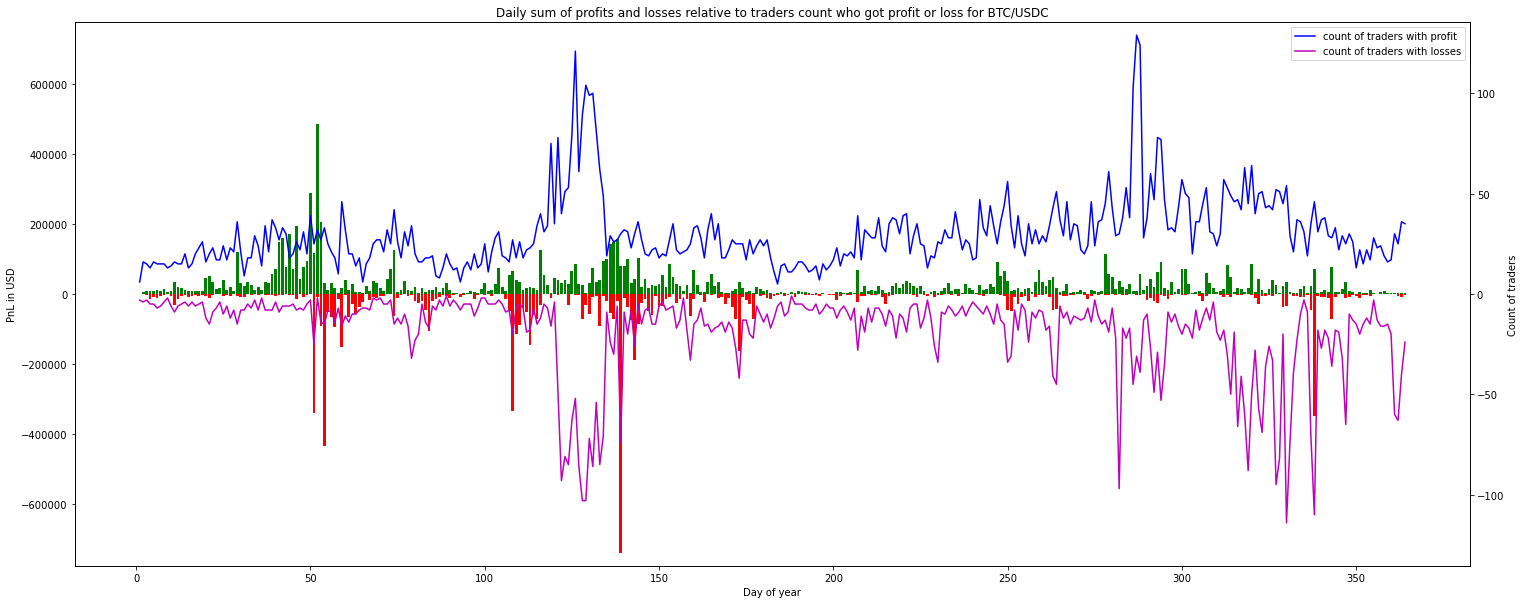

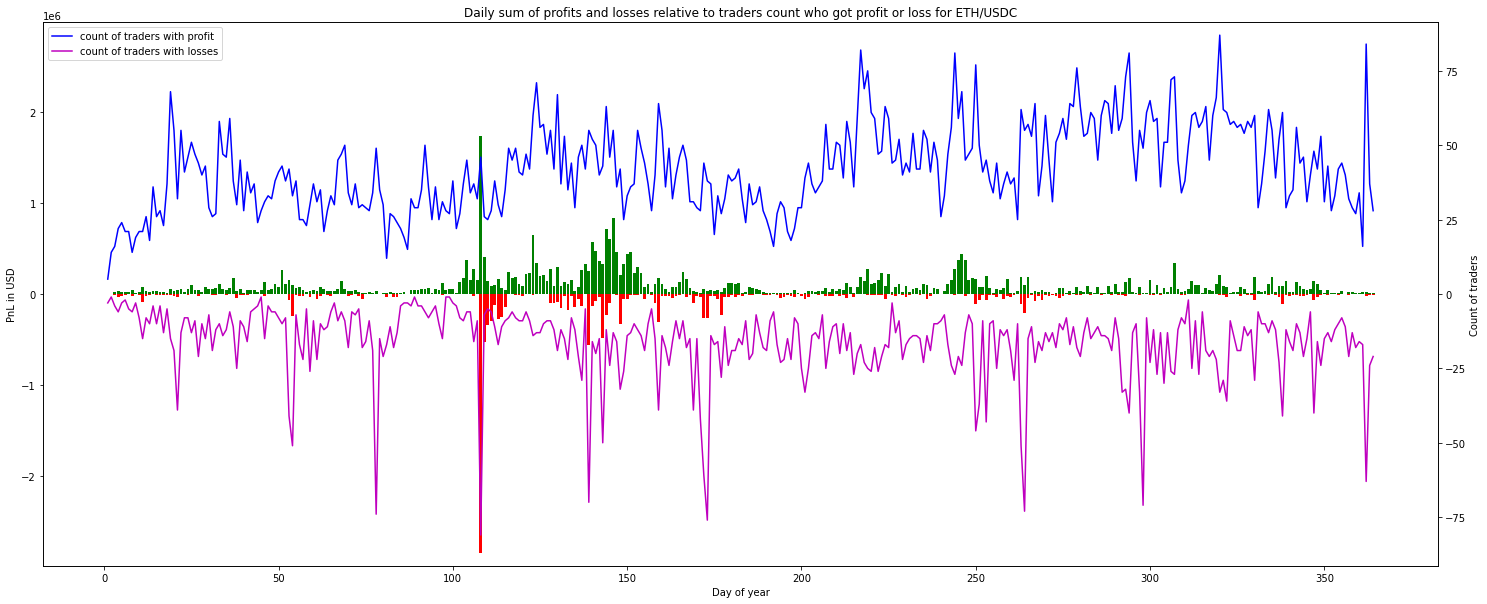

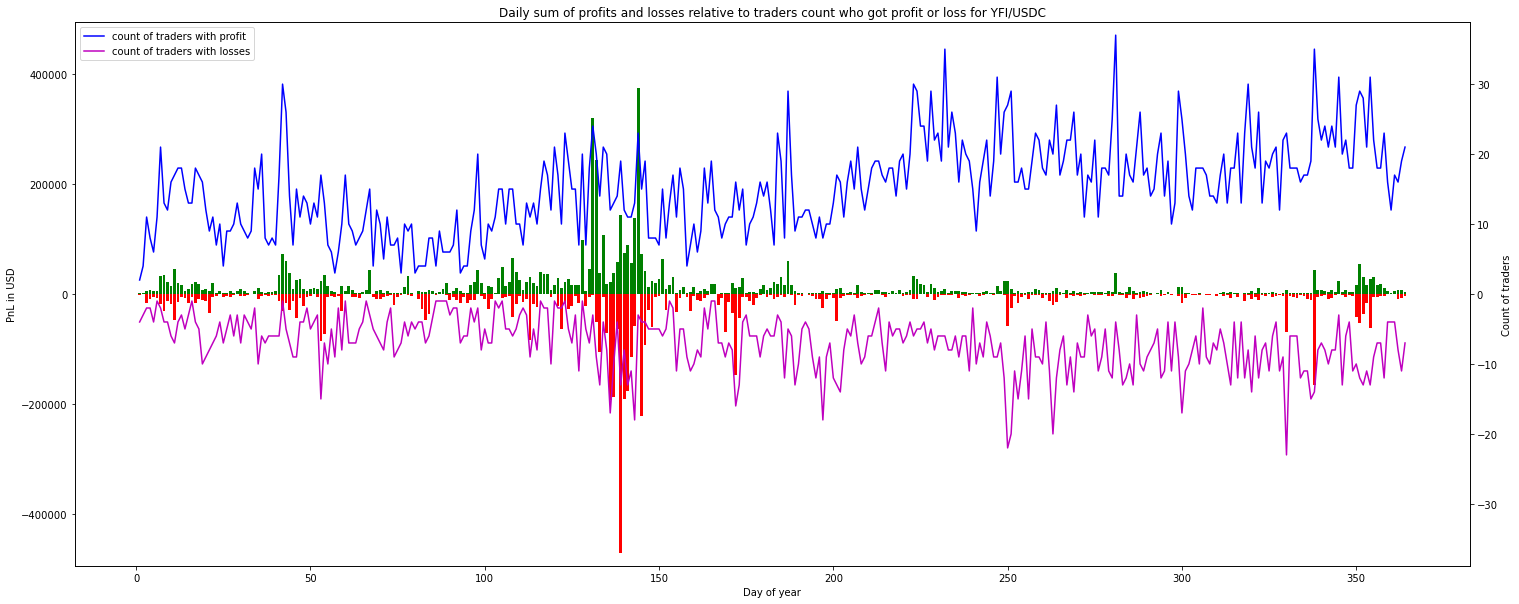

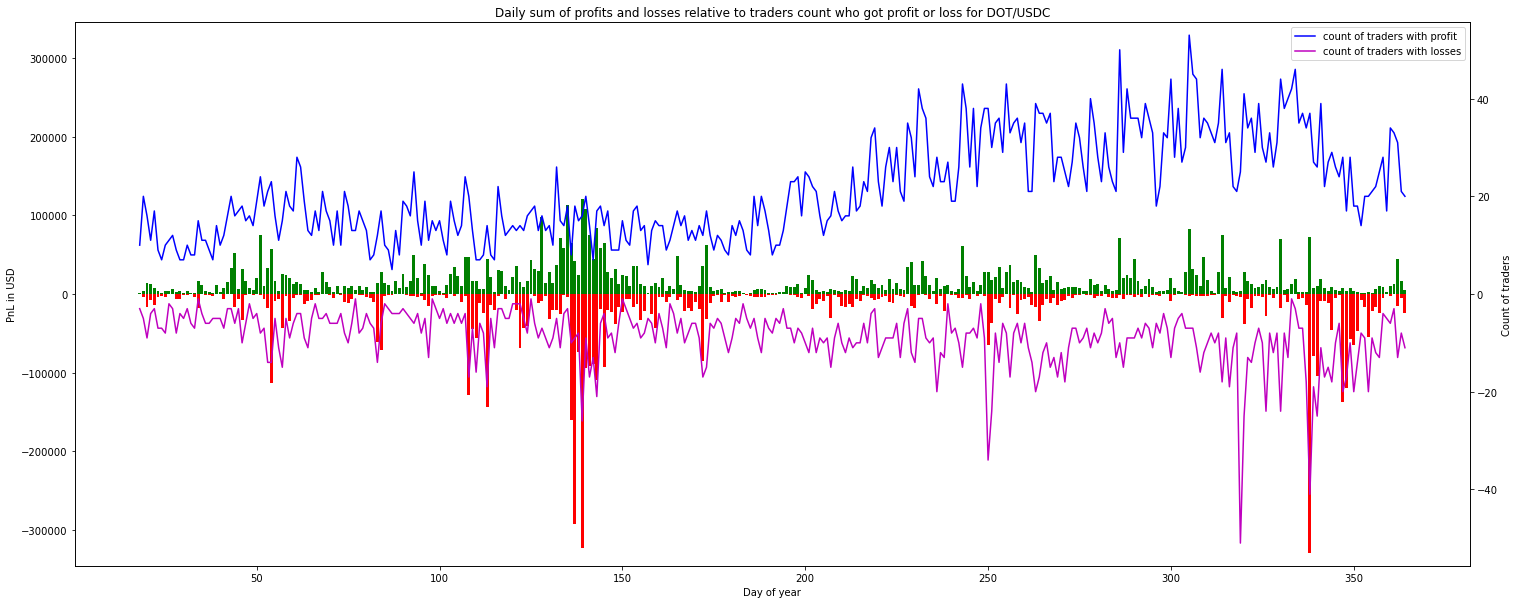

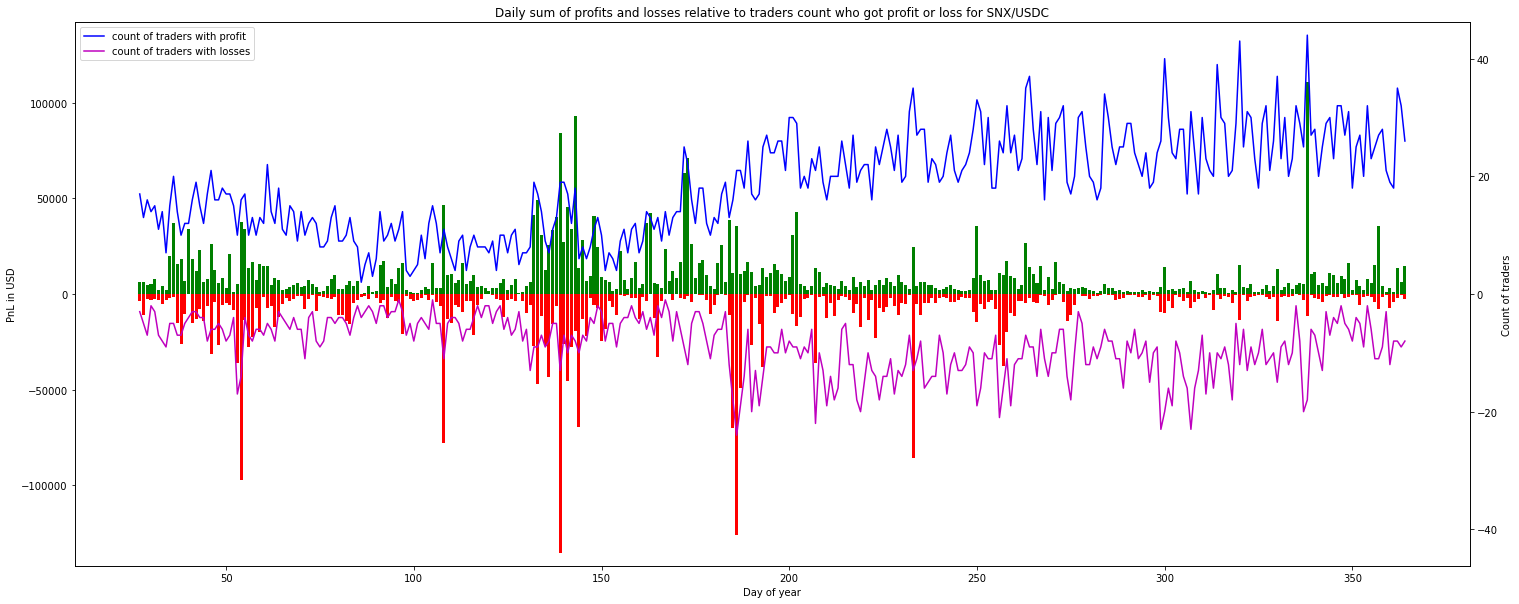

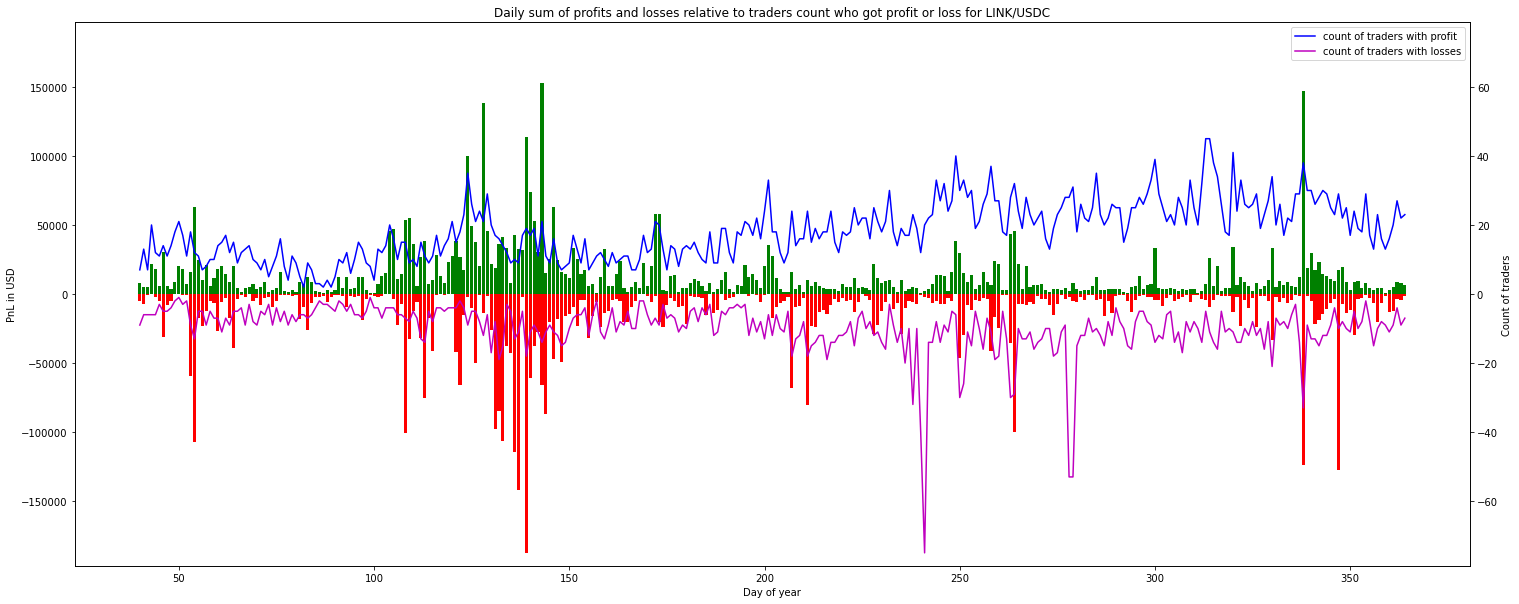

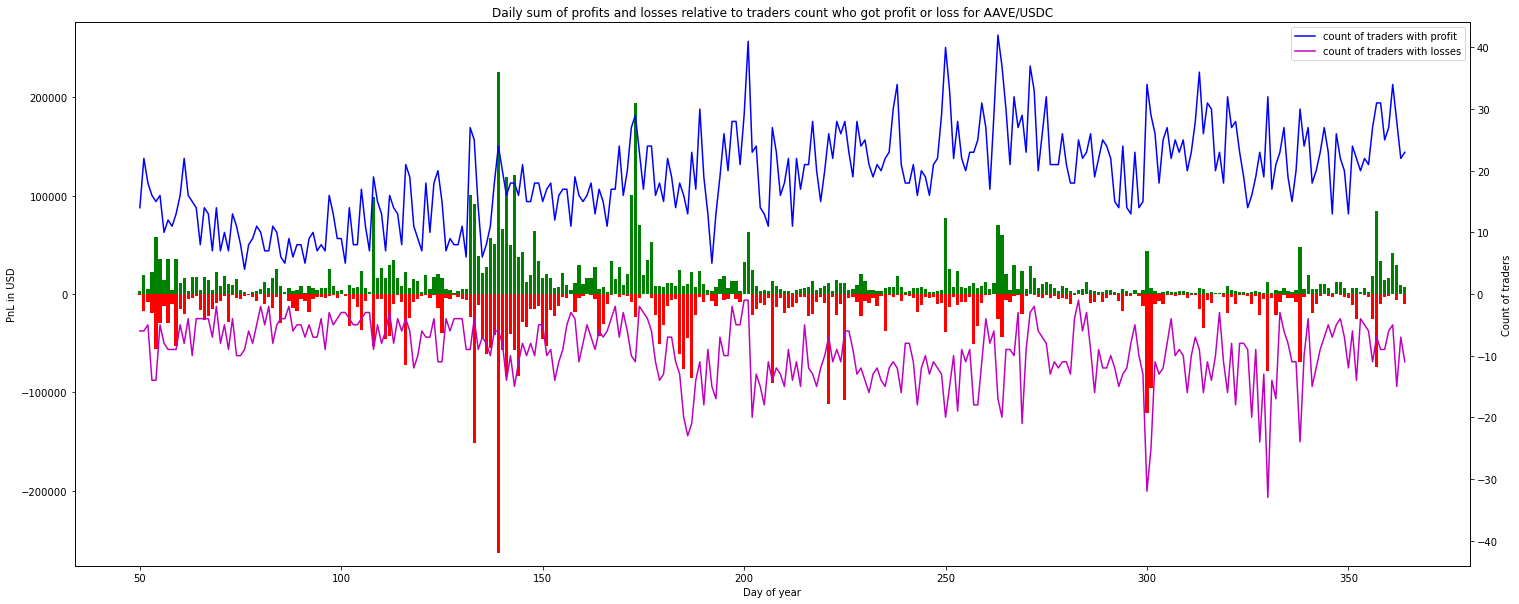

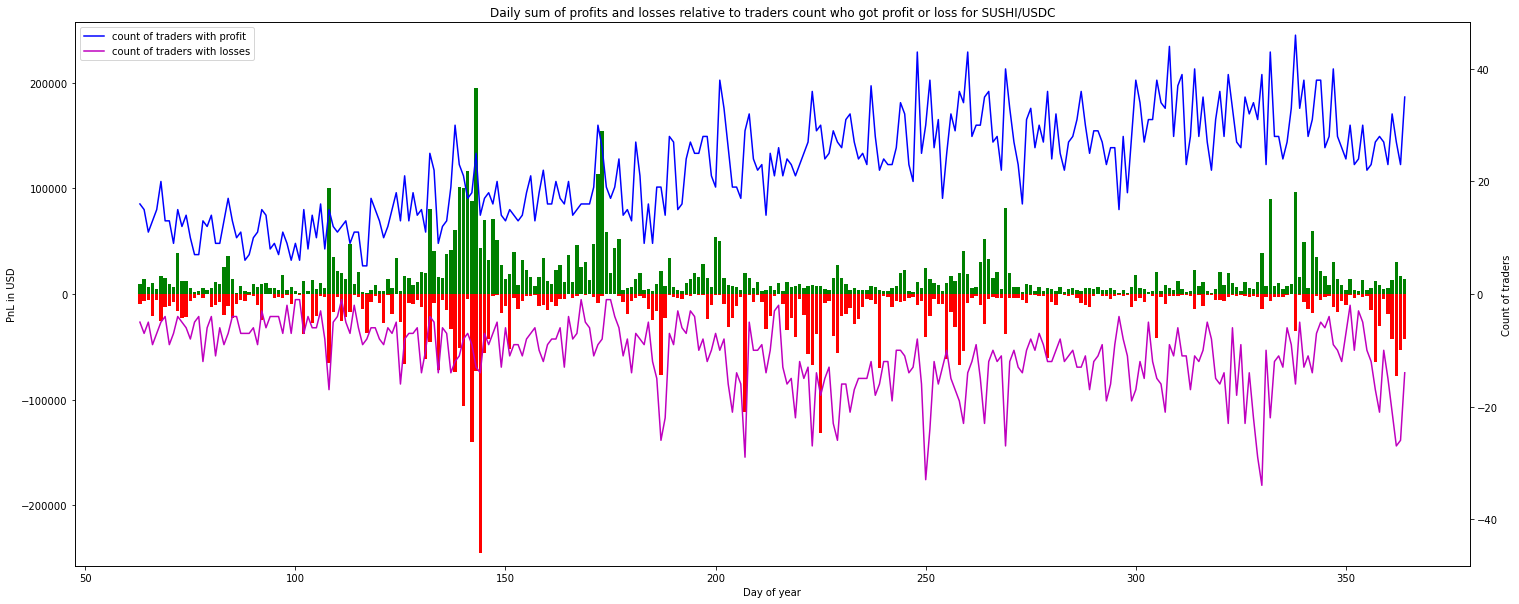

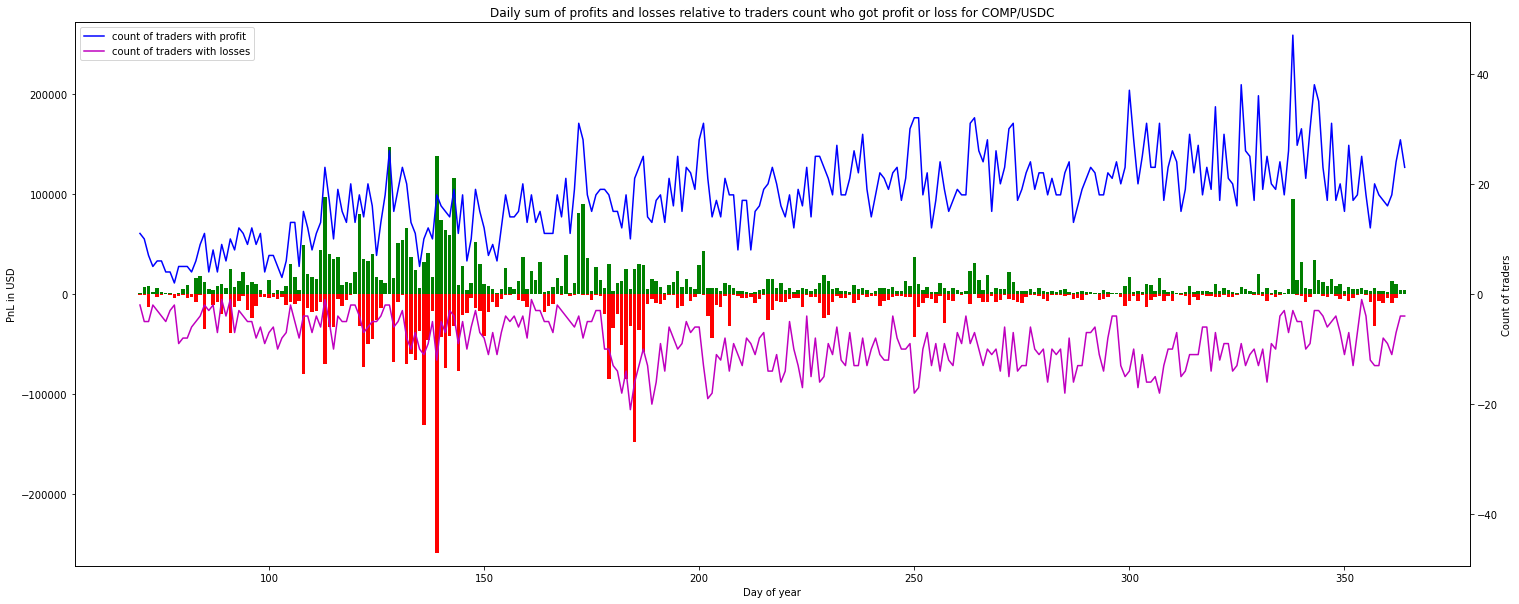

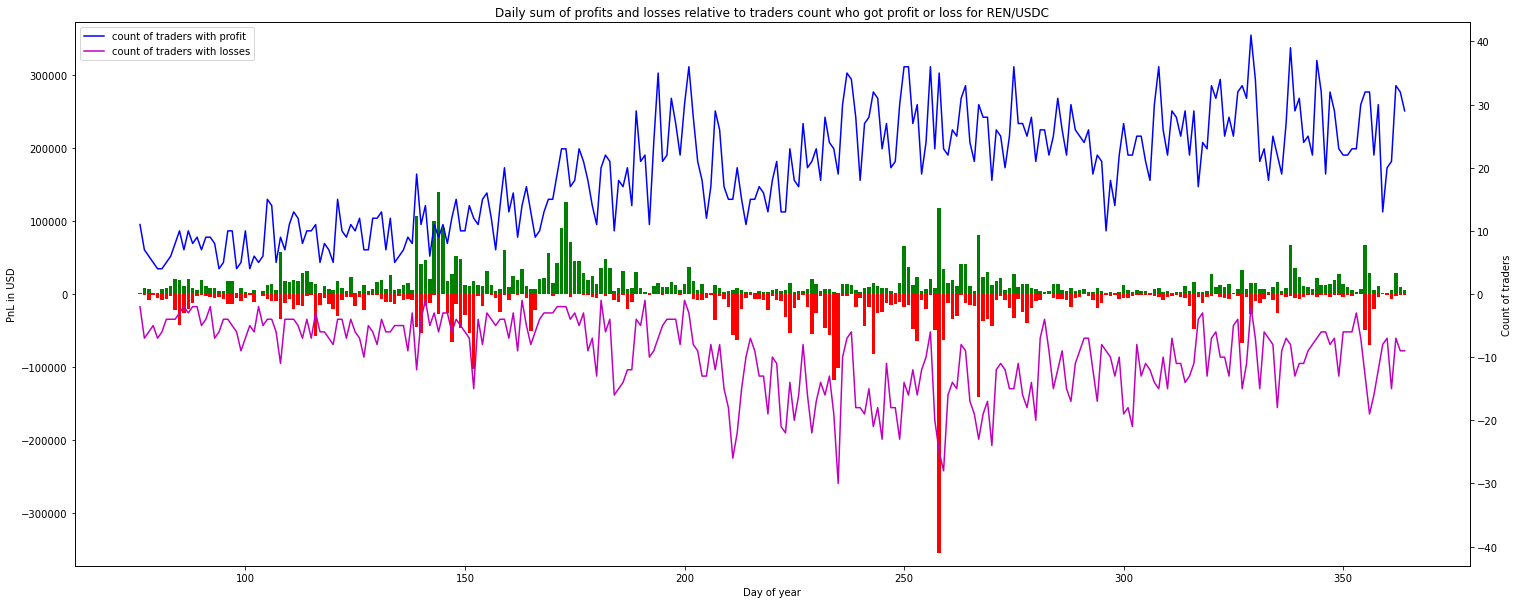

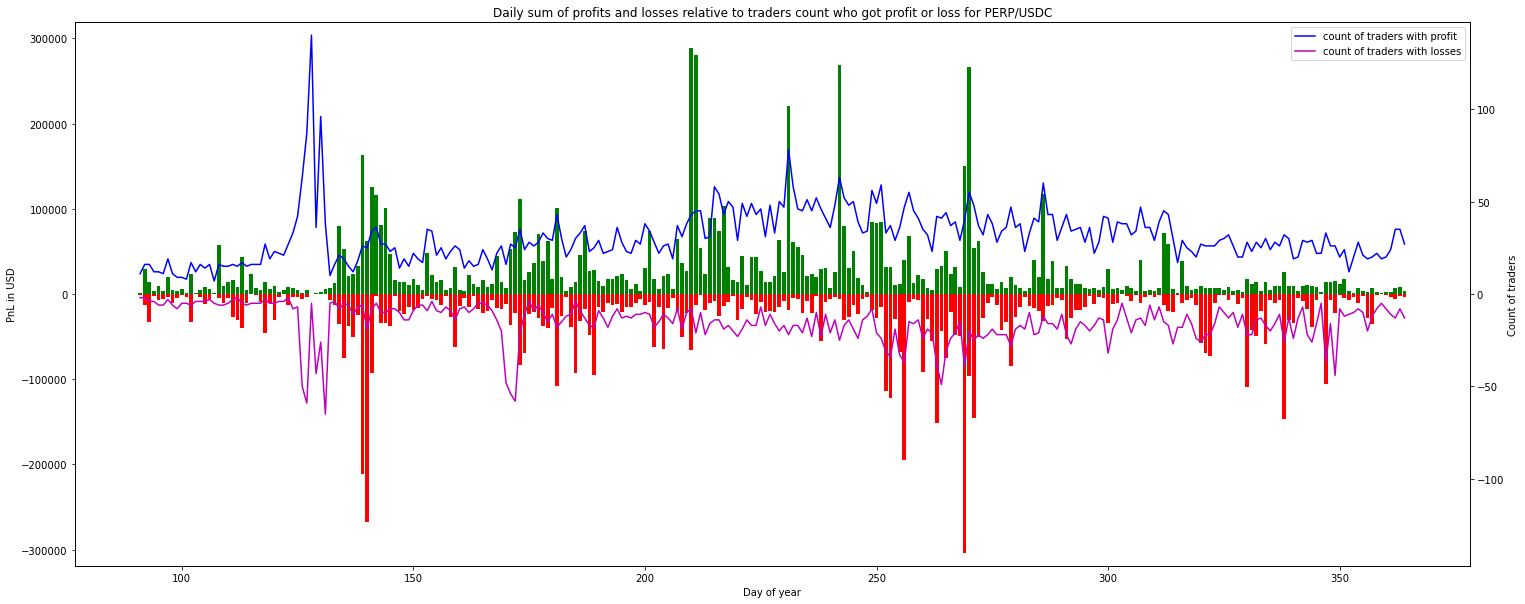

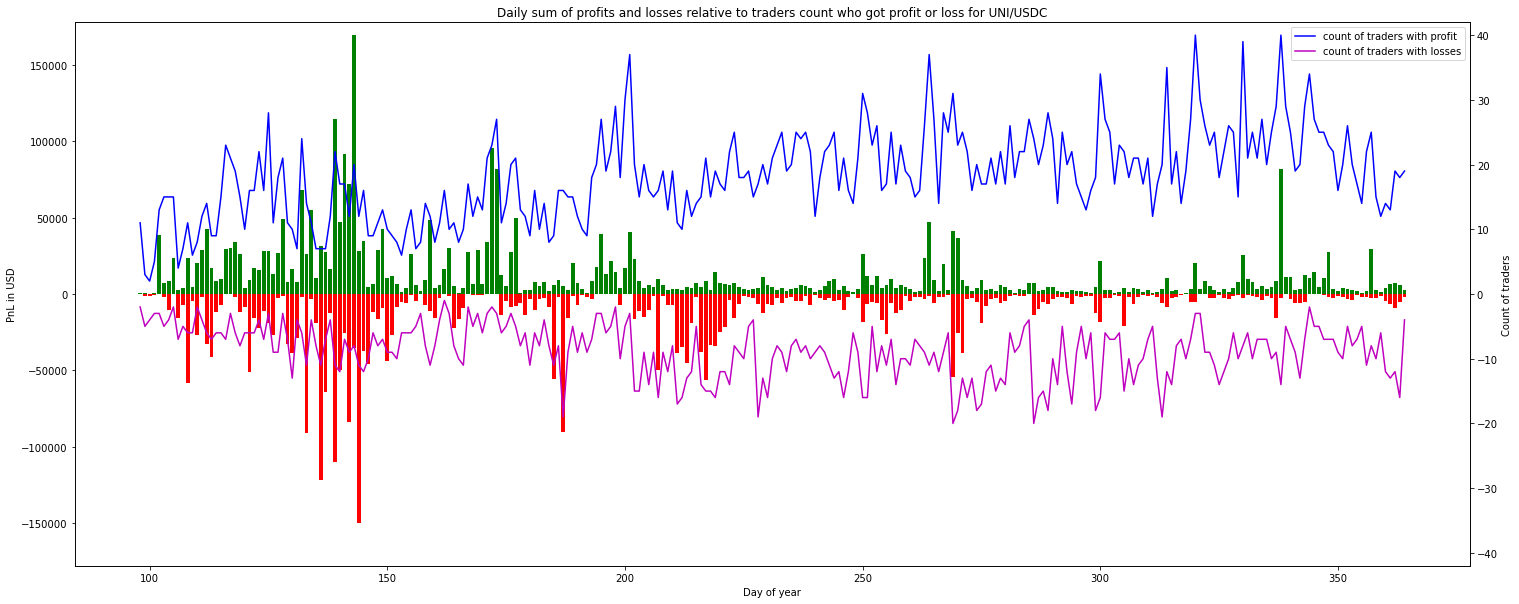

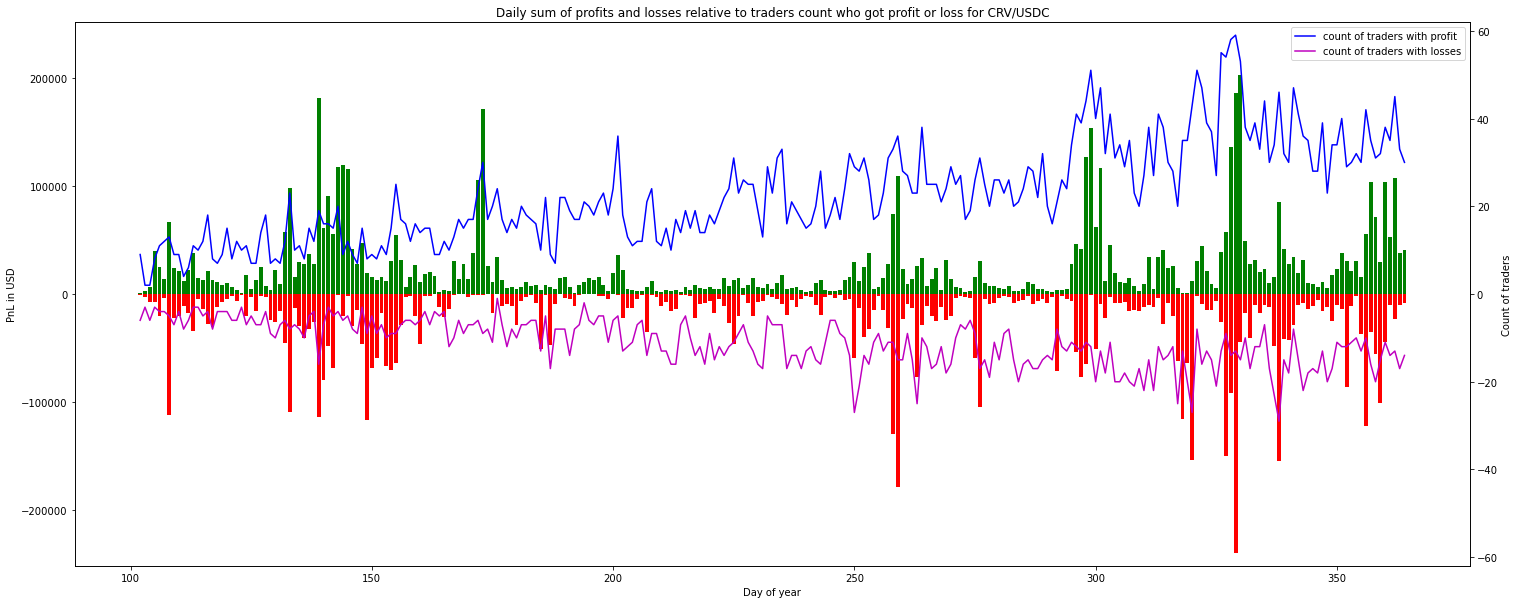

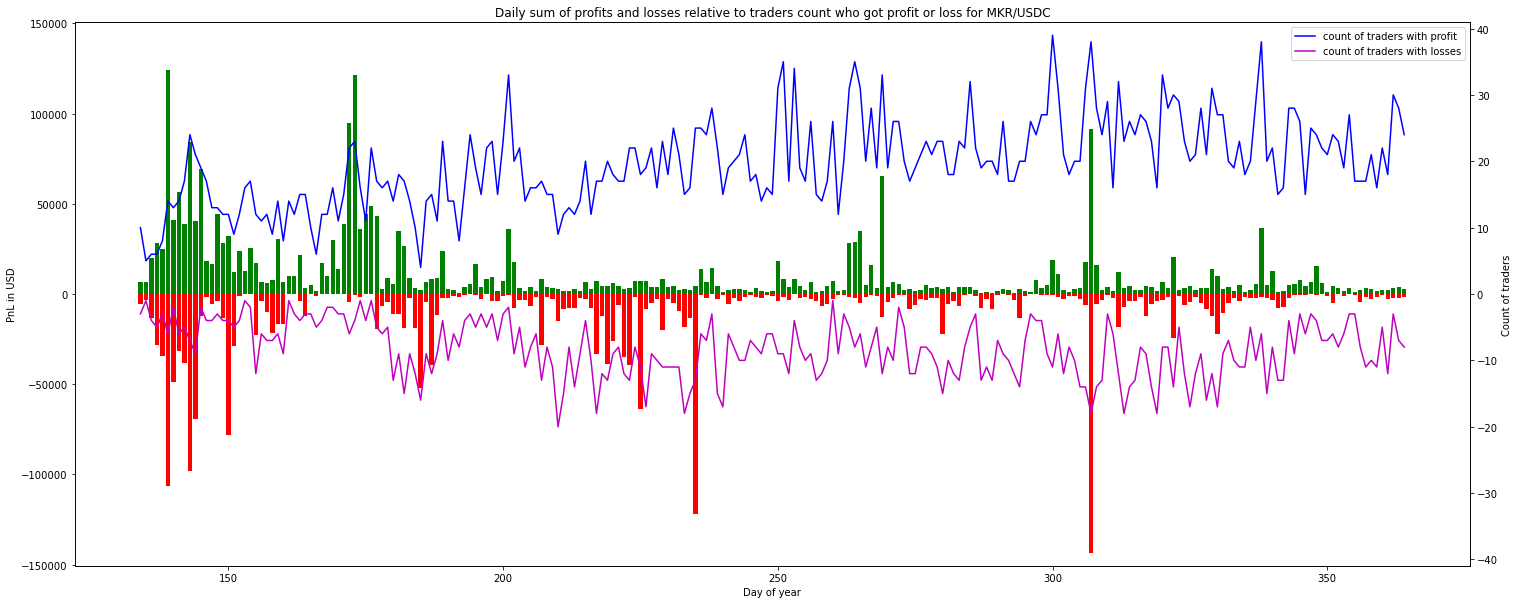

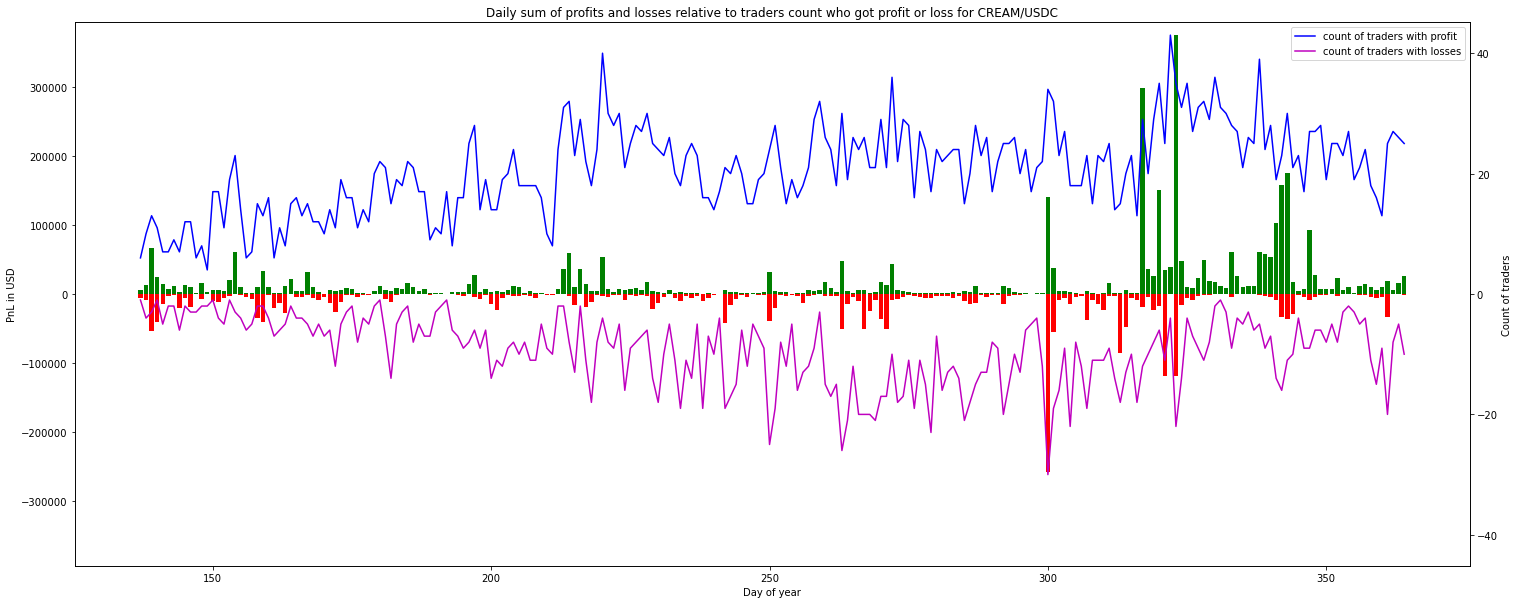

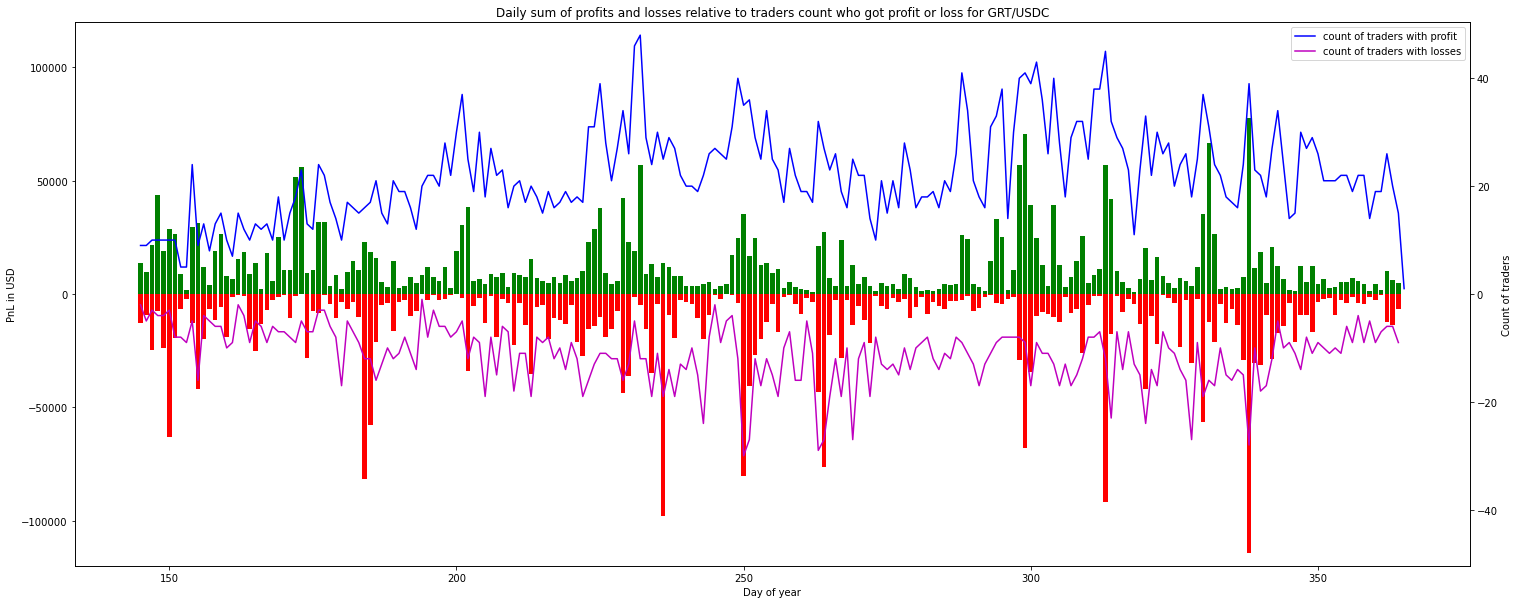

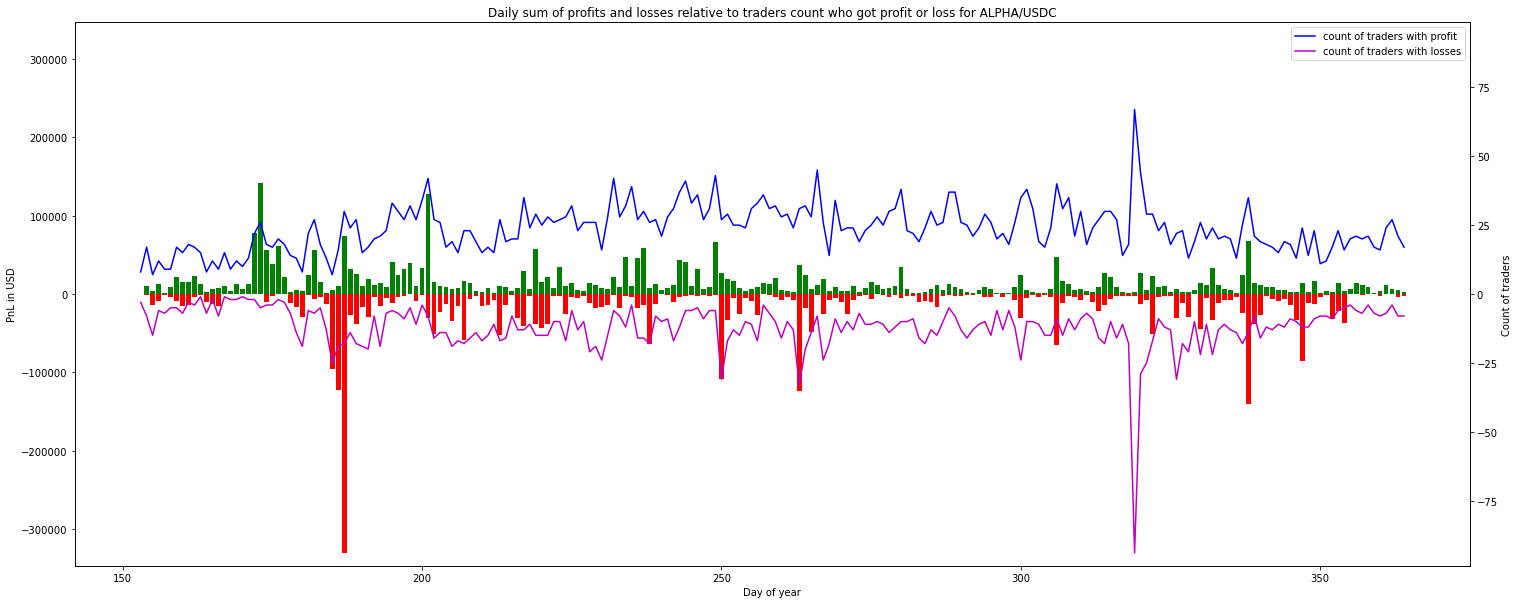

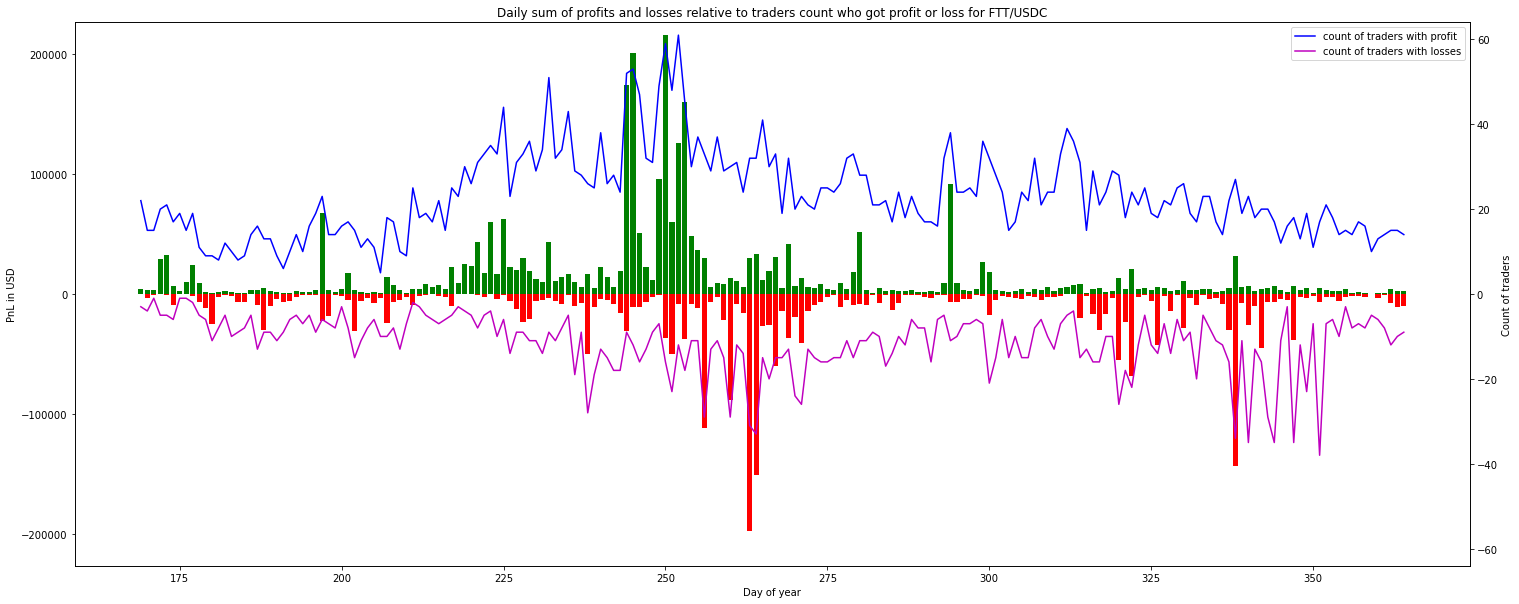

In [6]:
for amm in time_position_changes_2021_df["amm_name"].unique():
    changes_2021_for_amm_df = time_position_changes_2021_df[time_position_changes_2021_df["amm_name"] == amm]
    changes_per_day_and_trader_df = changes_2021_for_amm_df.groupby(["day_of_year", "trader"]).sum()
    
    positive_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["realized_pnl"] >= 0]
    negative_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["realized_pnl"] < 0]
    
    positive_changes_daily_count = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_count = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_sum = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_sum = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['realized_pnl'], color='g')
    ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['realized_pnl'], color='r')
    
    ax2 = ax.twinx()
    ax2.plot(positive_changes_daily_count.day_of_year, positive_changes_daily_count["counts"], color='b', 
             label='count of traders with profit')
    ax2.plot(negative_changes_daily_count.day_of_year, -negative_changes_daily_count["counts"], color='m', 
             label='count of traders with losses')
    
    max_pnl = abs(positive_changes_daily_sum["realized_pnl"].max())
    min_pnl = abs(negative_changes_daily_sum["realized_pnl"].min())
    max_profiters = positive_changes_daily_count["counts"].max()
    max_lossers = negative_changes_daily_count["counts"].max()
    
    pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl
    count_limit = max_profiters if max_profiters > max_lossers else max_lossers
    
    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
    ax2.set_ylabel("Count of traders")
    ax2.set_ylim(-count_limit * 1.05, count_limit * 1.05)
    ax.set_title("Daily sum of profits and losses relative to traders count who got profit or loss for " + amm)
    ax2.legend()
    plt.xticks(rotation=45)
    plt.show()

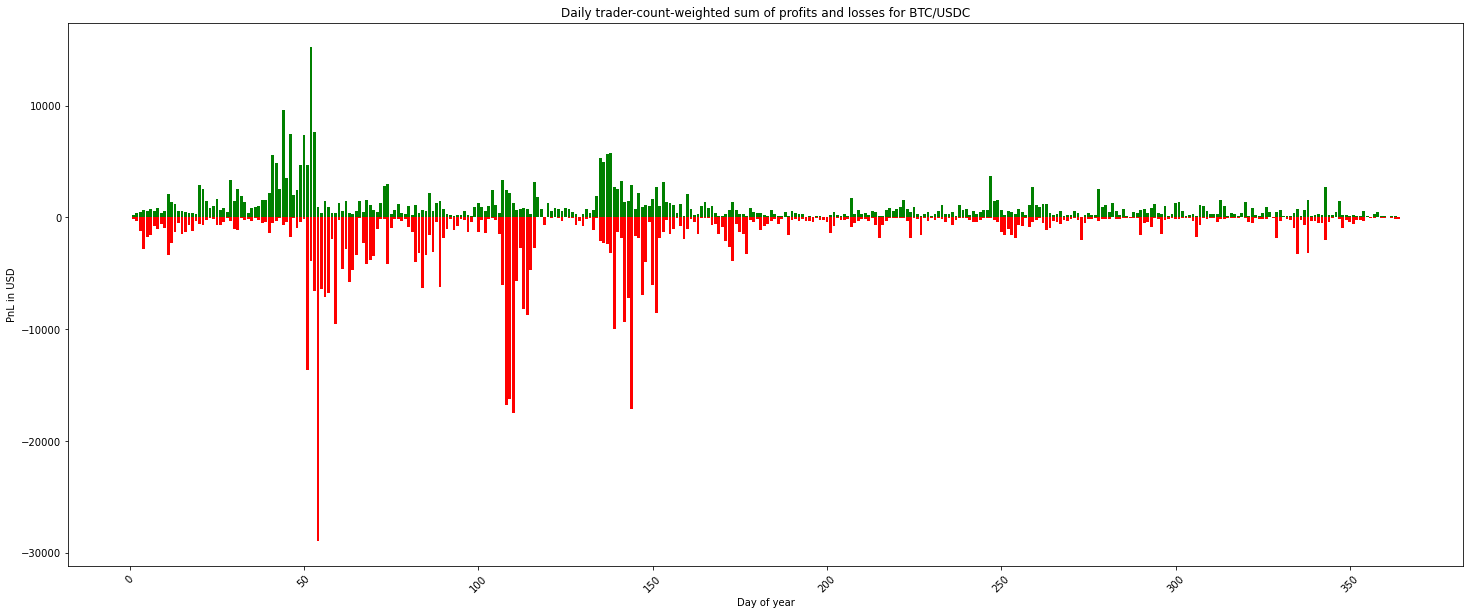

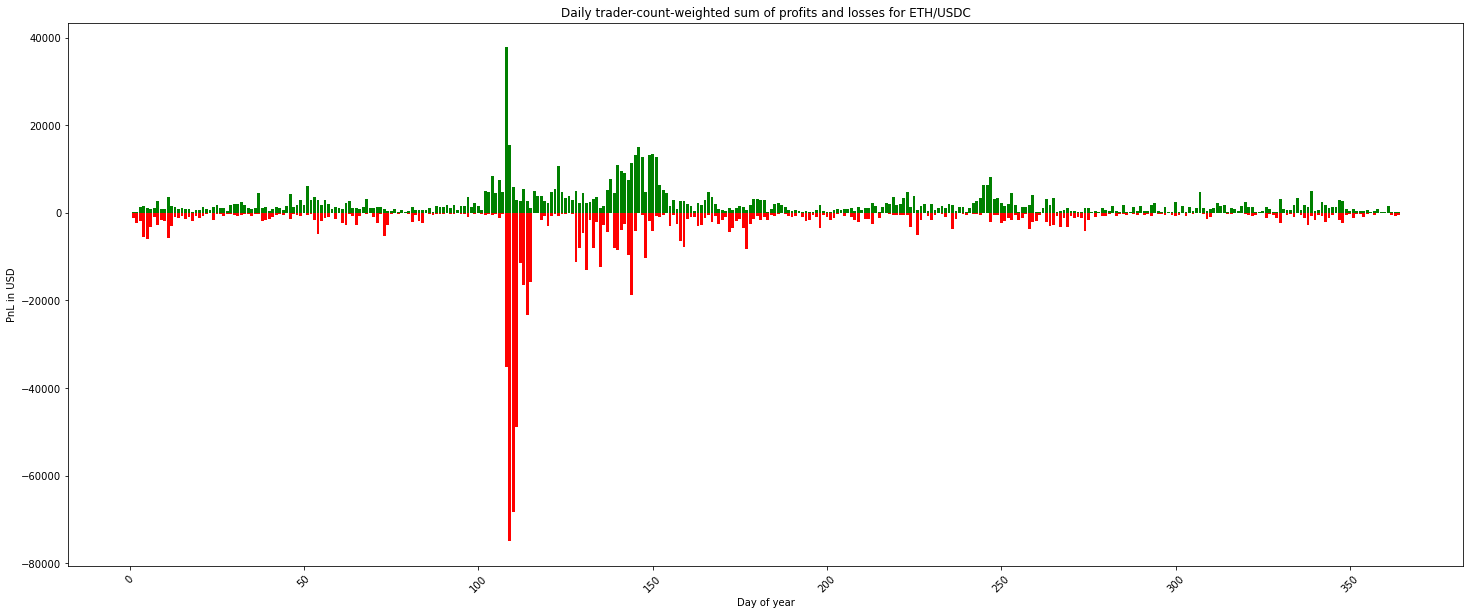

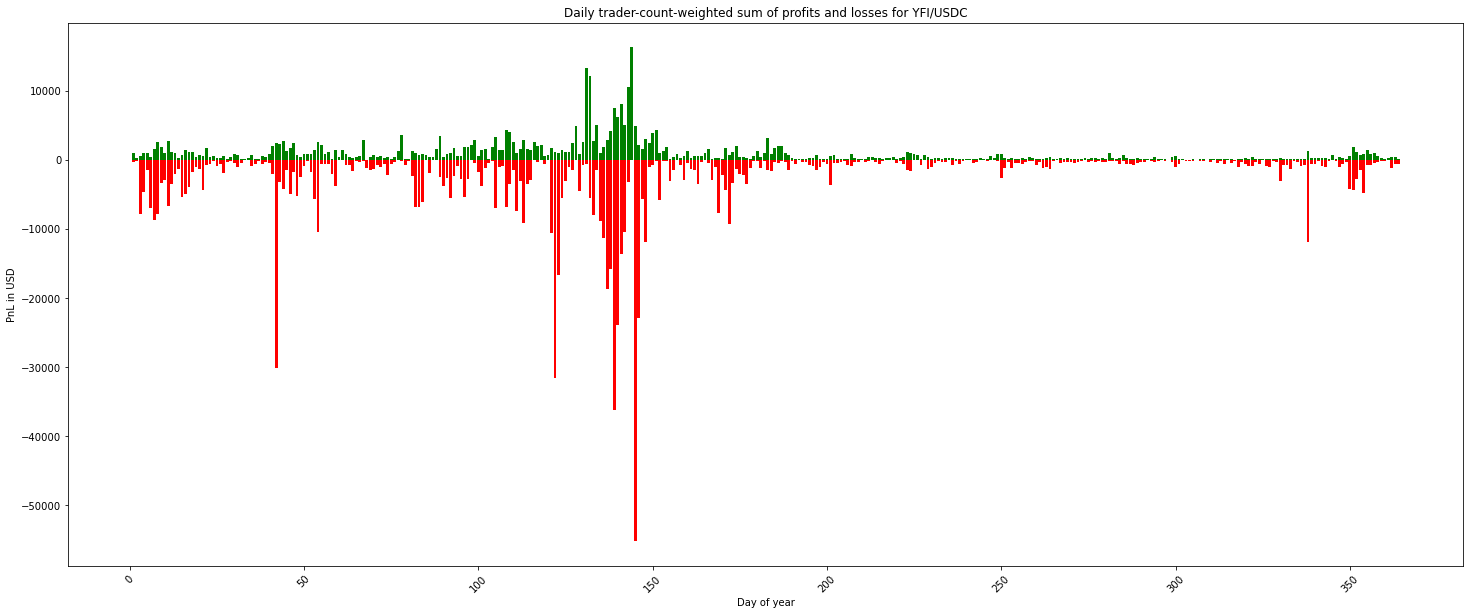

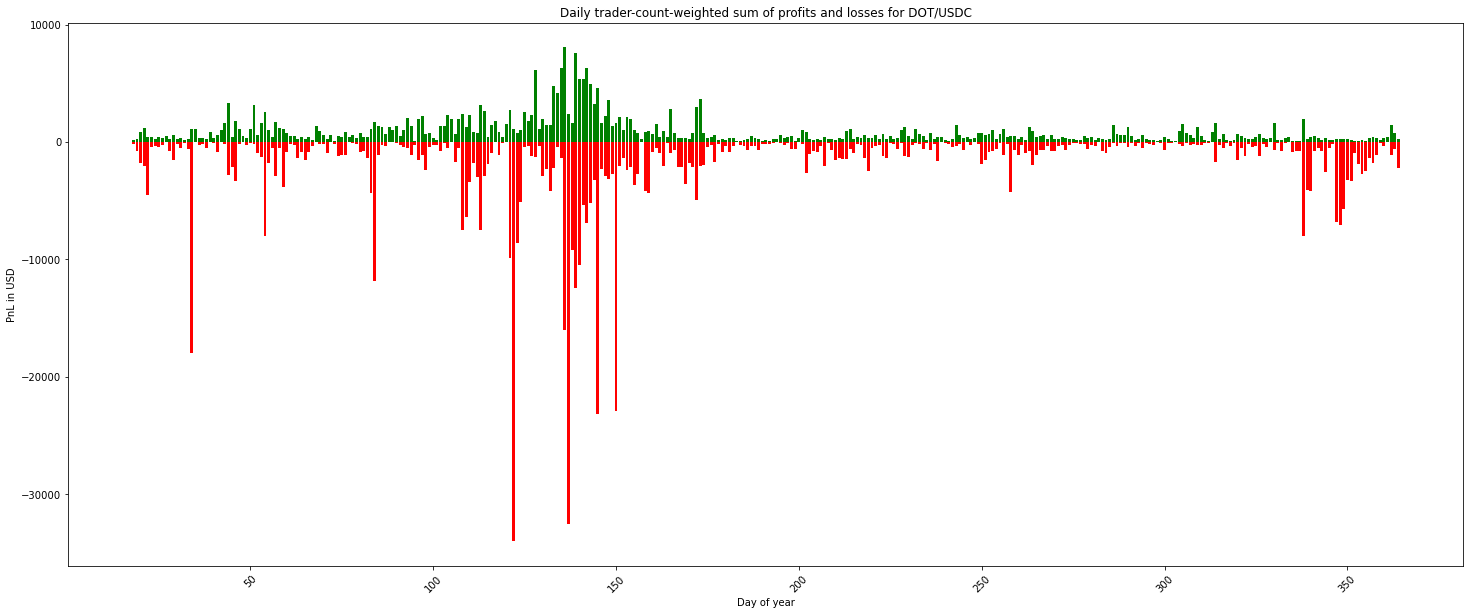

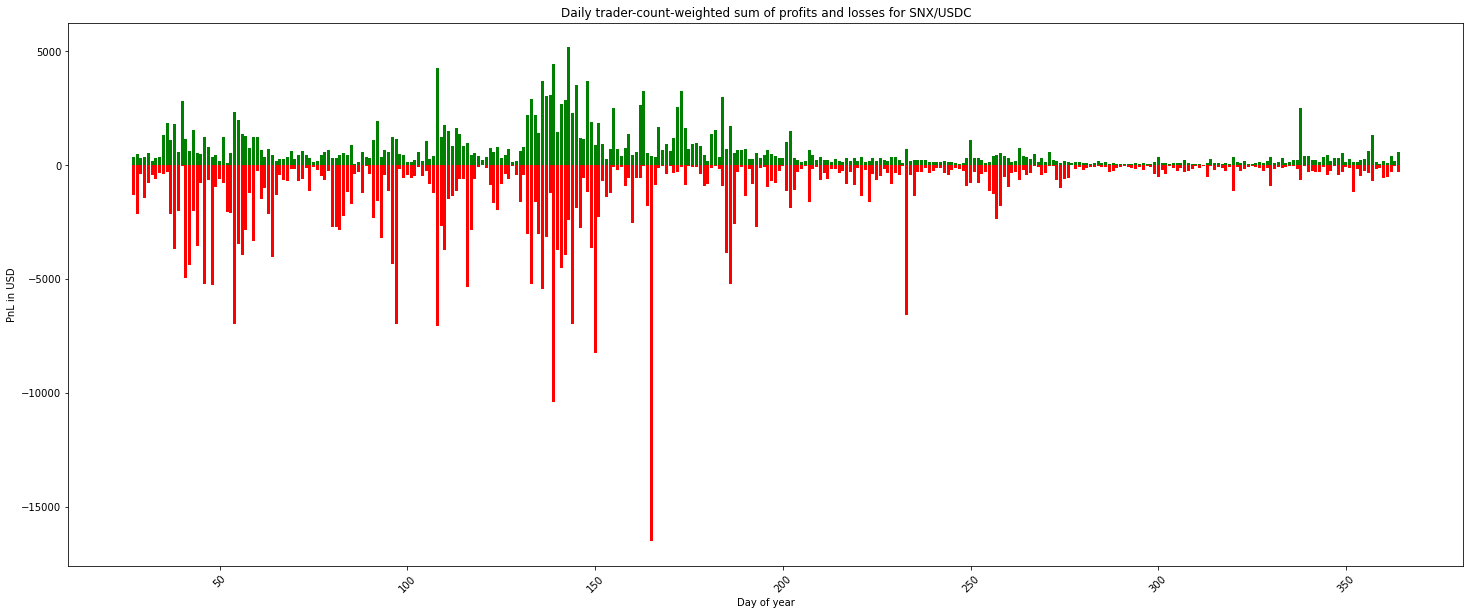

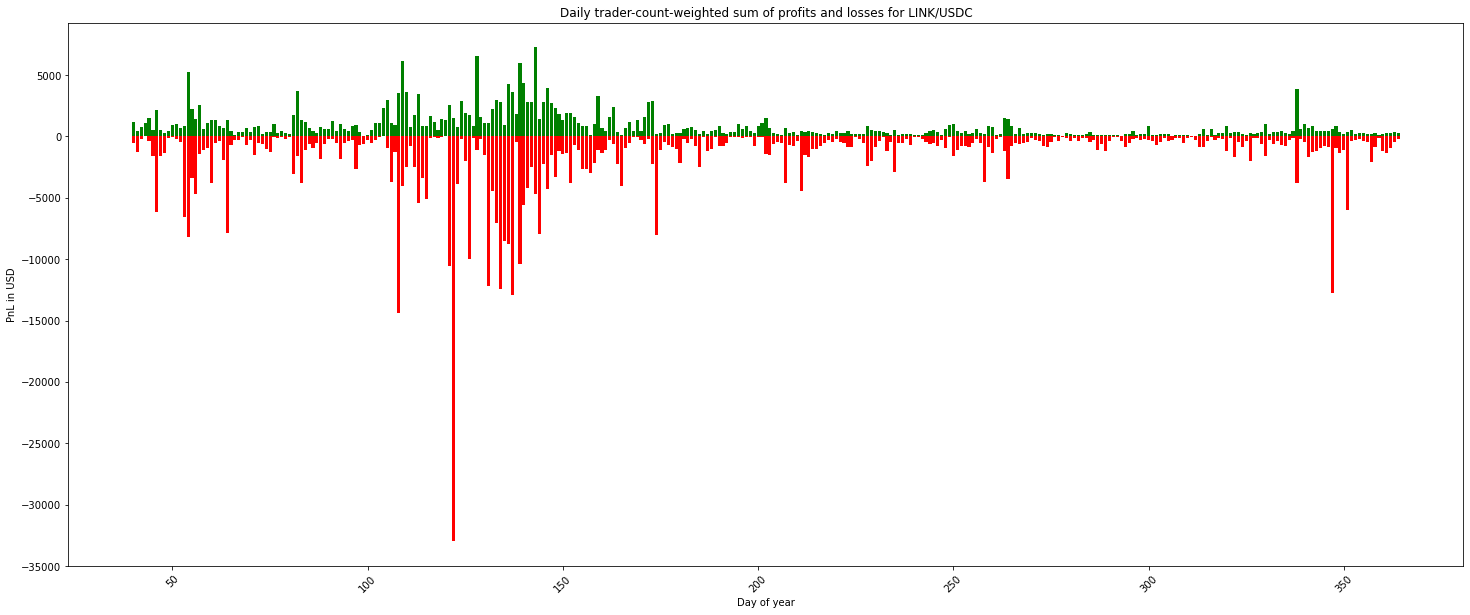

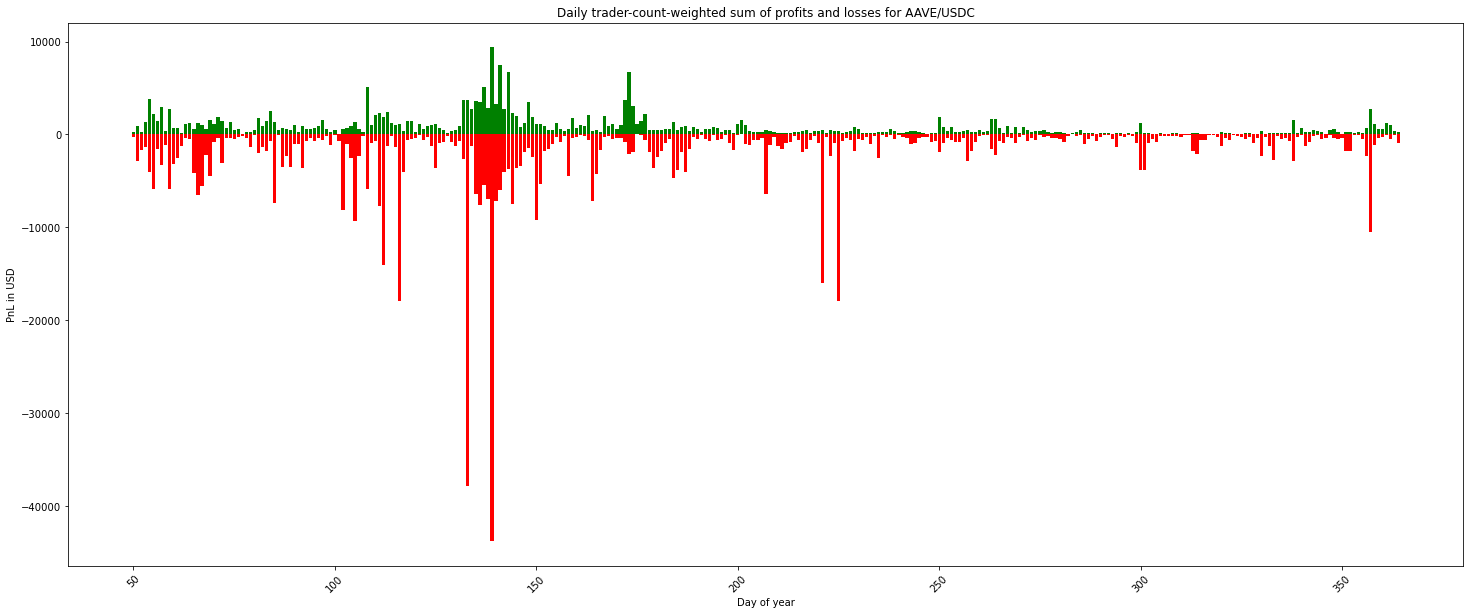

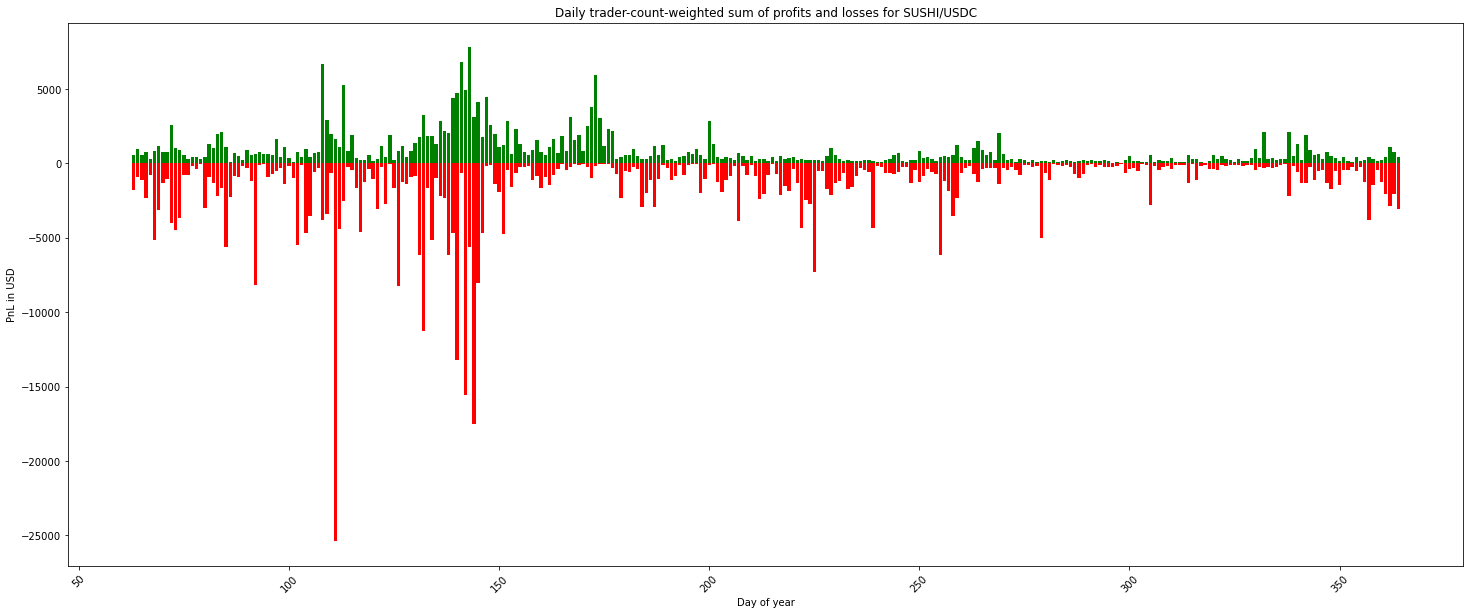

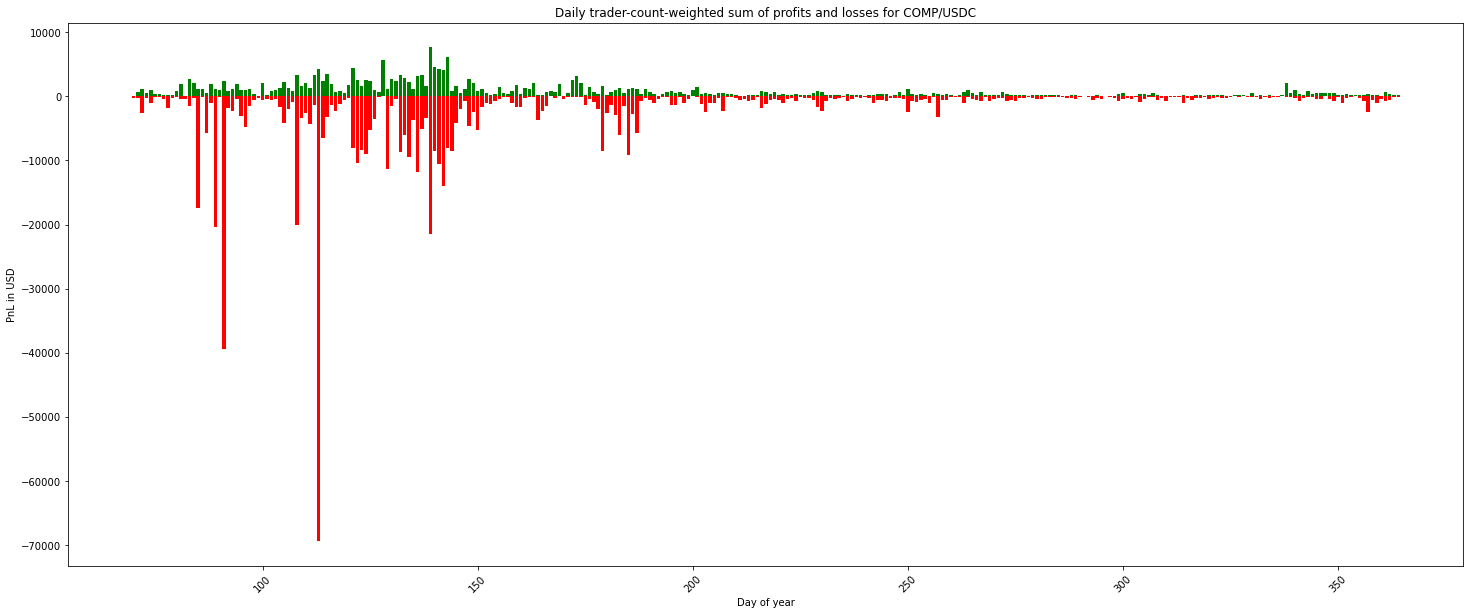

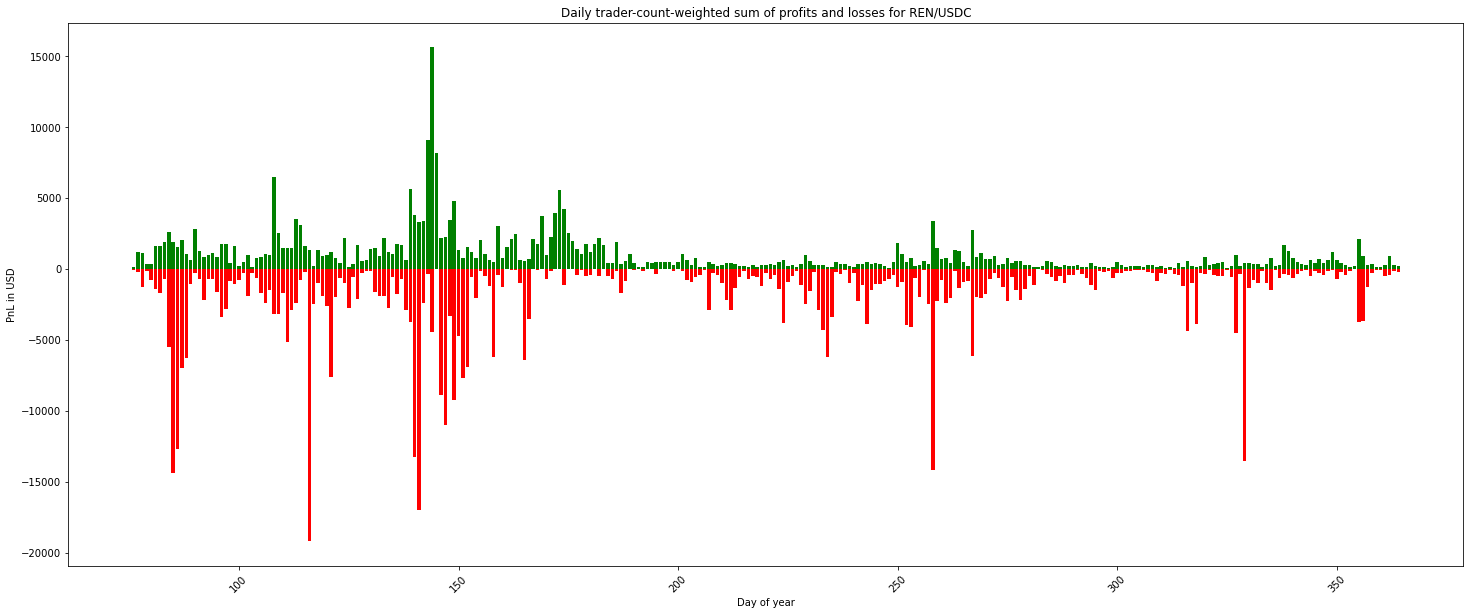

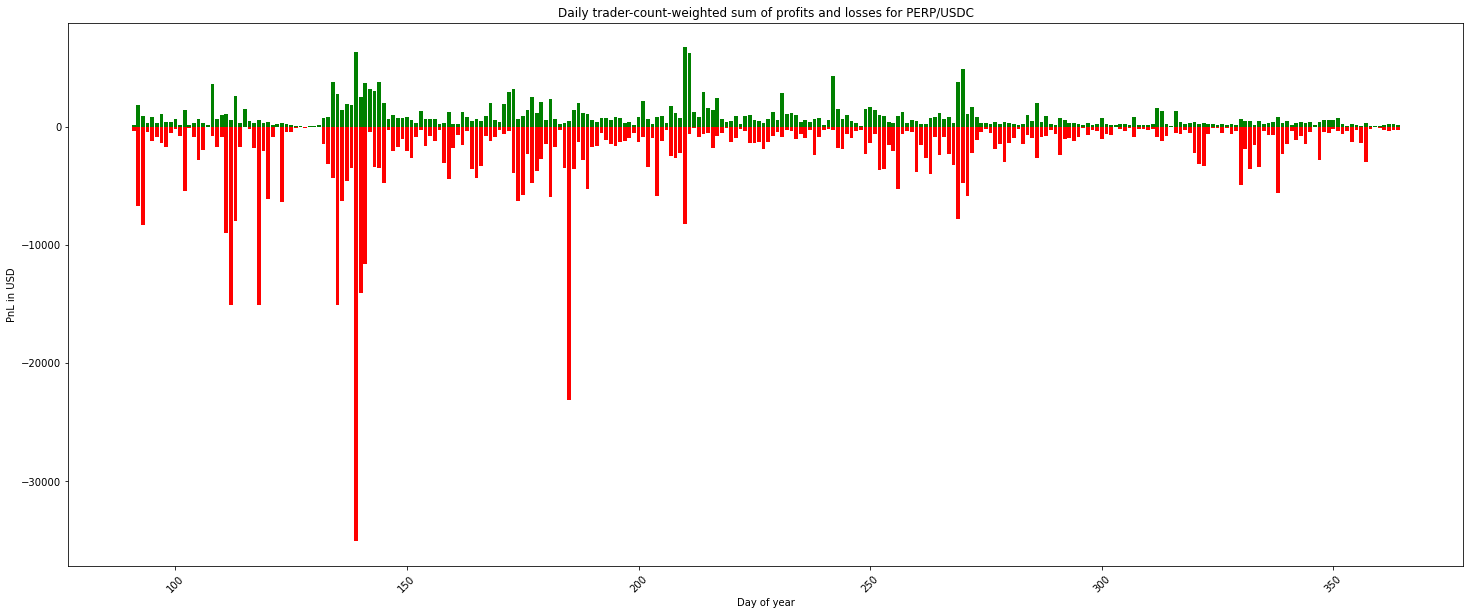

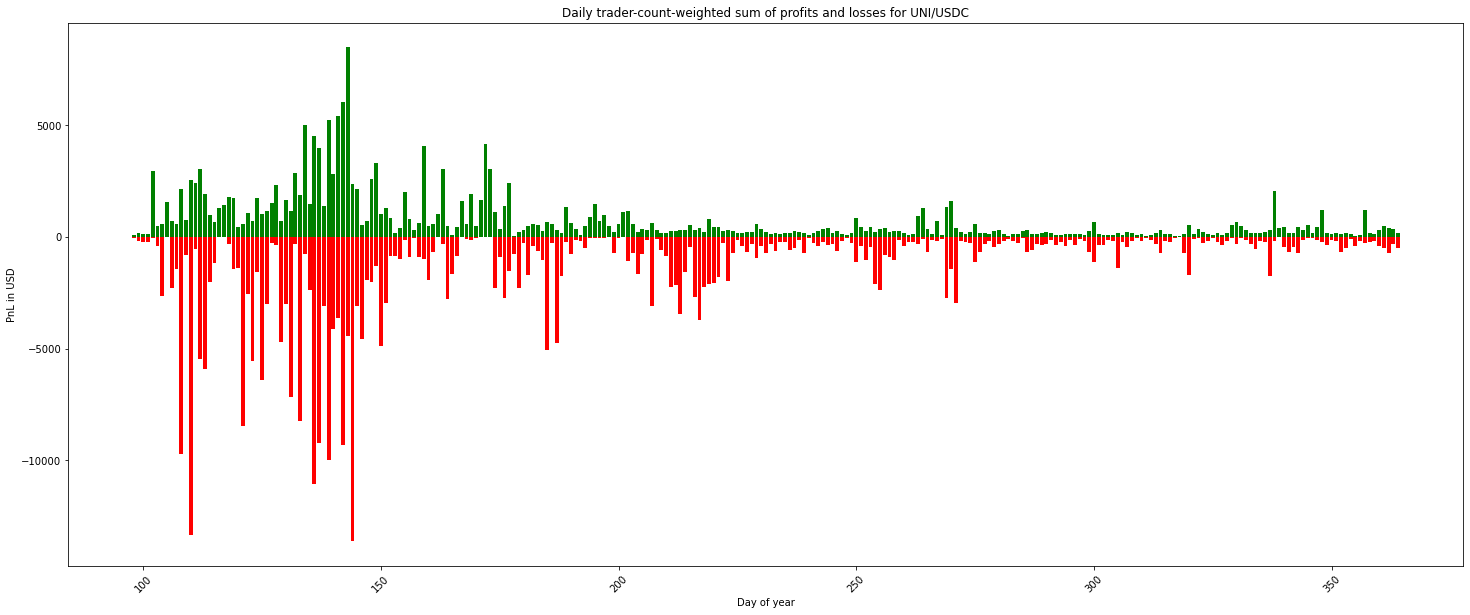

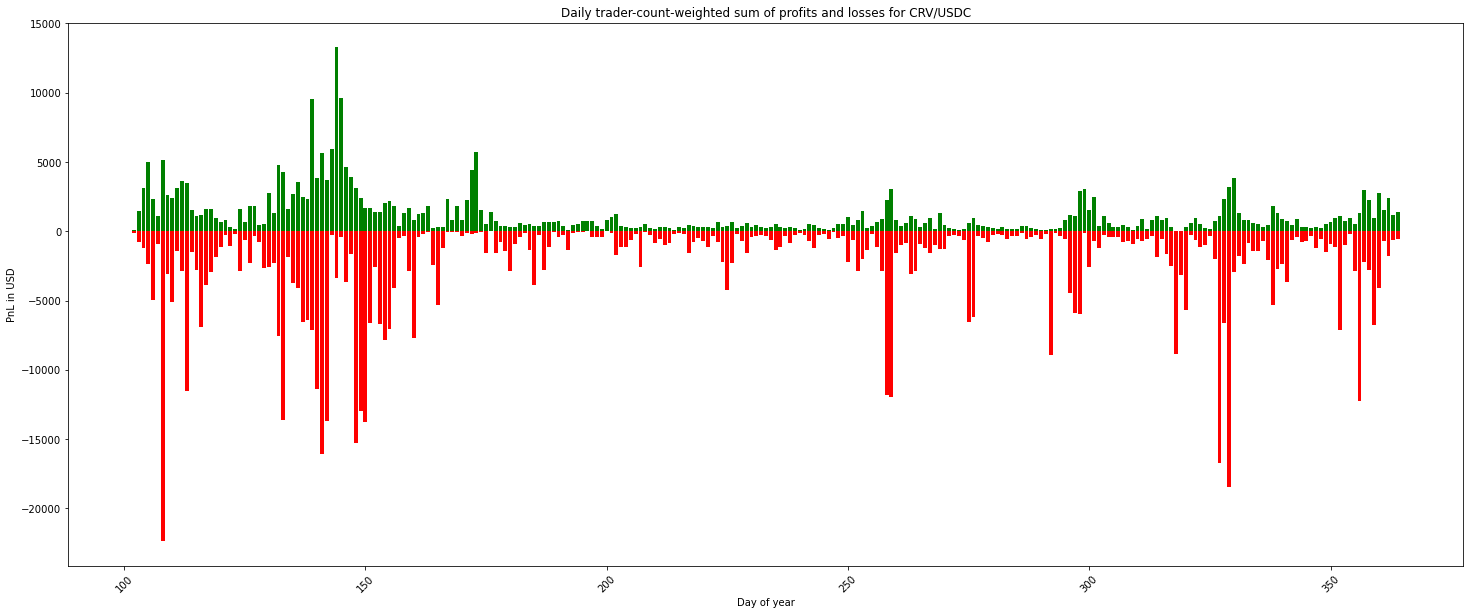

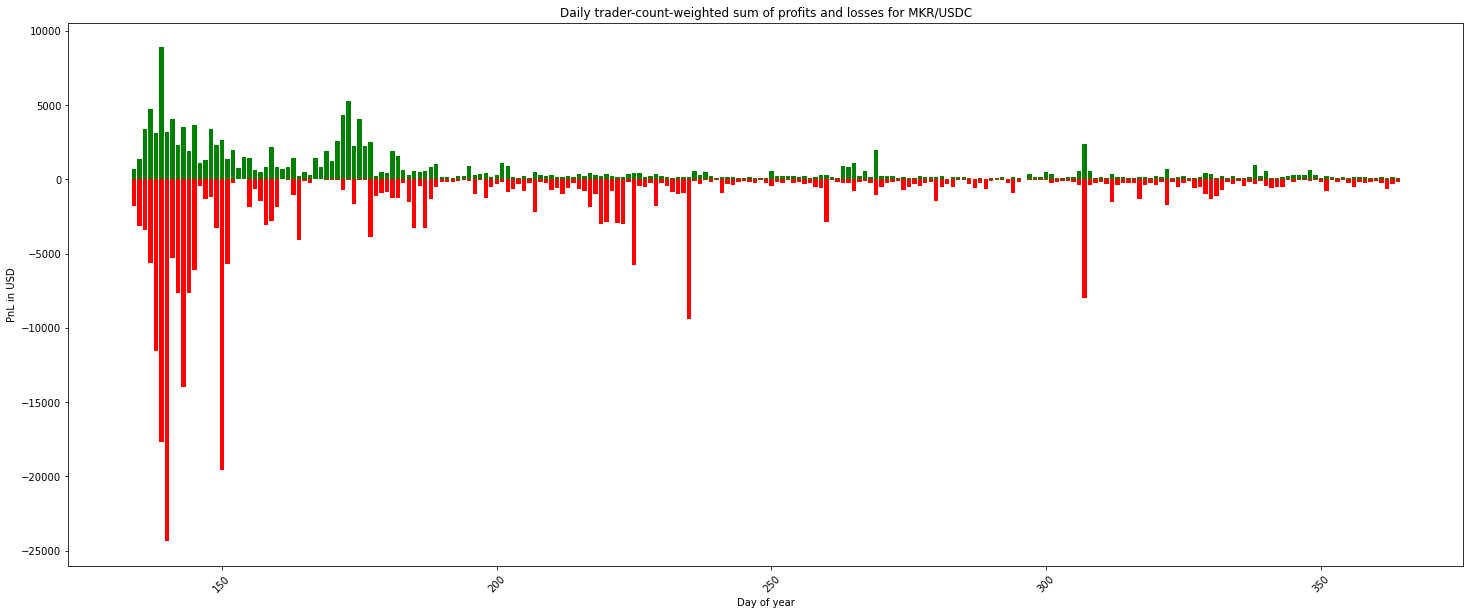

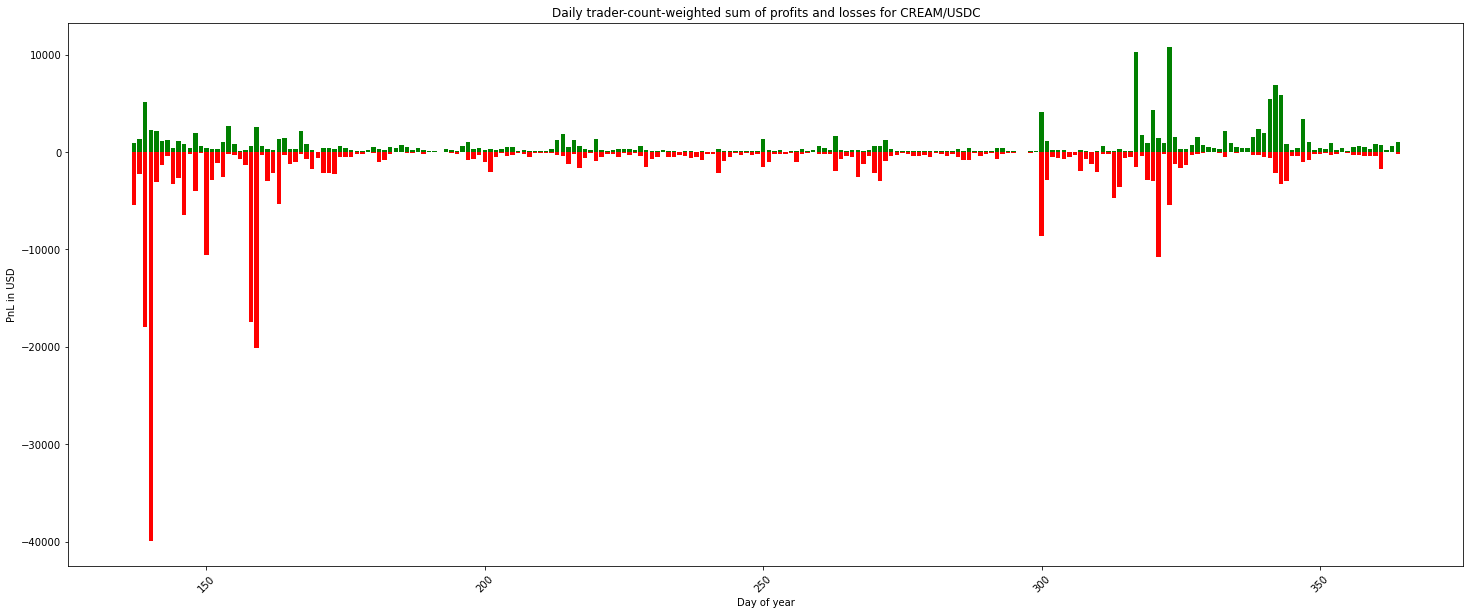

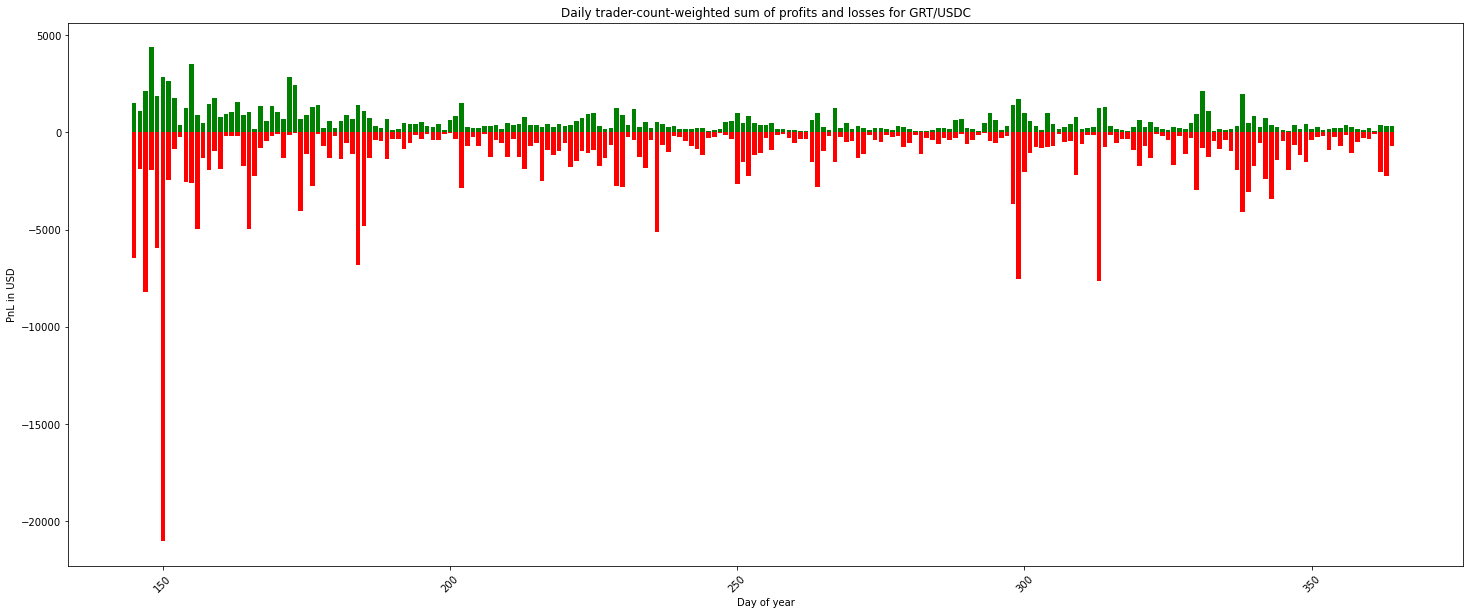

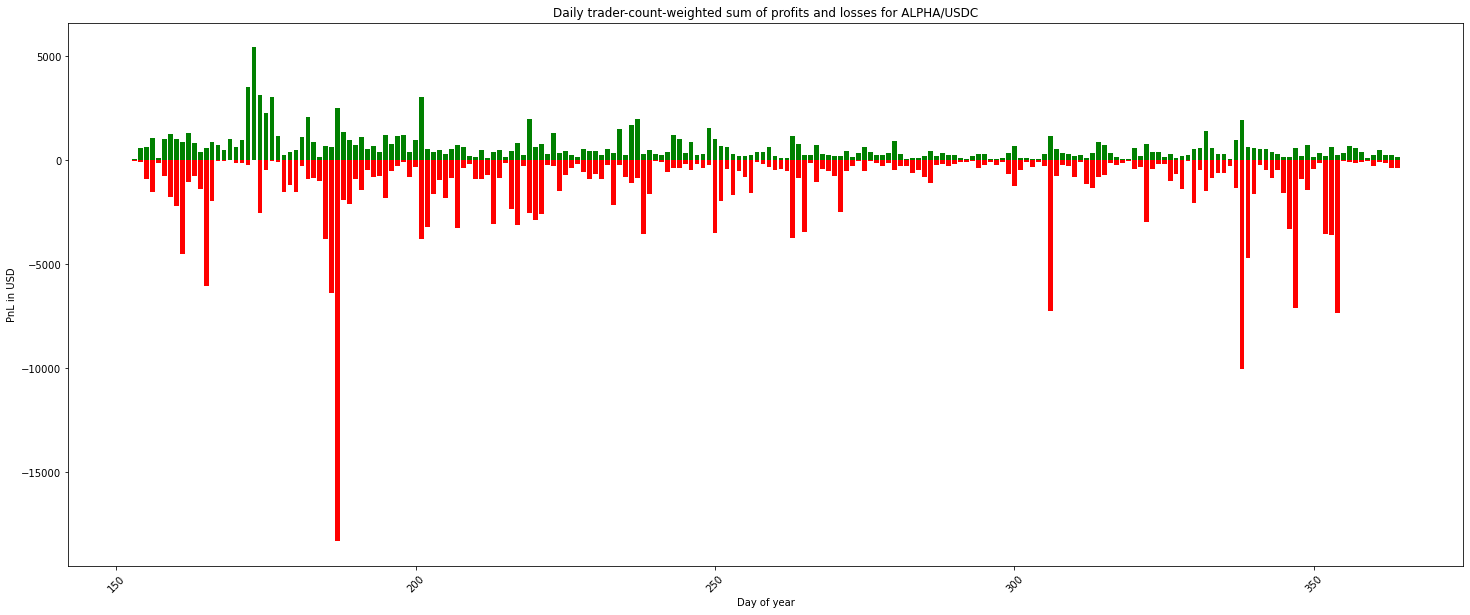

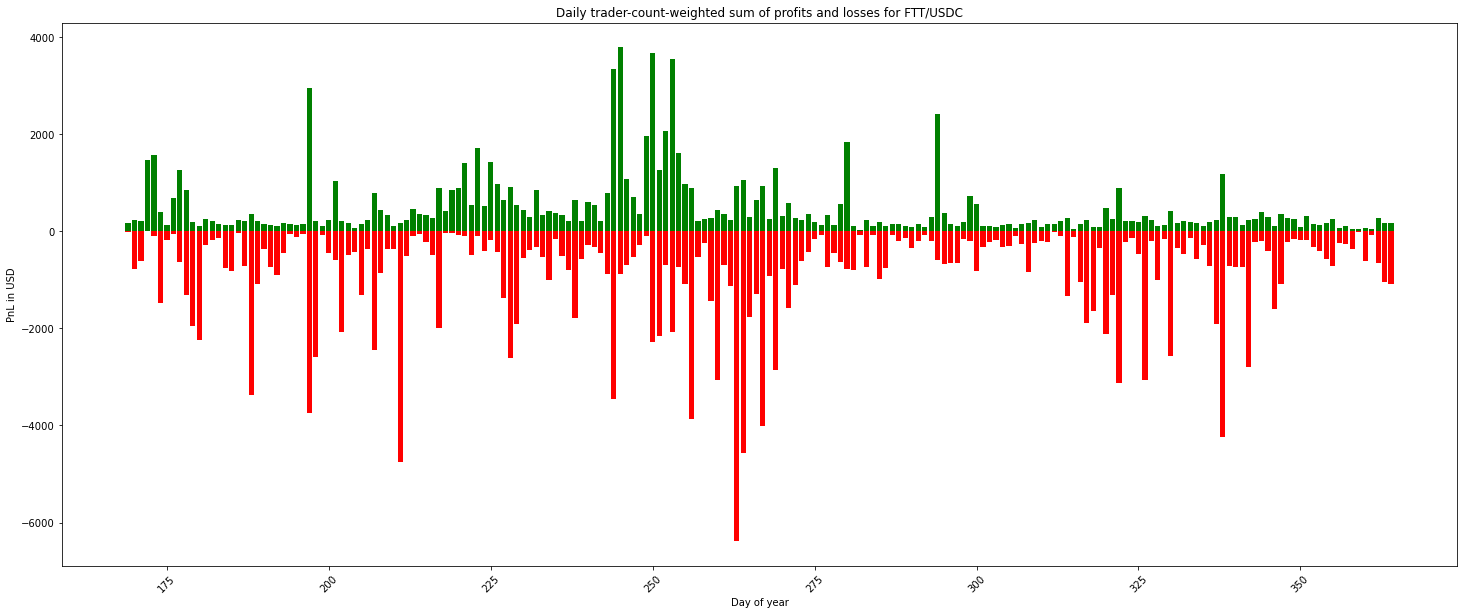

In [7]:
for amm in time_position_changes_2021_df["amm_name"].unique():
    changes_2021_for_amm_df = time_position_changes_2021_df[time_position_changes_2021_df["amm_name"] == amm]
    changes_per_day_and_trader_df = changes_2021_for_amm_df.groupby(["day_of_year", "trader"]).sum()
    
    positive_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["realized_pnl"] >= 0]
    negative_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["realized_pnl"] < 0]
    
    positive_changes_daily_count = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_count = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_sum = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_sum = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_count.set_index("day_of_year", inplace=True)
    negative_changes_daily_count.set_index("day_of_year", inplace=True)
    
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['realized_pnl'] / positive_changes_daily_count["counts"], color='g')
    ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['realized_pnl'] / negative_changes_daily_count["counts"], color='r')
    
    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily trader-count-weighted sum of profits and losses for " + amm)
    ax2.legend()
    plt.xticks(rotation=45)
    plt.show()

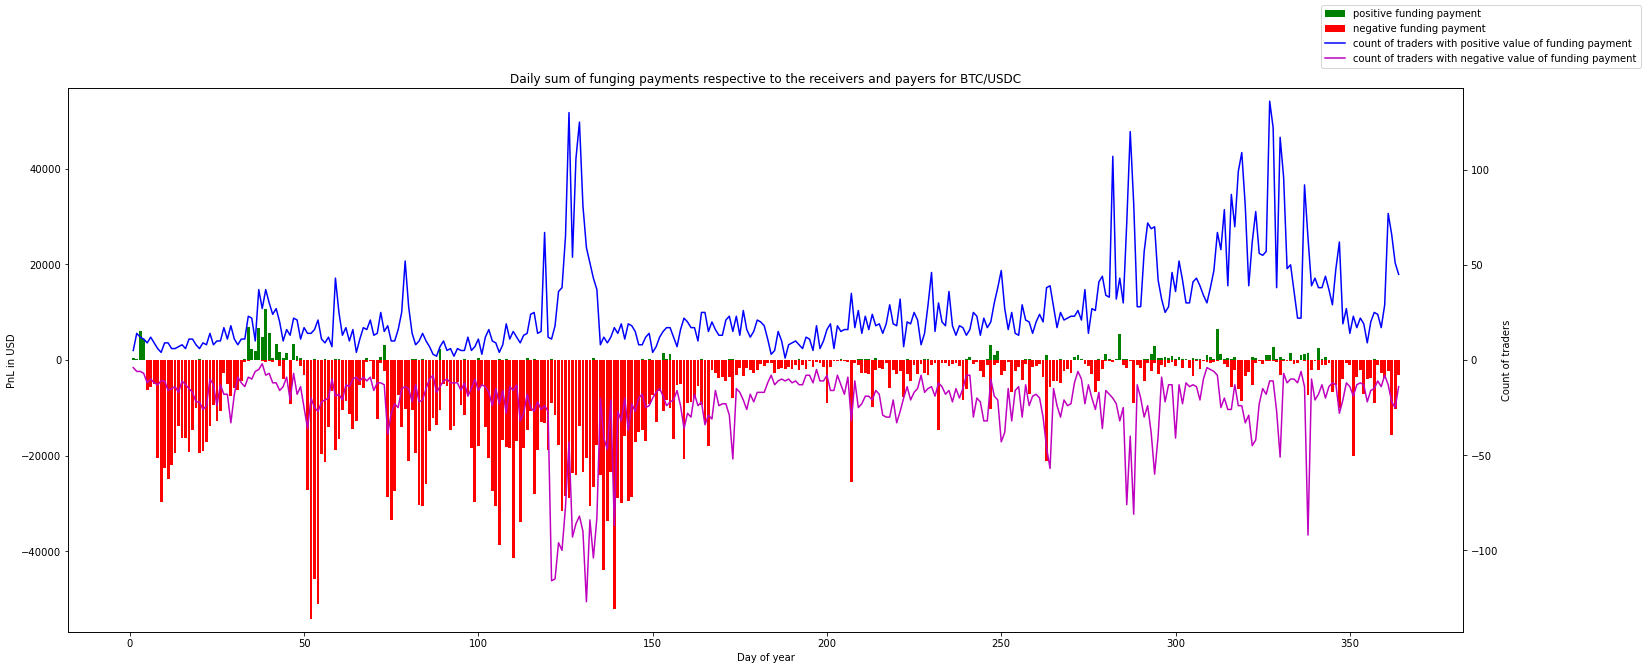

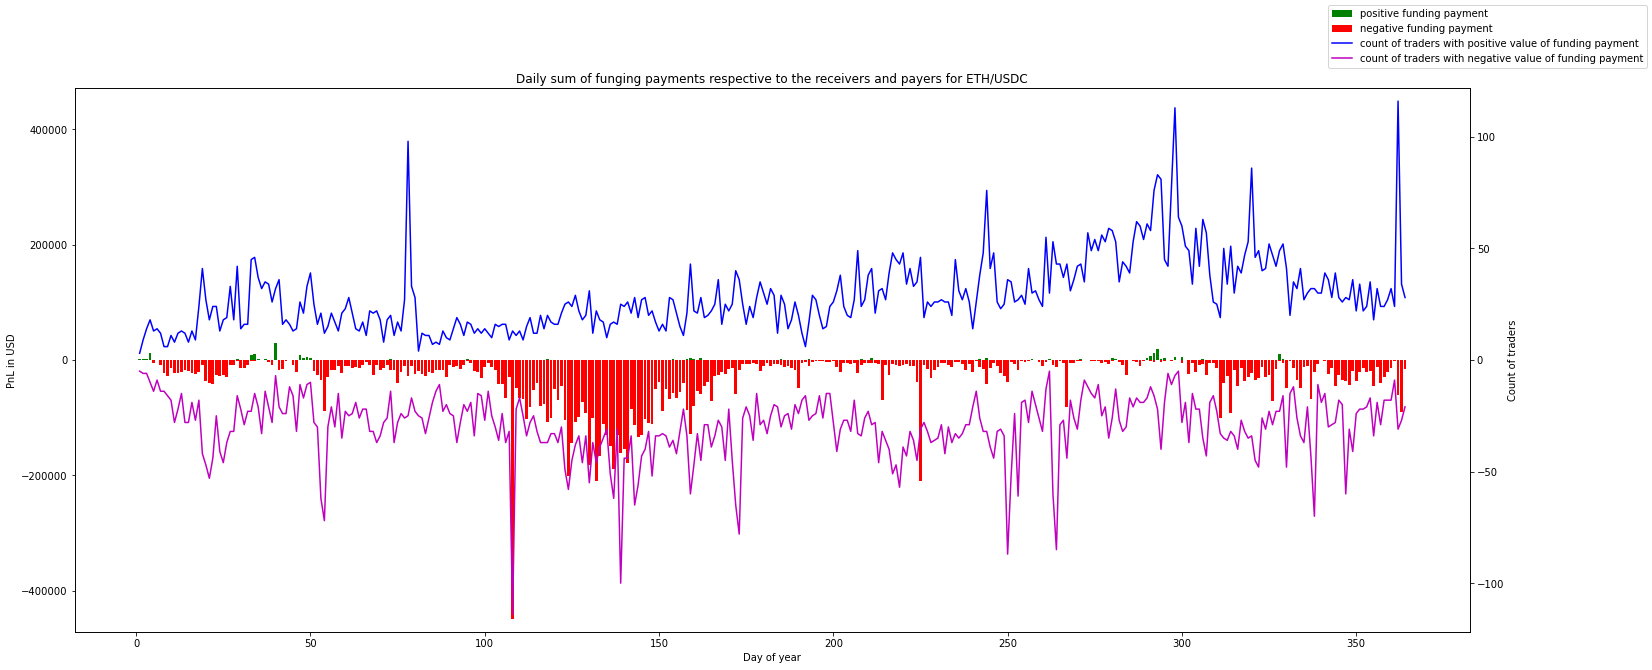

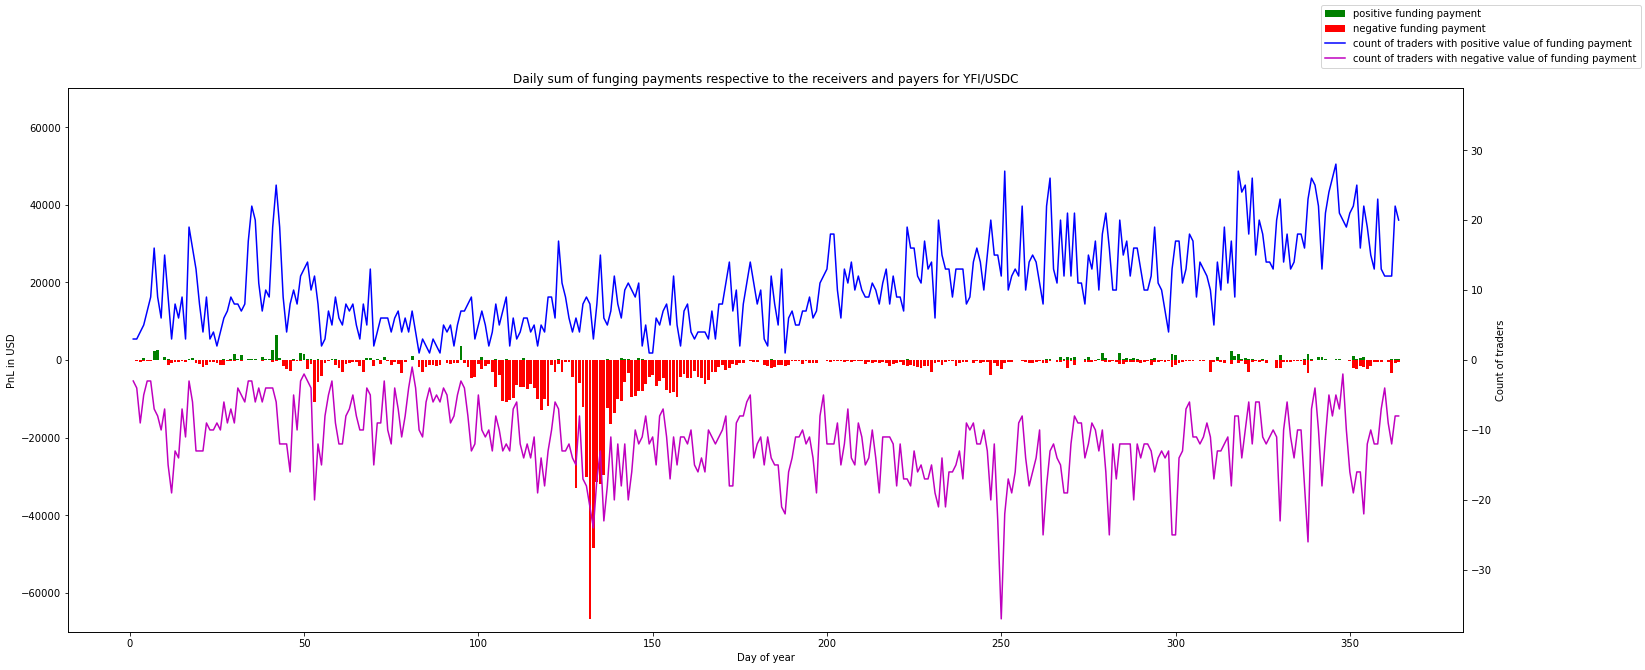

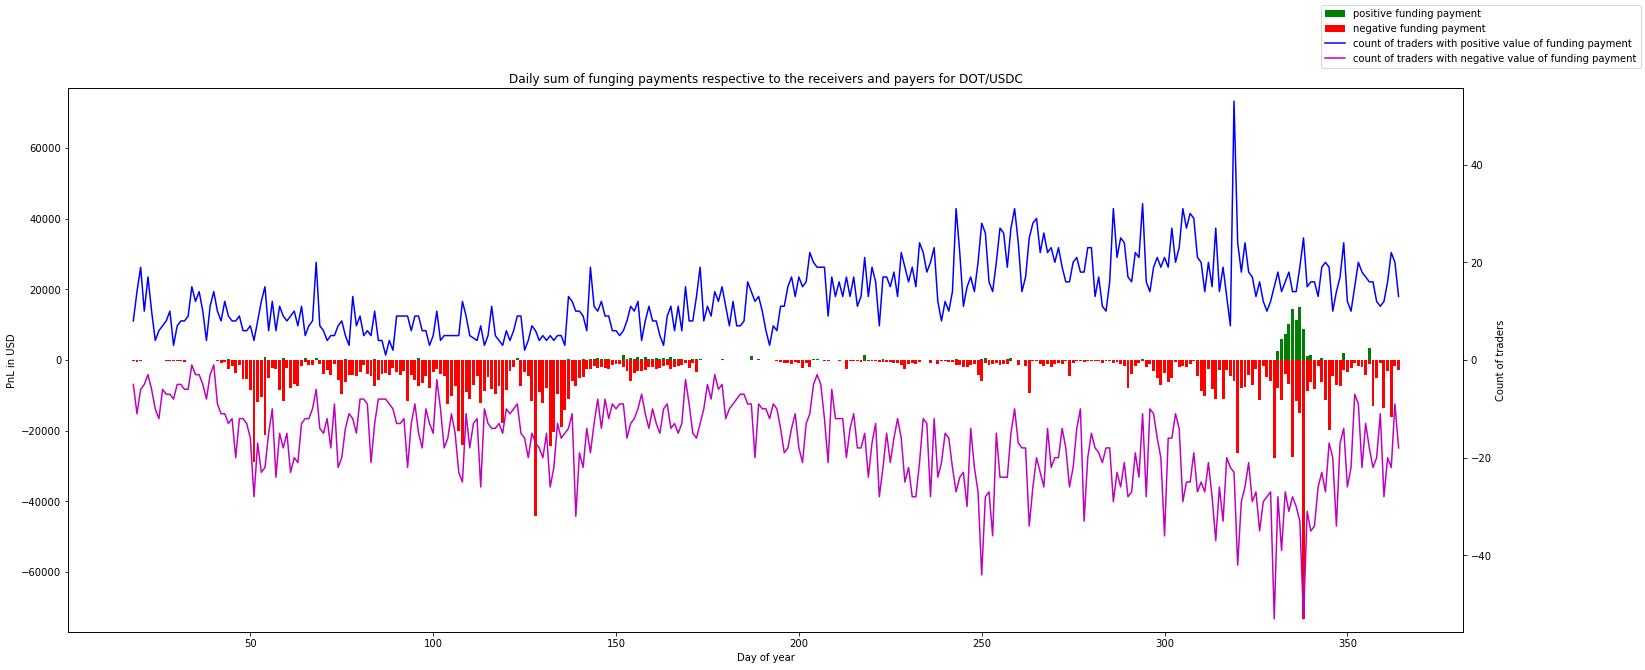

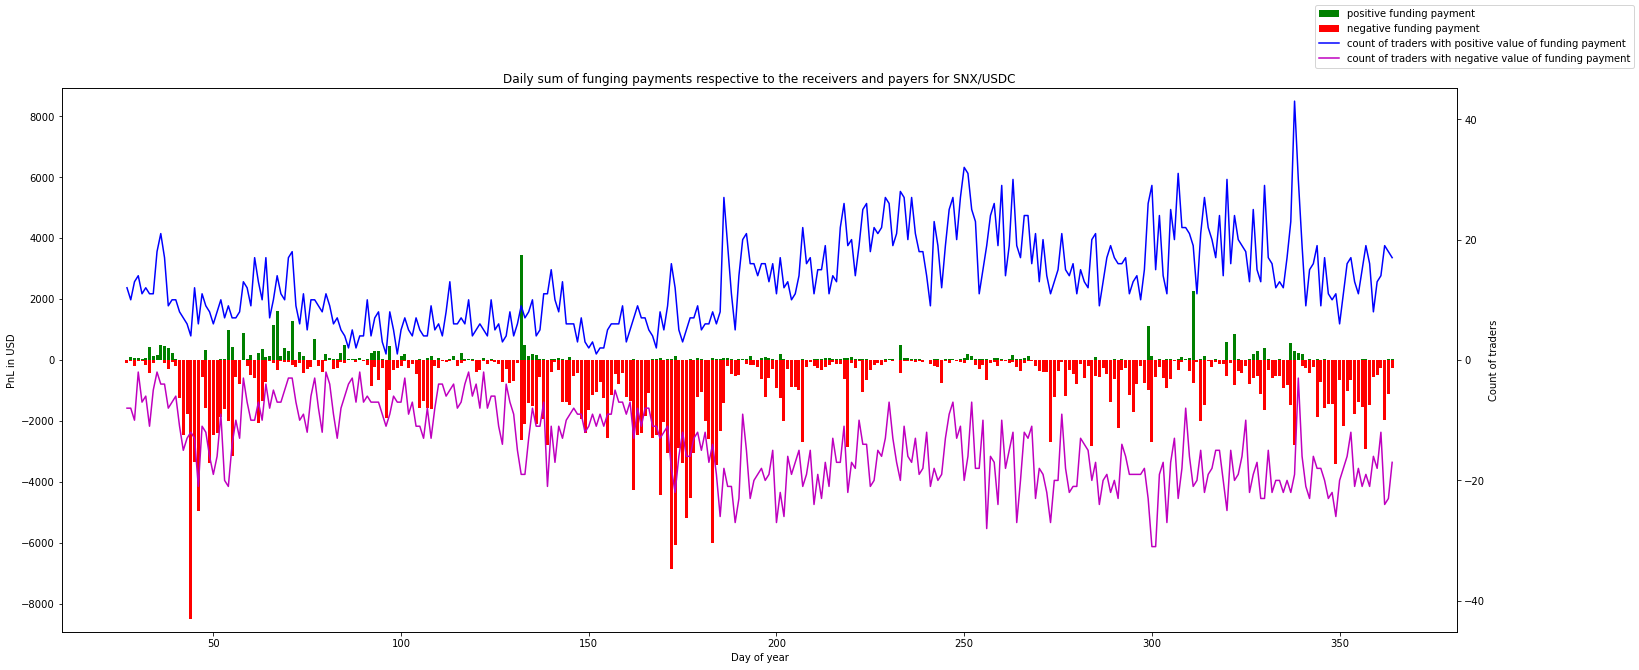

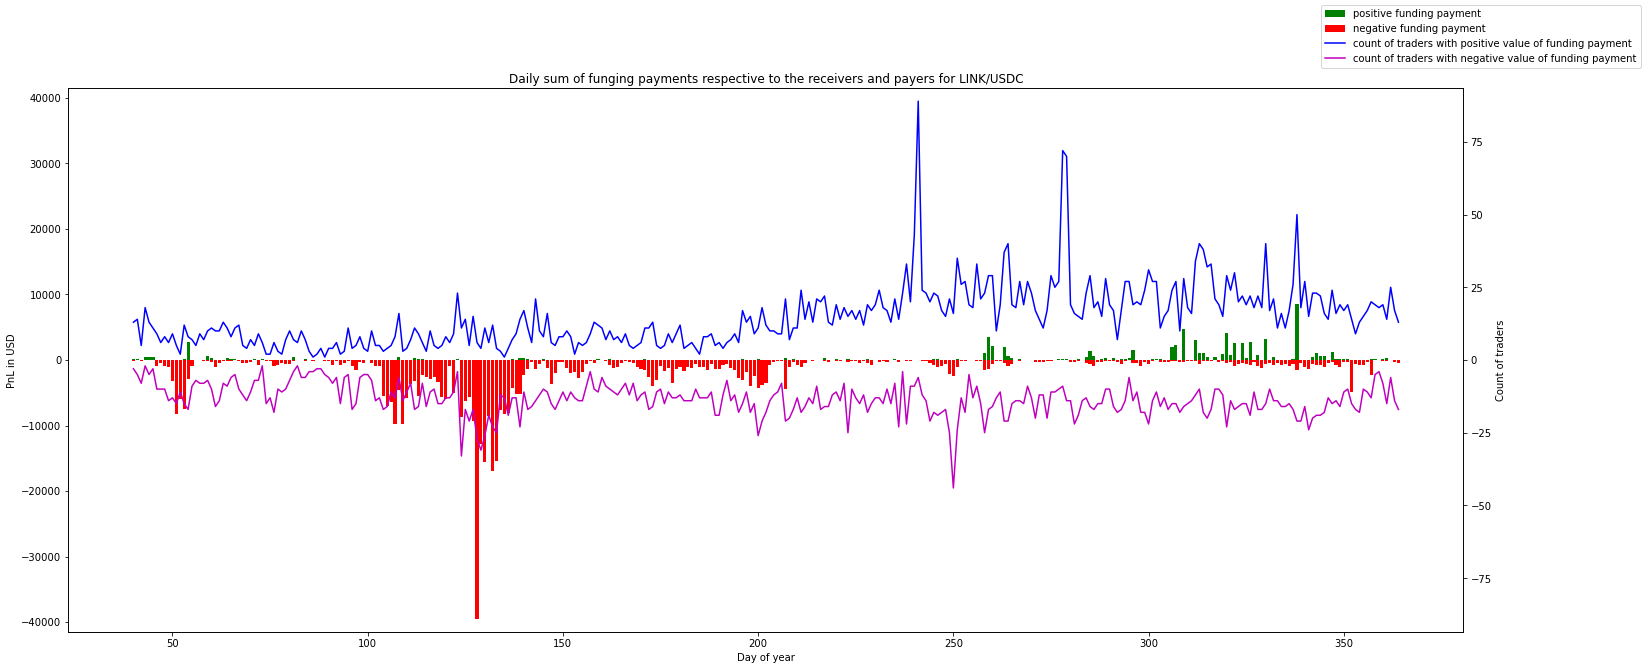

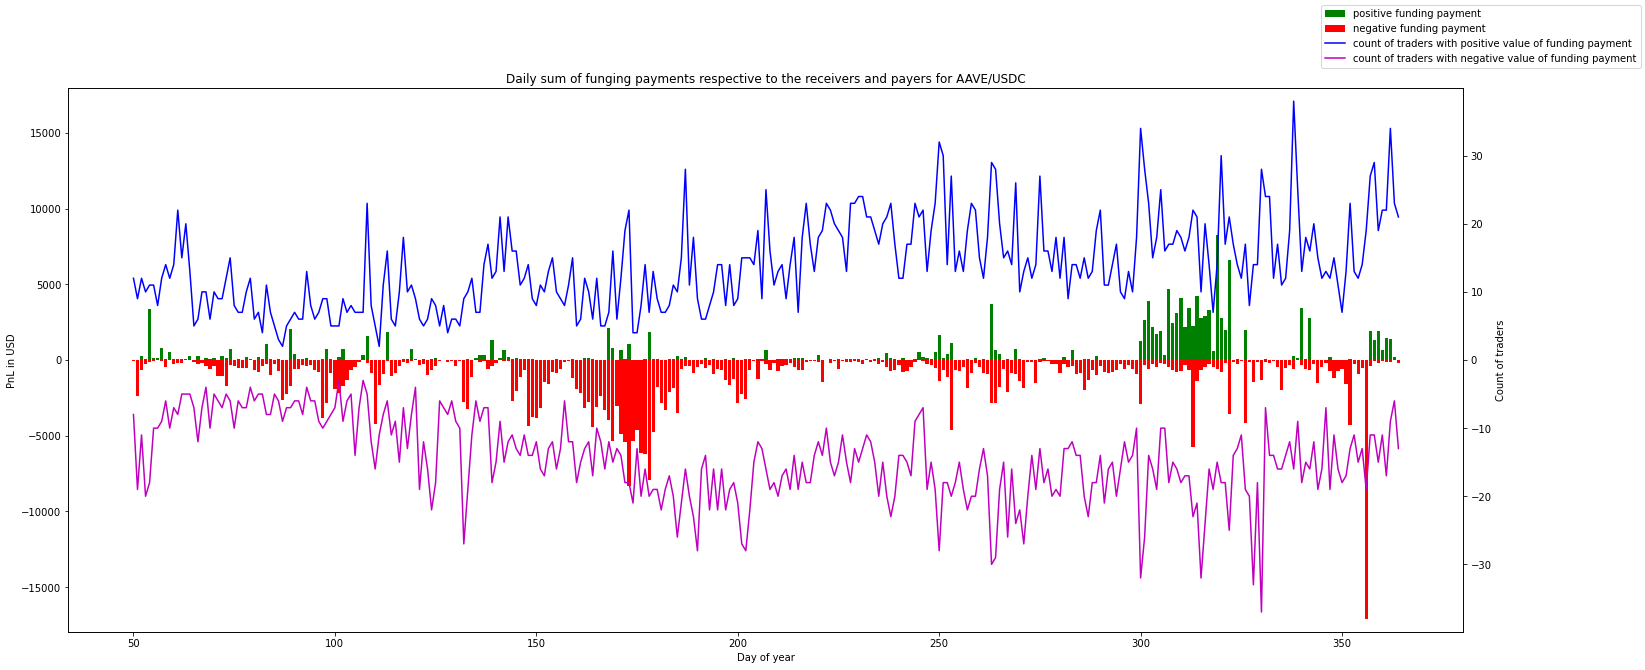

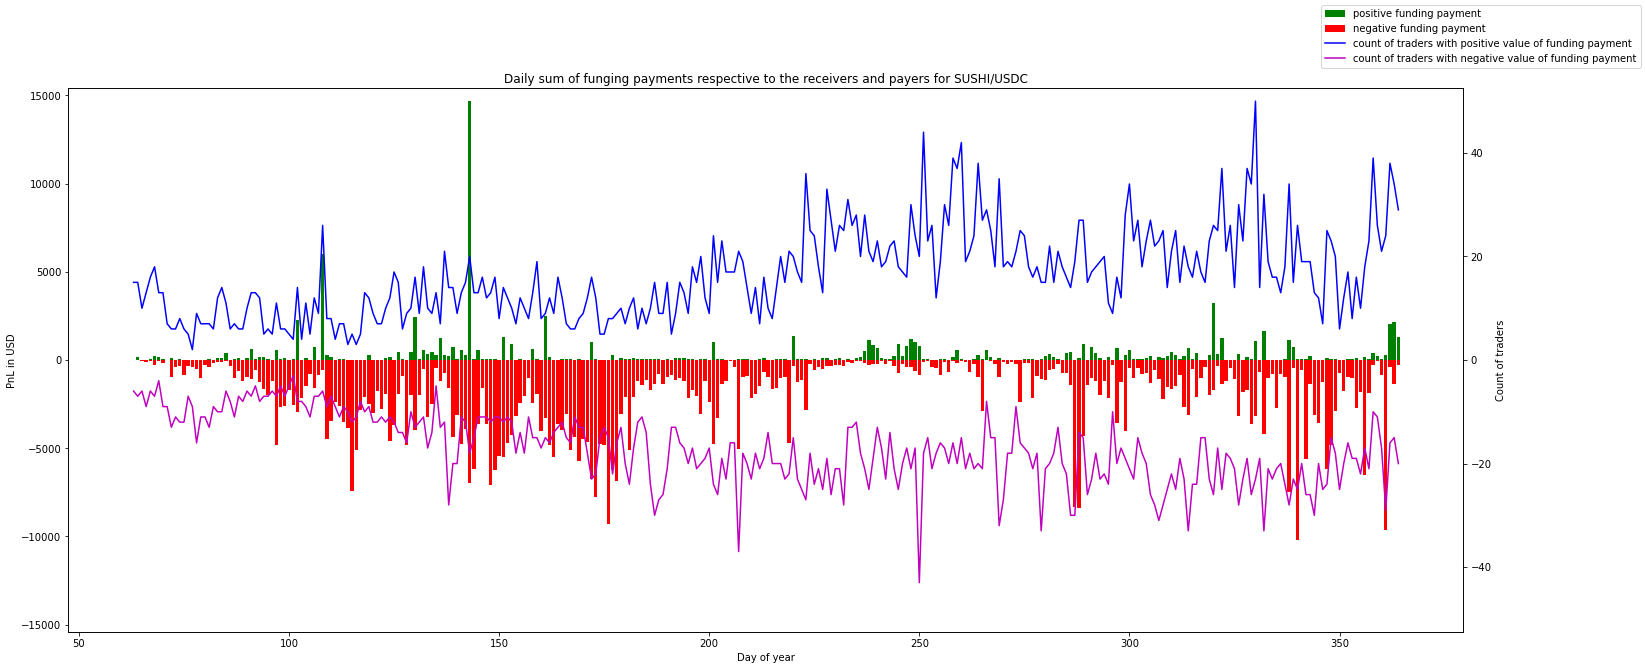

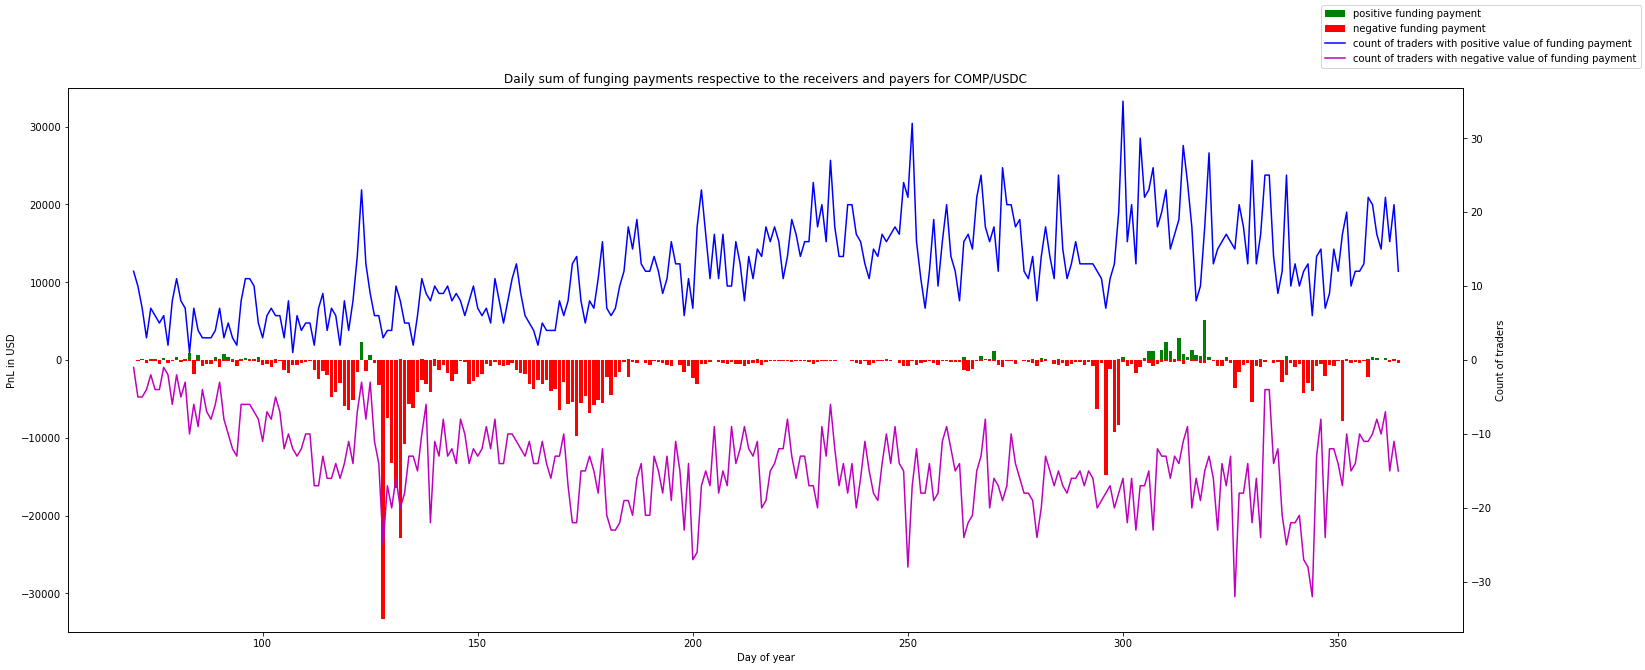

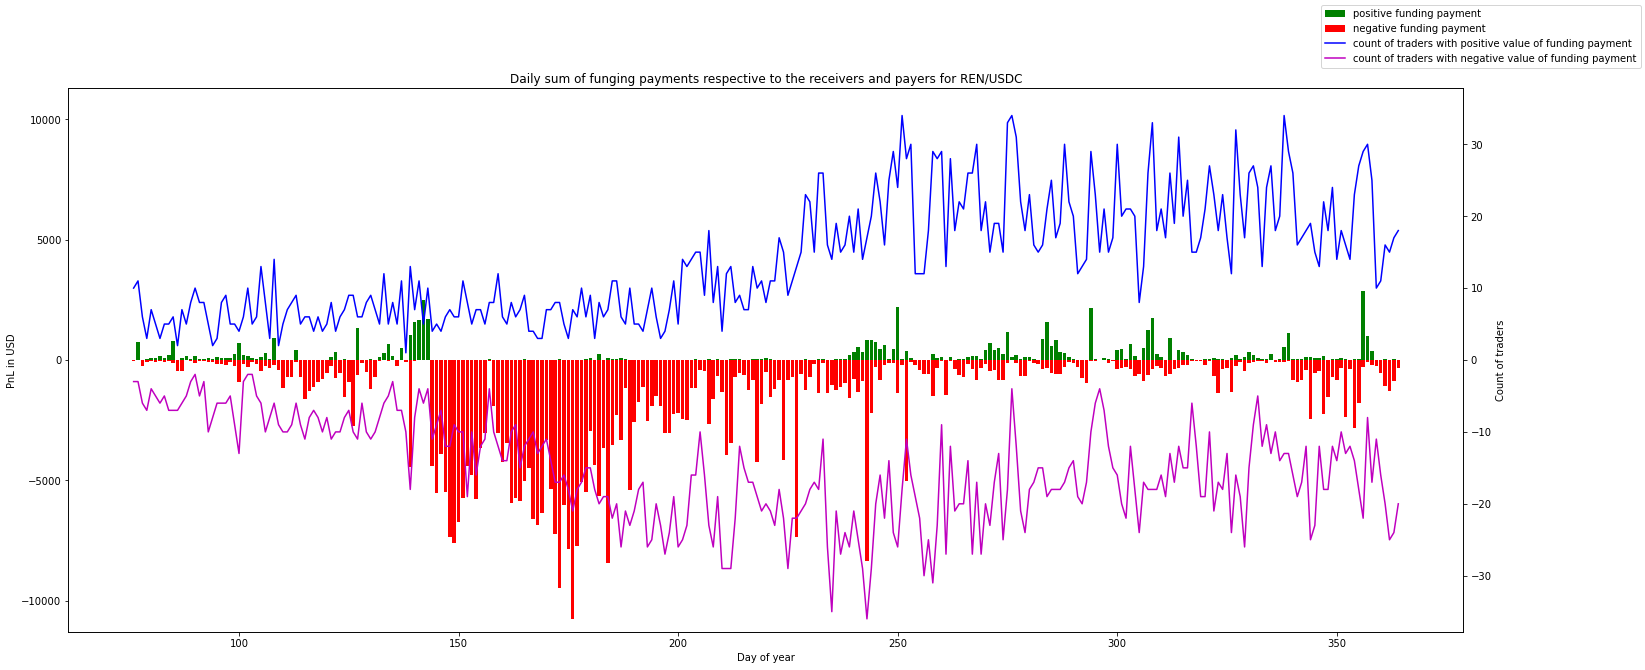

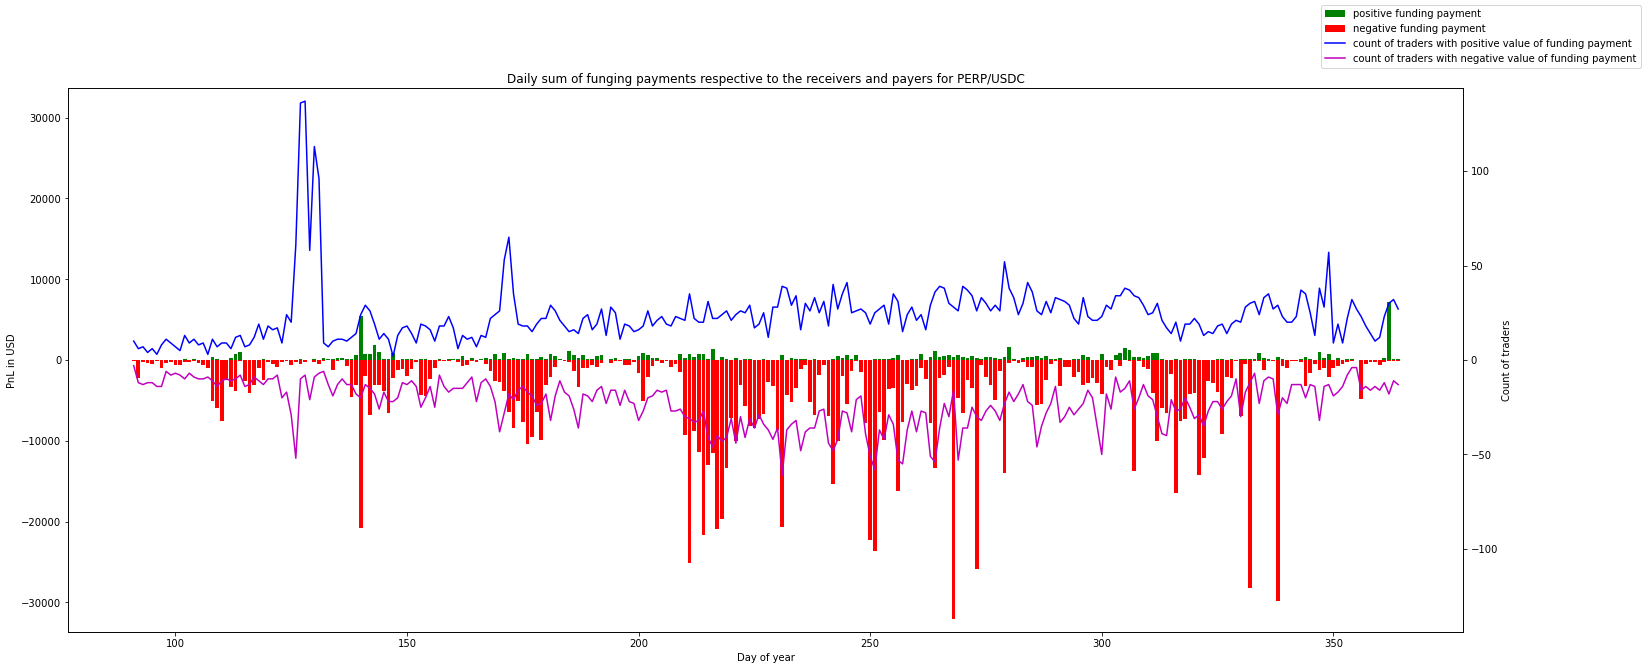

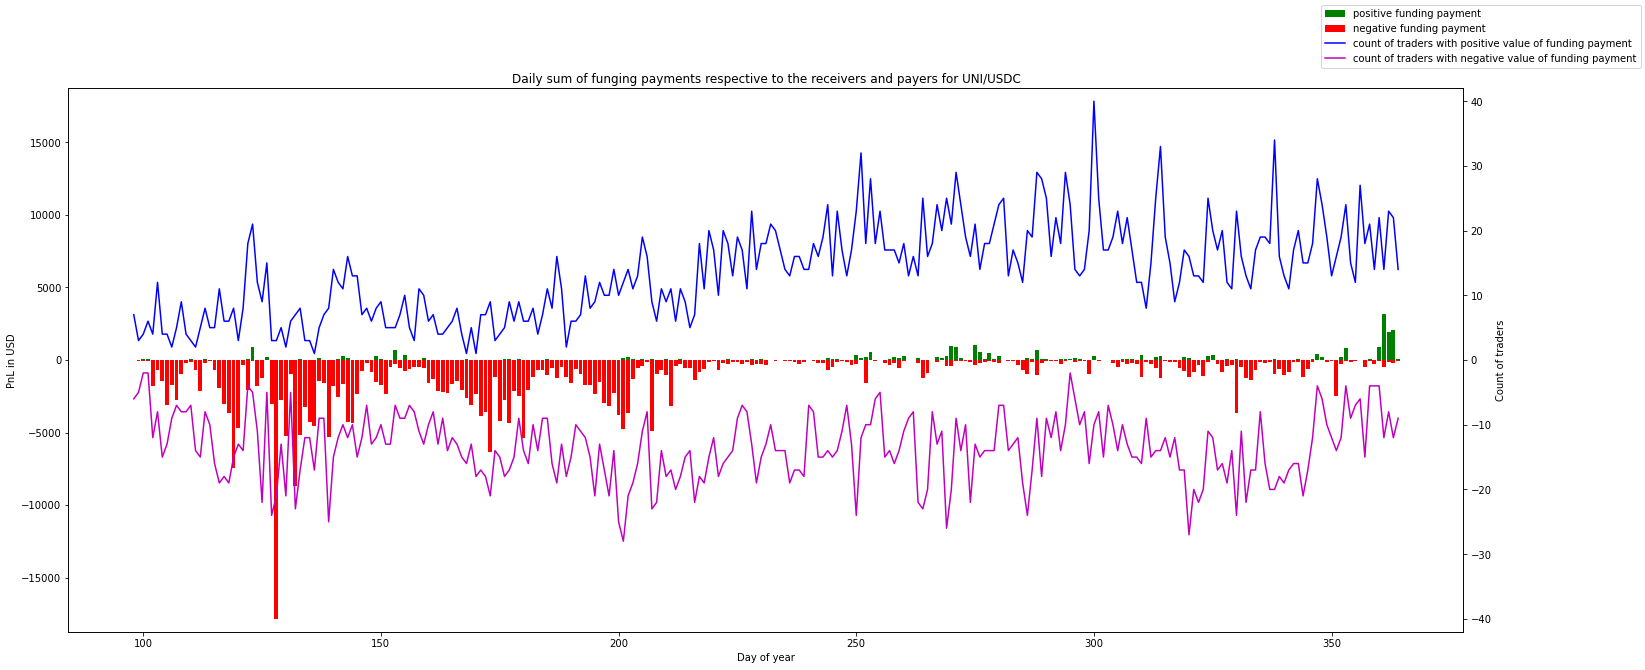

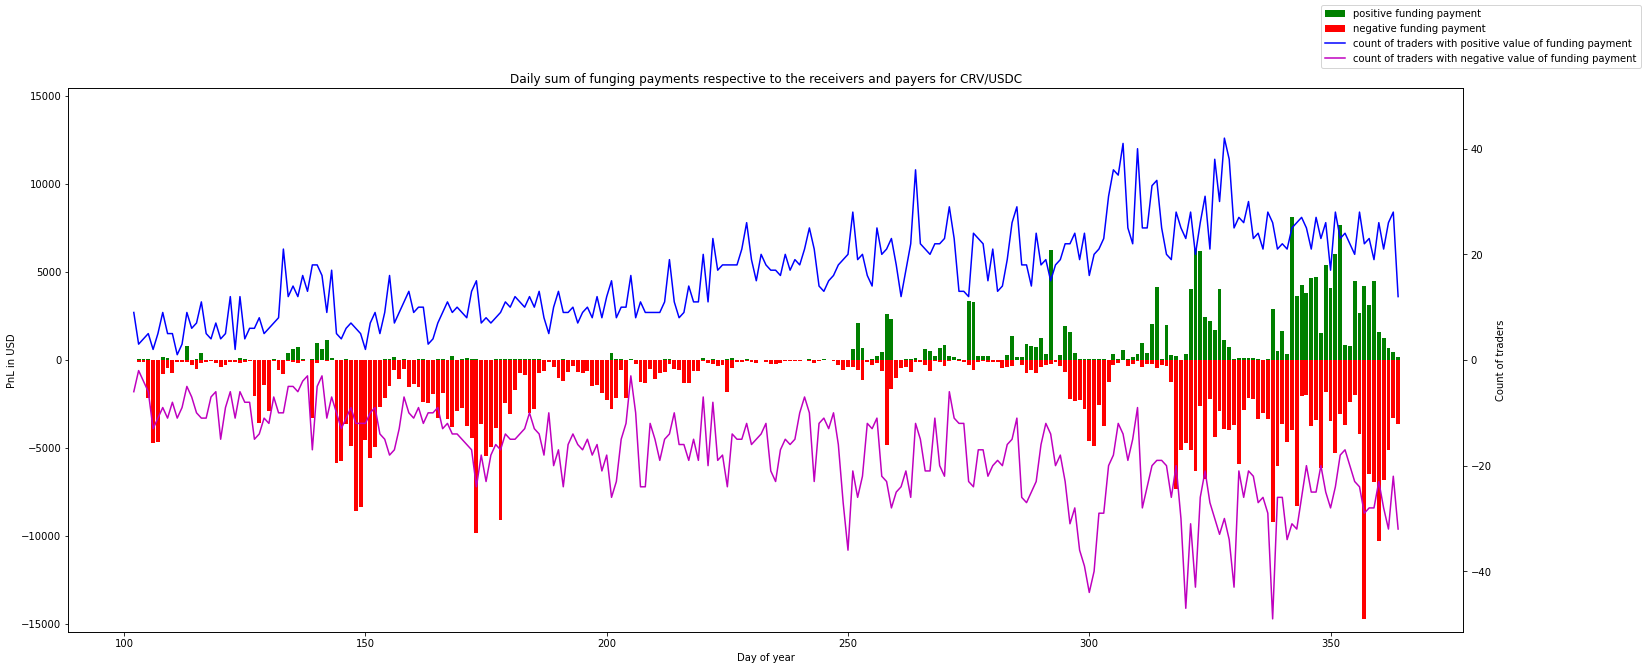

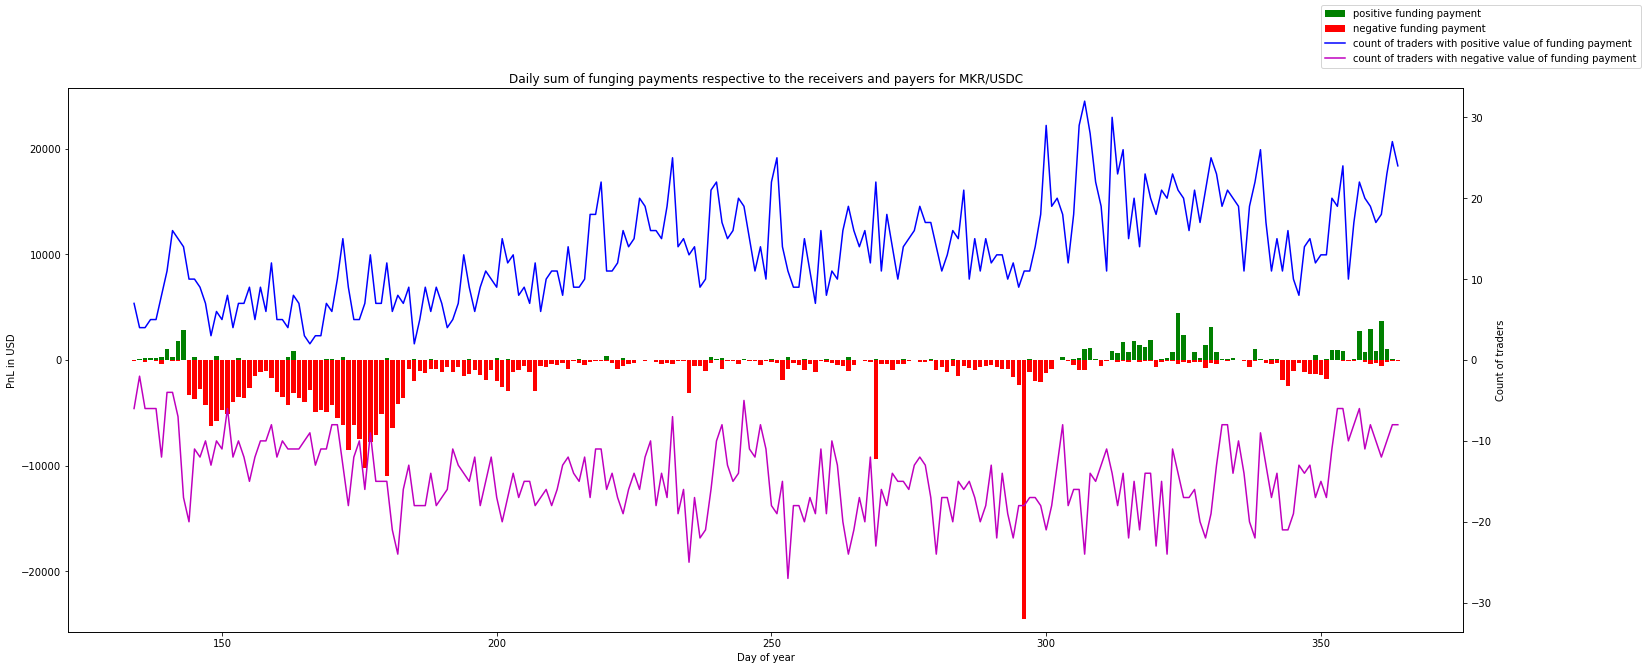

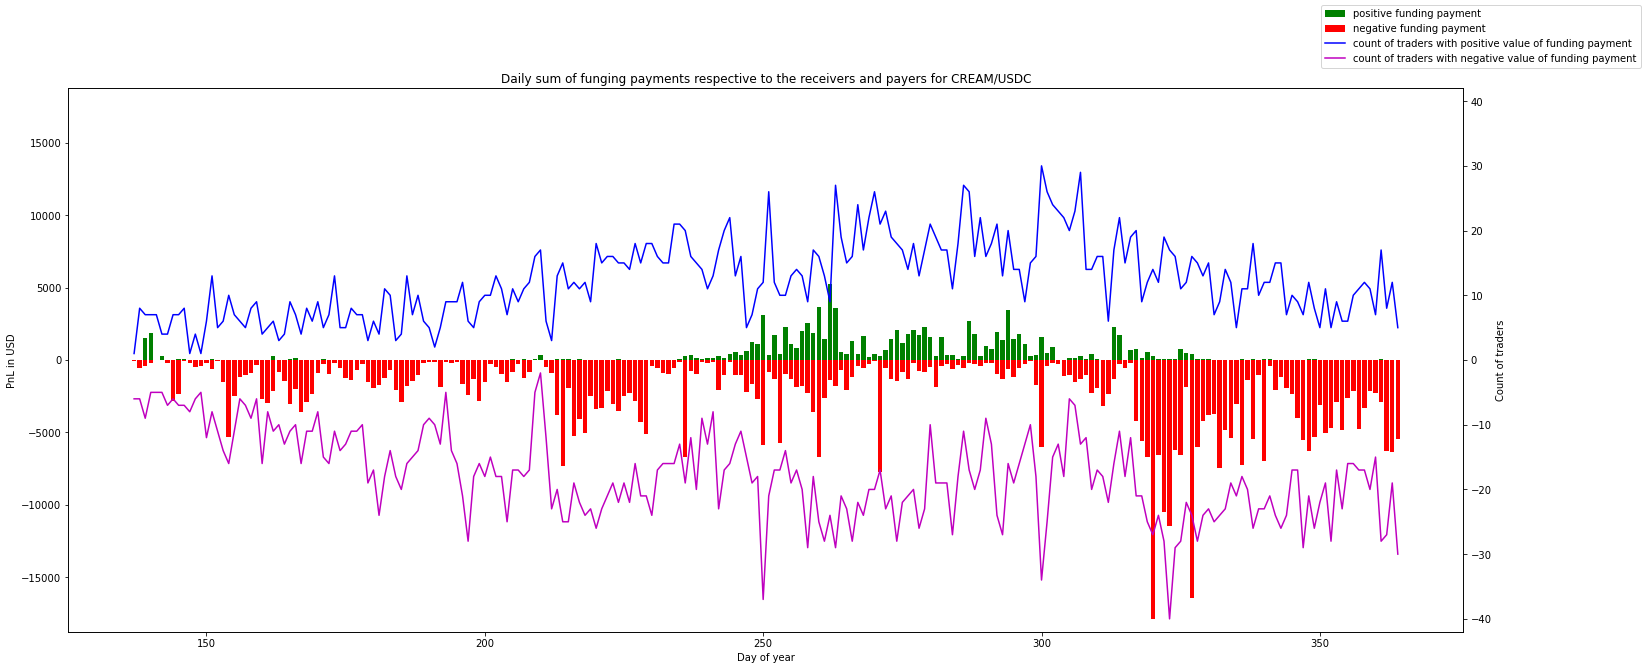

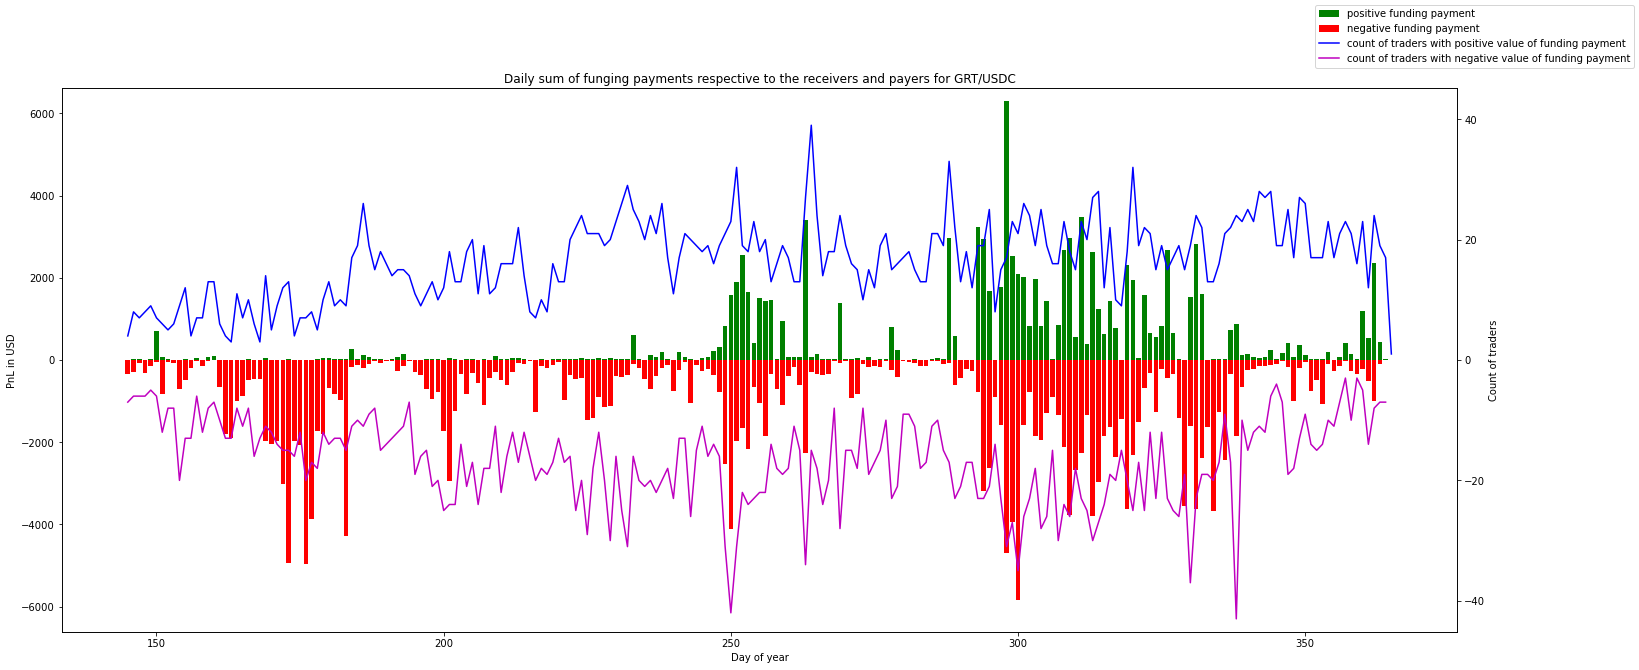

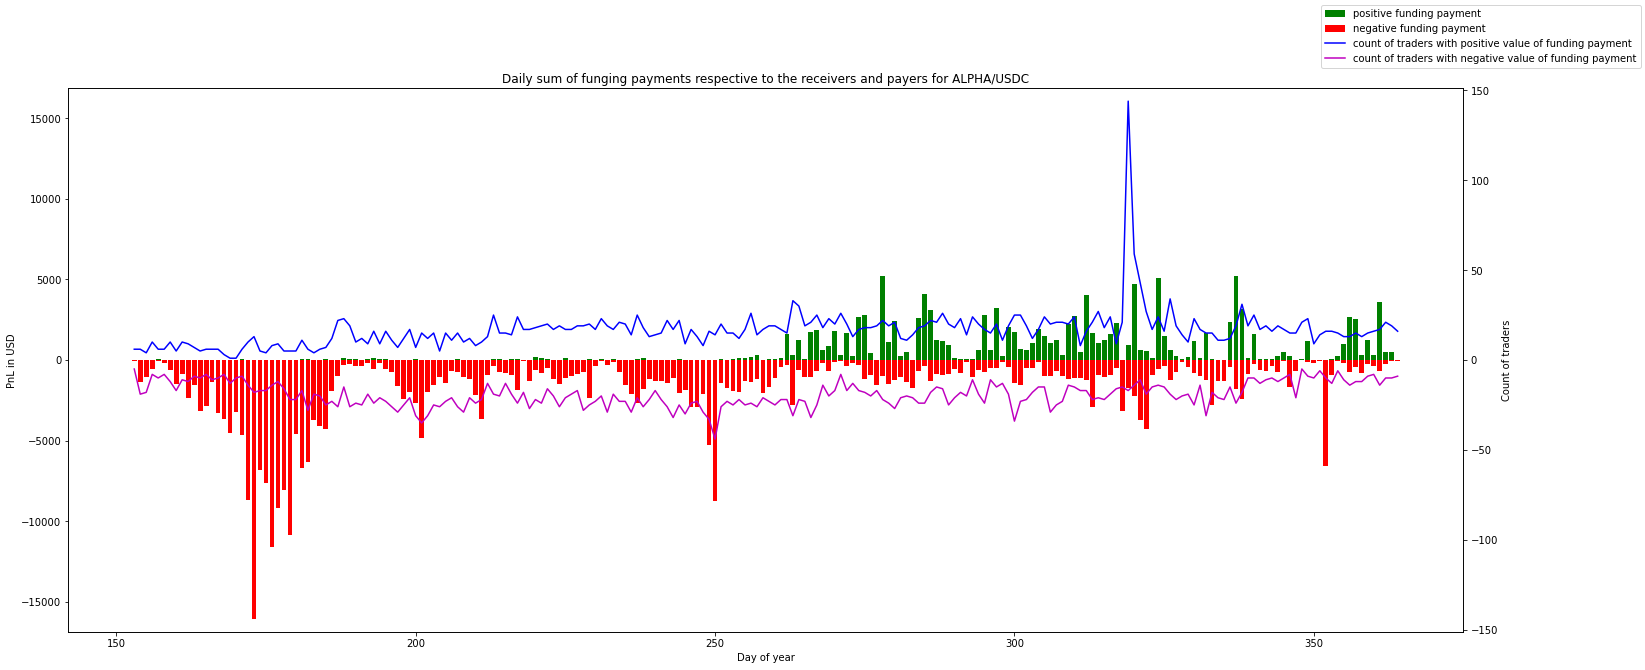

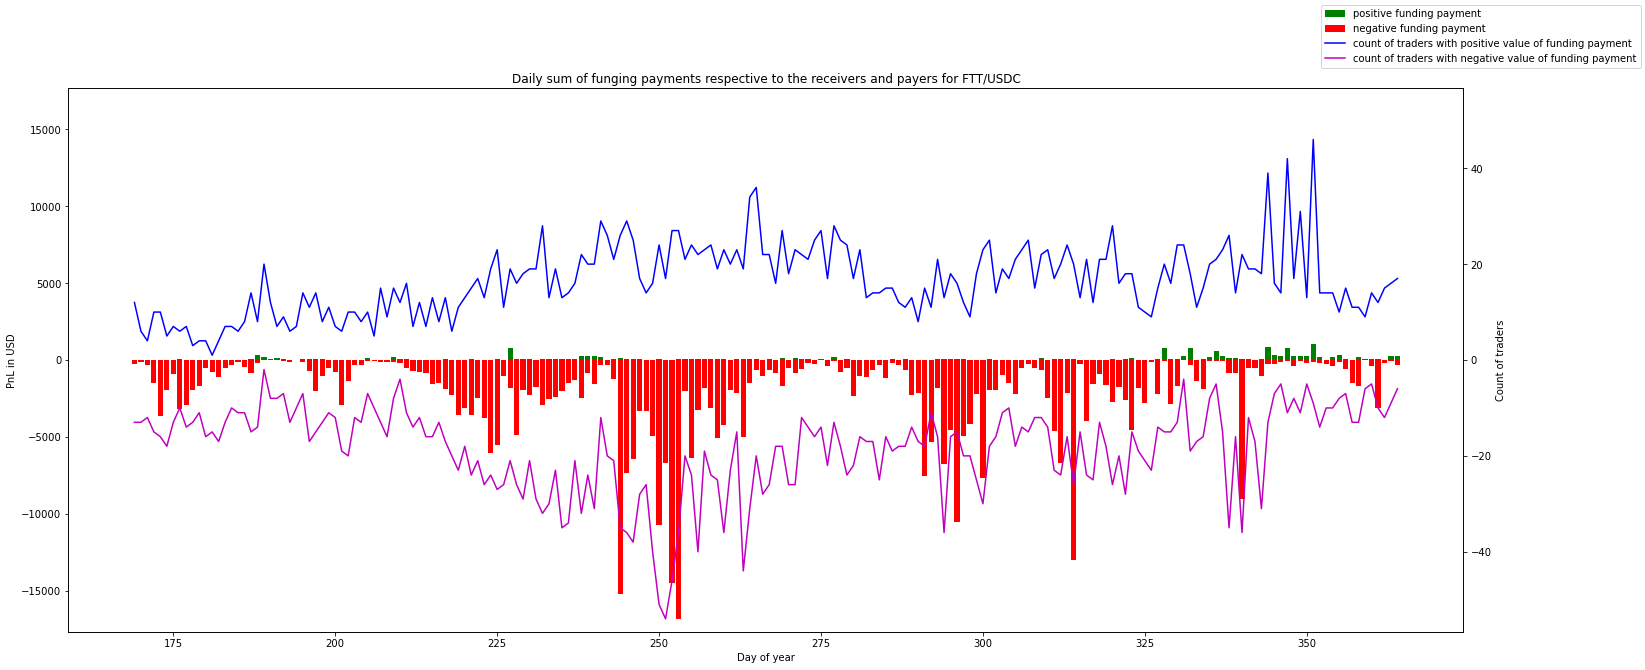

In [8]:
for amm in time_position_changes_2021_df["amm_name"].unique():
    changes_2021_for_amm_df = time_position_changes_2021_df[time_position_changes_2021_df["amm_name"] == amm]
    changes_per_day_and_trader_df = changes_2021_for_amm_df.groupby(["day_of_year", "trader"]).sum()
    
    positive_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["funding_payment"] >= 0]
    negative_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["funding_payment"] < 0]
    
    positive_changes_daily_count = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_count = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_sum = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_sum = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['funding_payment'], color='g', label="positive funding payment")
    ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['funding_payment'], color='r', label="negative funding payment")
    
    ax2 = ax.twinx()
    ax2.plot(positive_changes_daily_count.day_of_year, positive_changes_daily_count["counts"], color='b', 
             label='count of traders with positive value of funding payment')
    ax2.plot(negative_changes_daily_count.day_of_year, -negative_changes_daily_count["counts"], color='m', 
             label='count of traders with negative value of funding payment')
    
    max_pnl = abs(positive_changes_daily_sum["funding_payment"].max())
    min_pnl = abs(negative_changes_daily_sum["funding_payment"].min())
    max_profiters = positive_changes_daily_count["counts"].max()
    max_lossers = negative_changes_daily_count["counts"].max()
    
    pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl
    count_limit = max_profiters if max_profiters > max_lossers else max_lossers
    
    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
    ax2.set_ylabel("Count of traders")
    ax2.set_ylim(-count_limit * 1.05, count_limit * 1.05)
    ax.set_title("Daily sum of funging payments respective to the receivers and payers for " + amm)
    fig.legend()
    plt.xticks(rotation=45)
    plt.show()

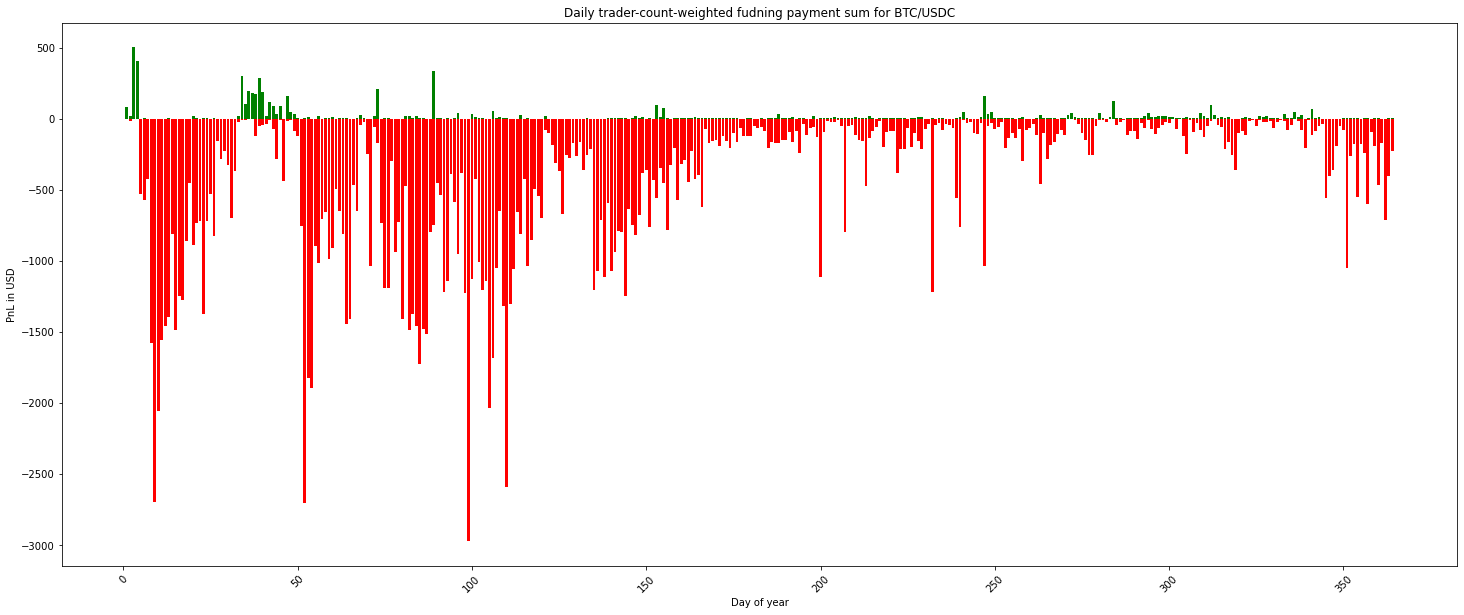

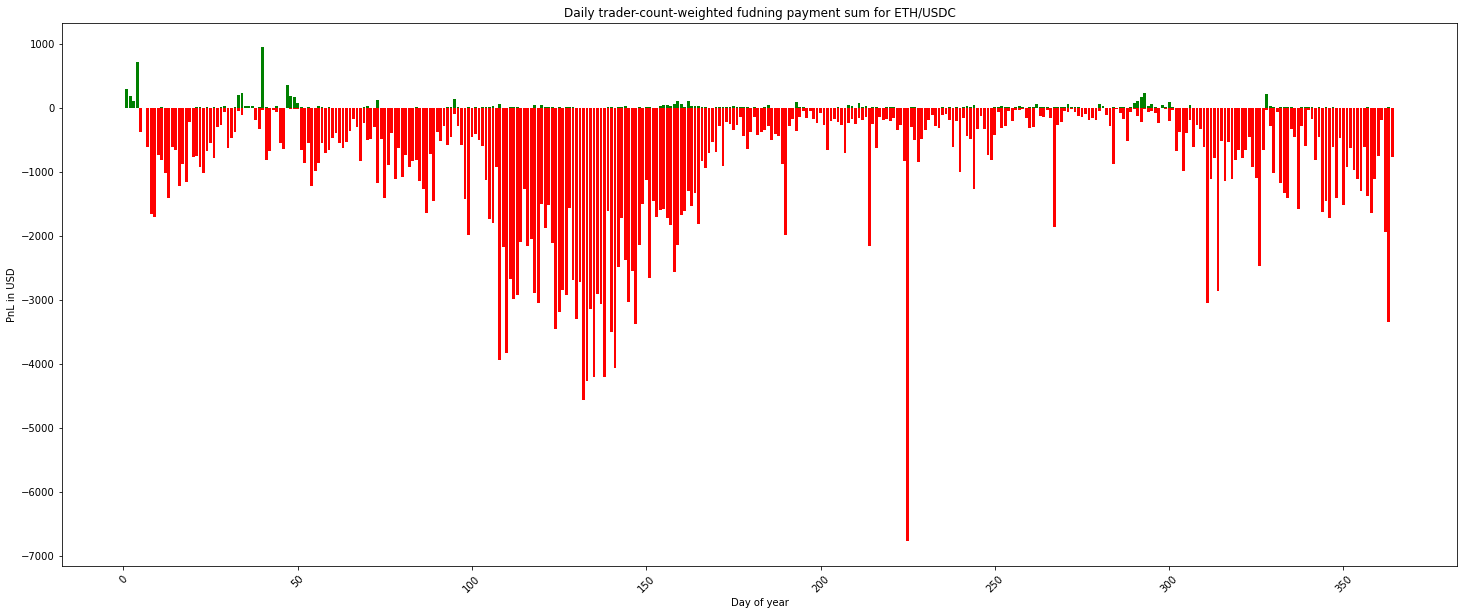

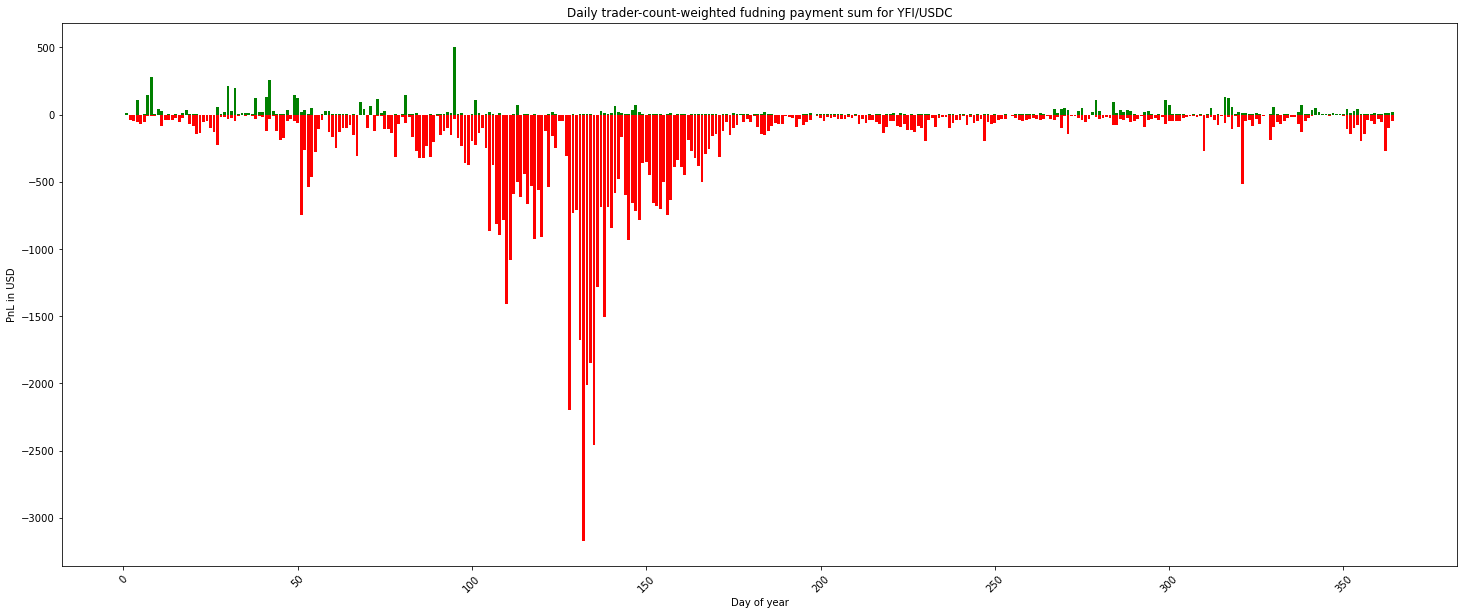

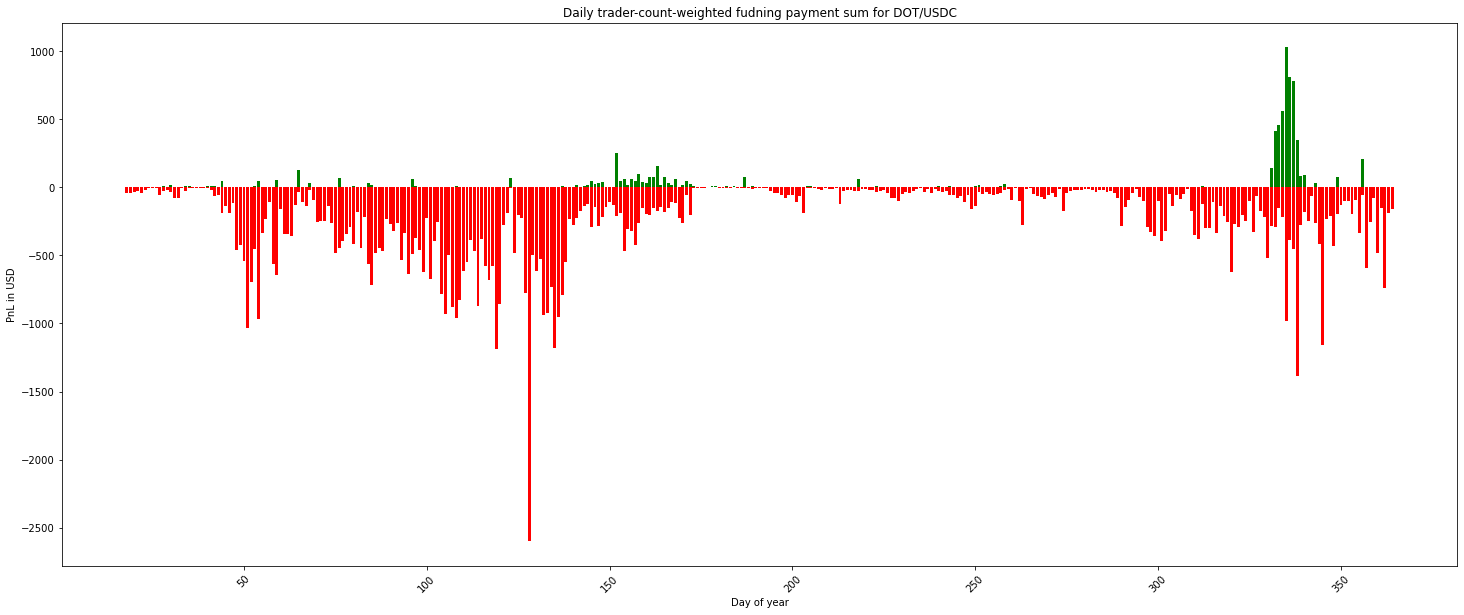

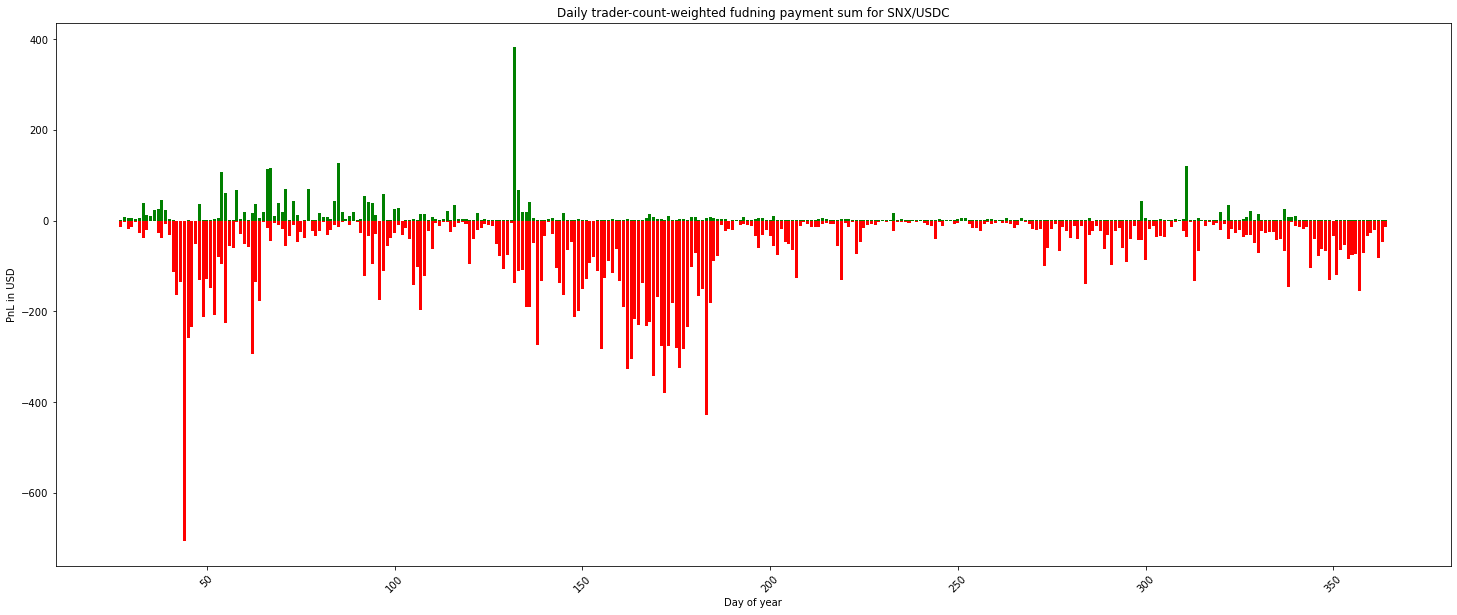

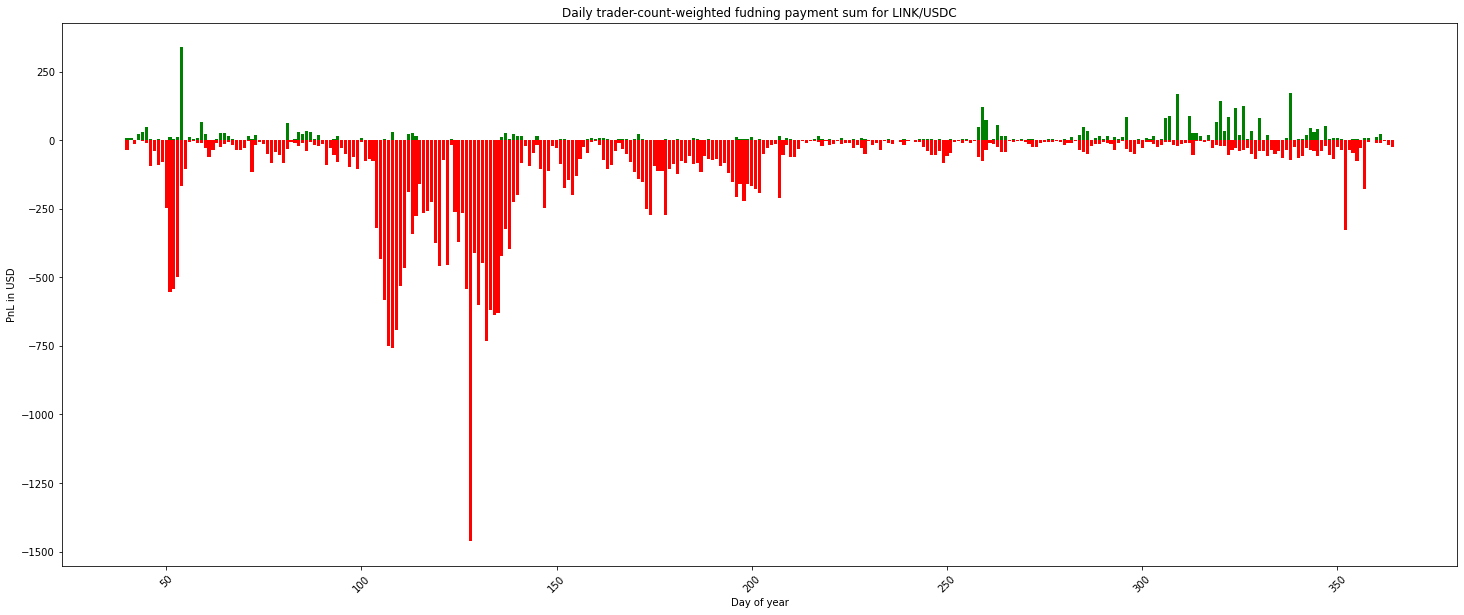

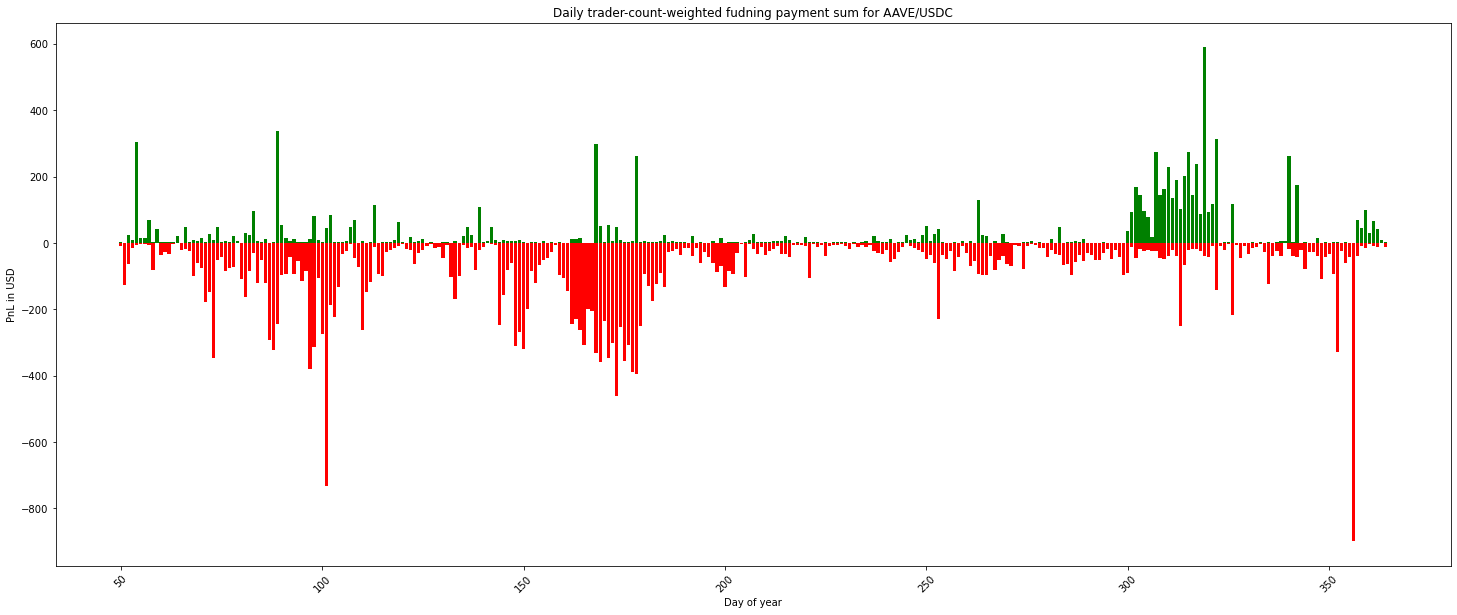

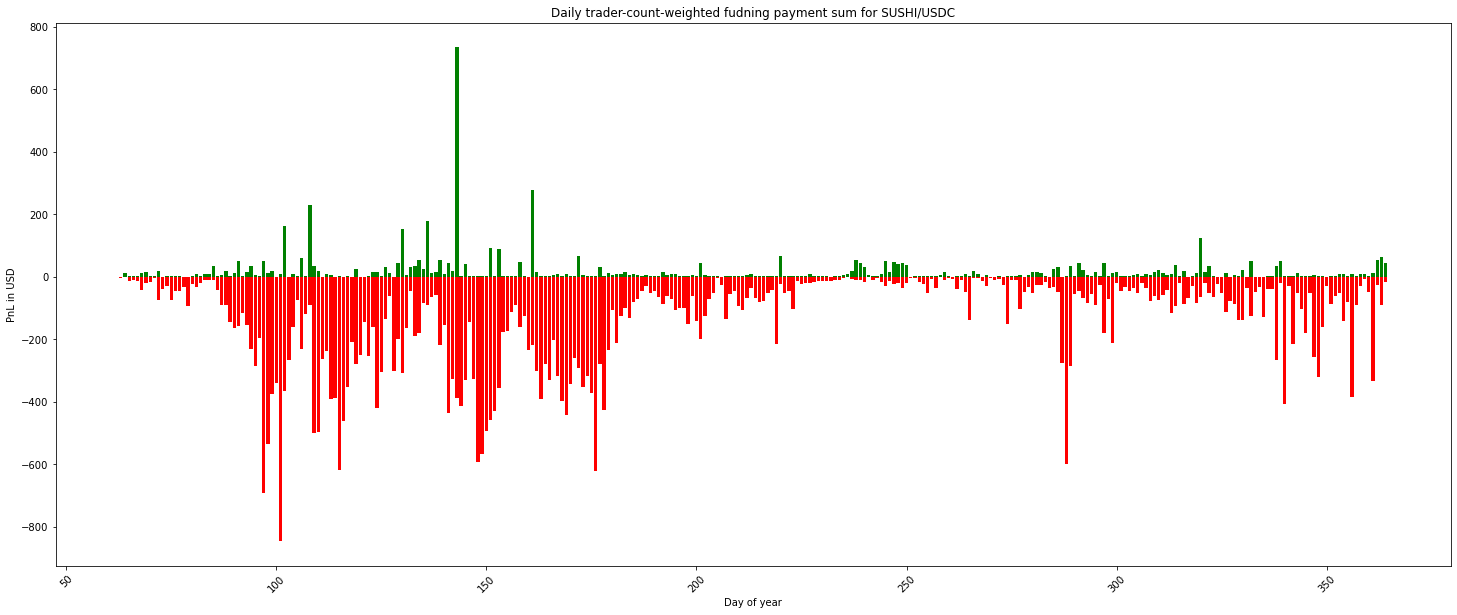

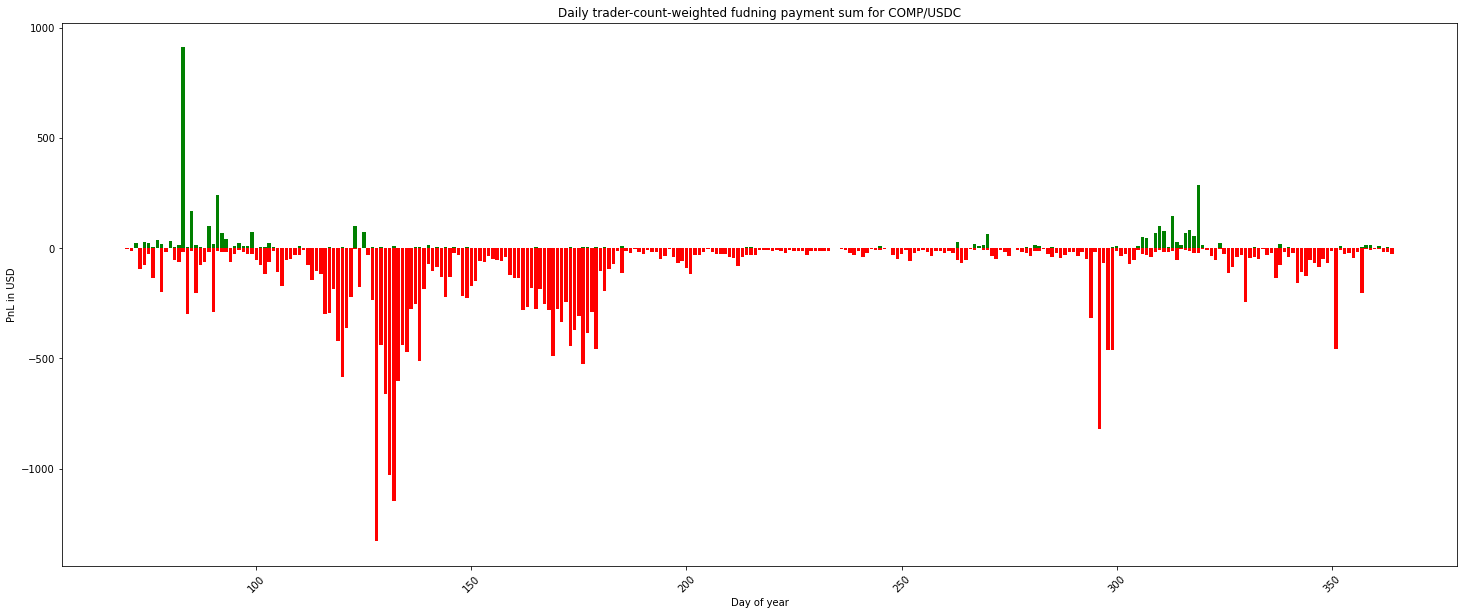

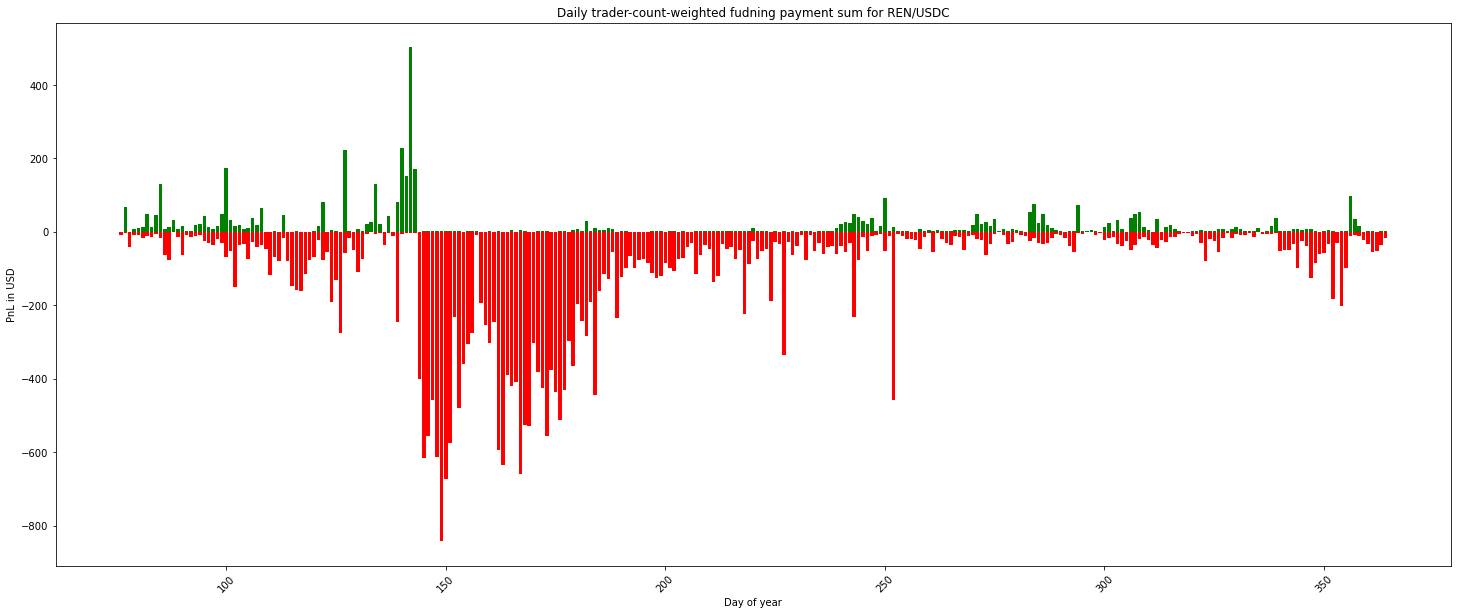

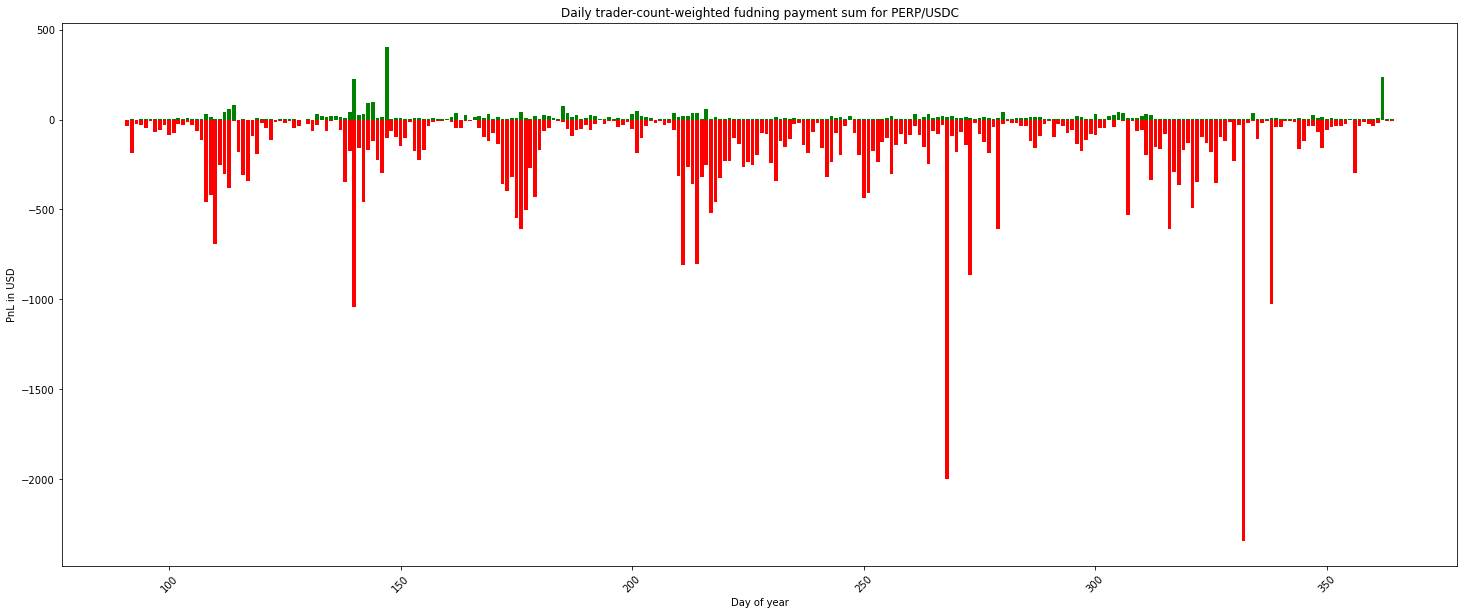

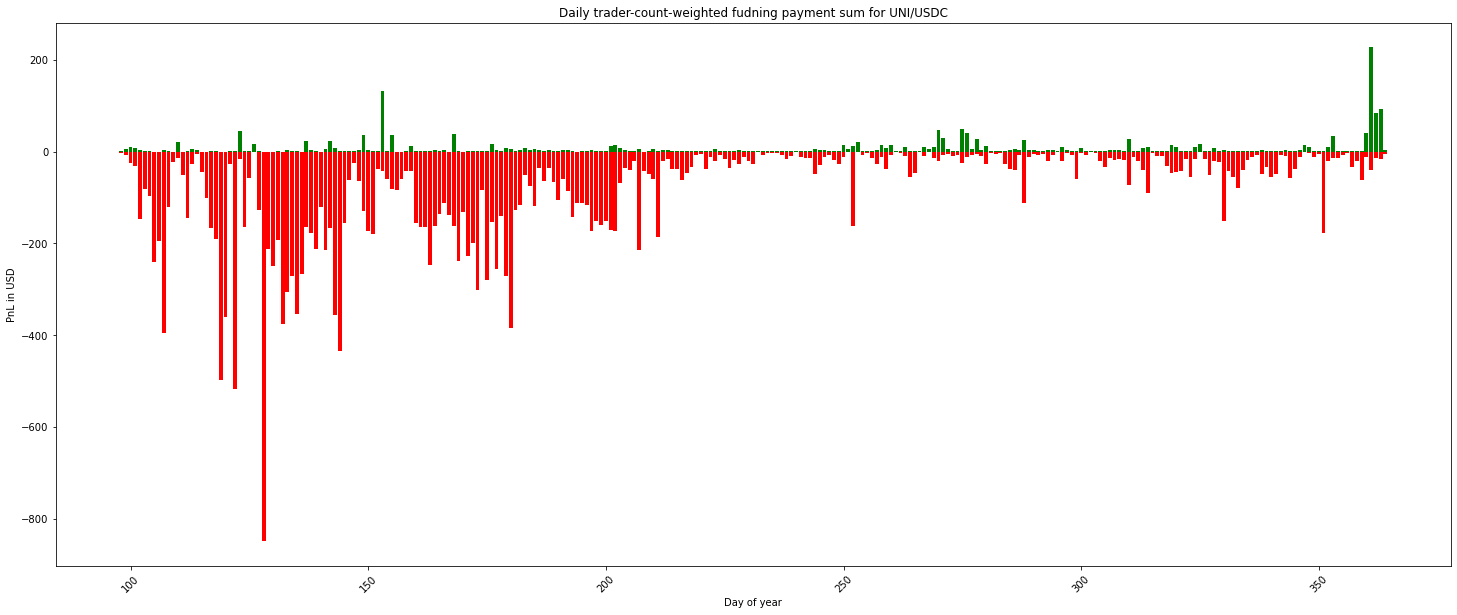

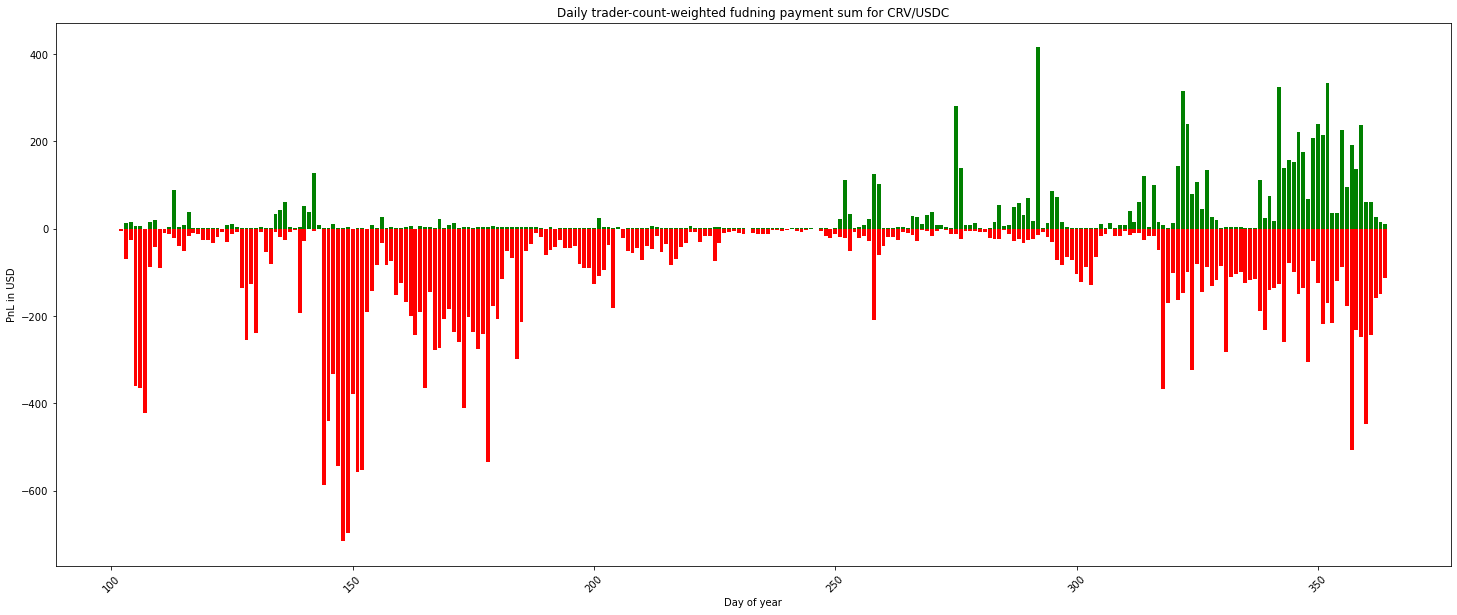

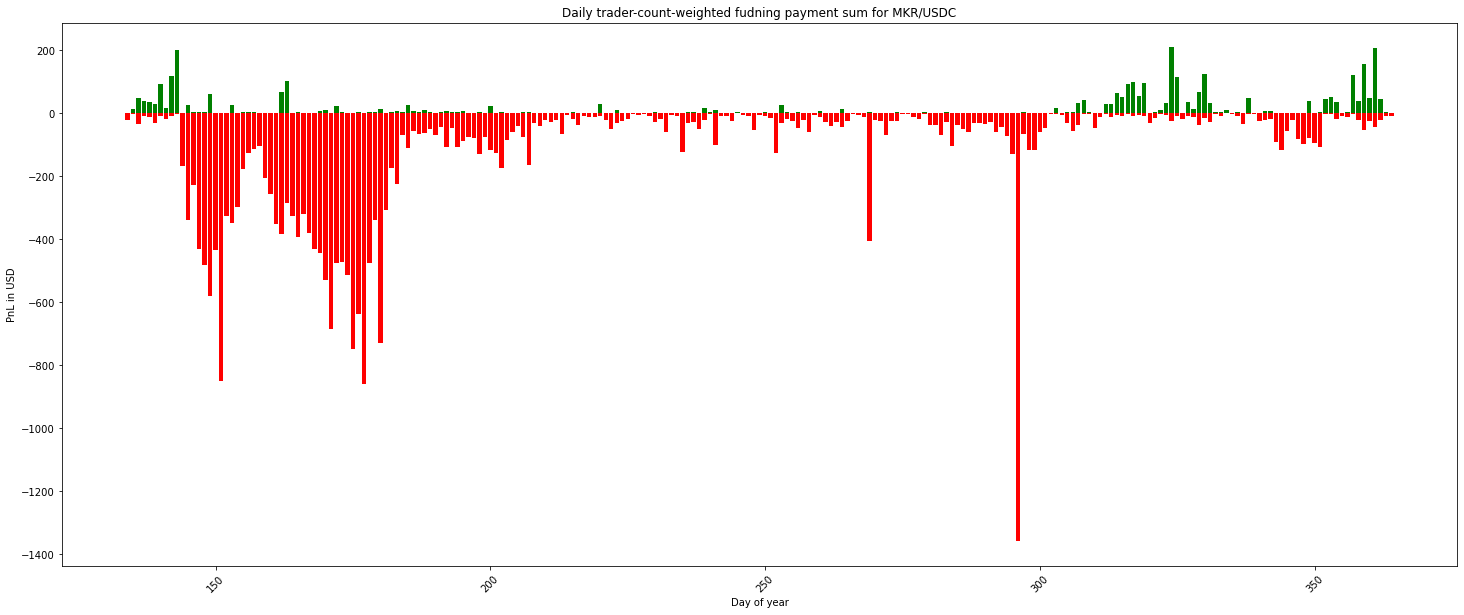

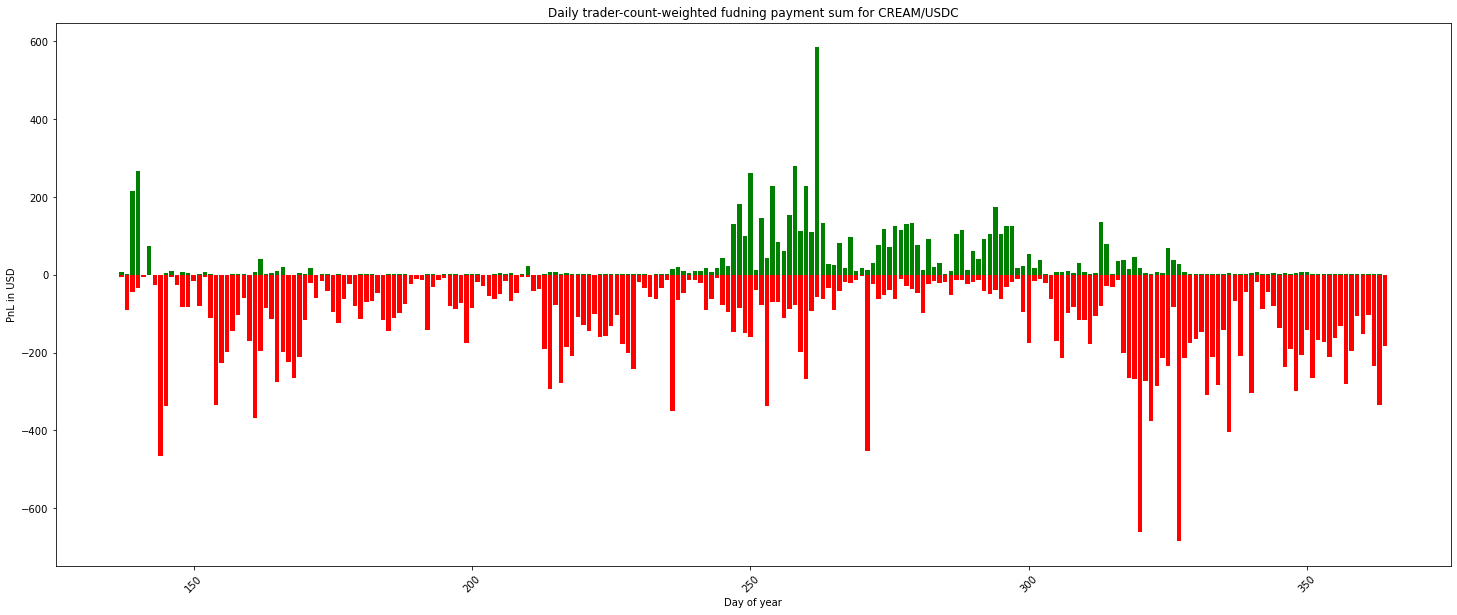

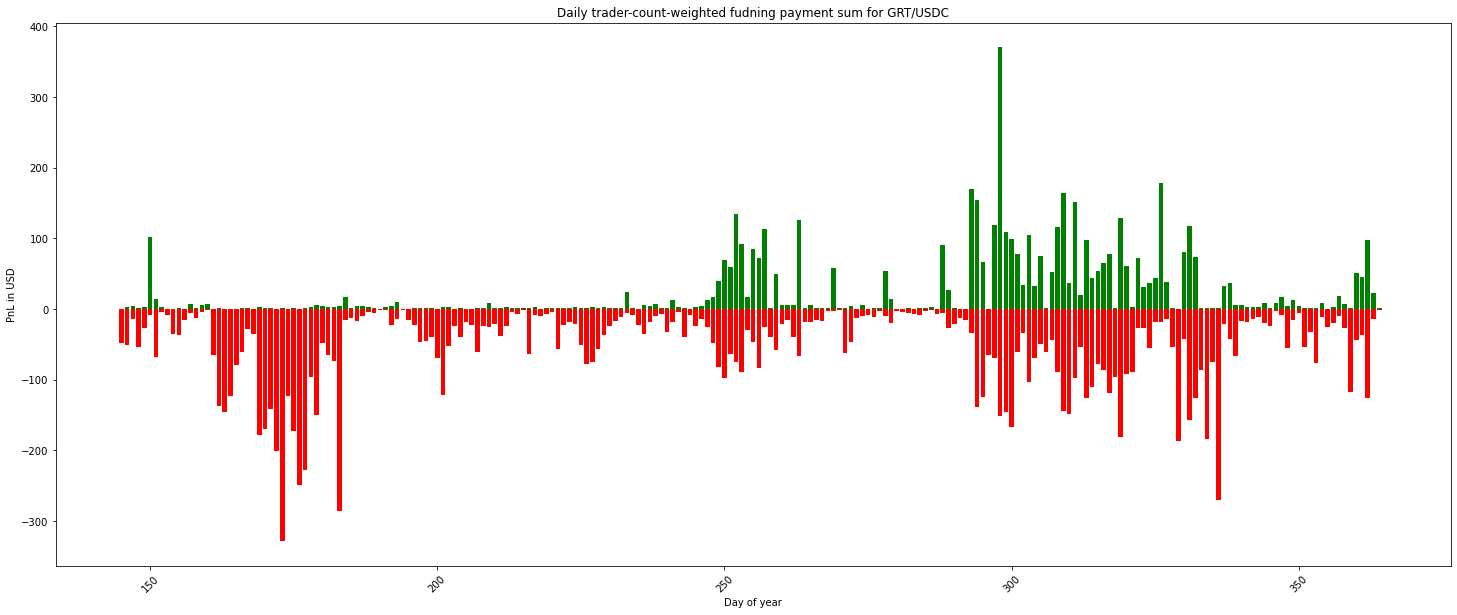

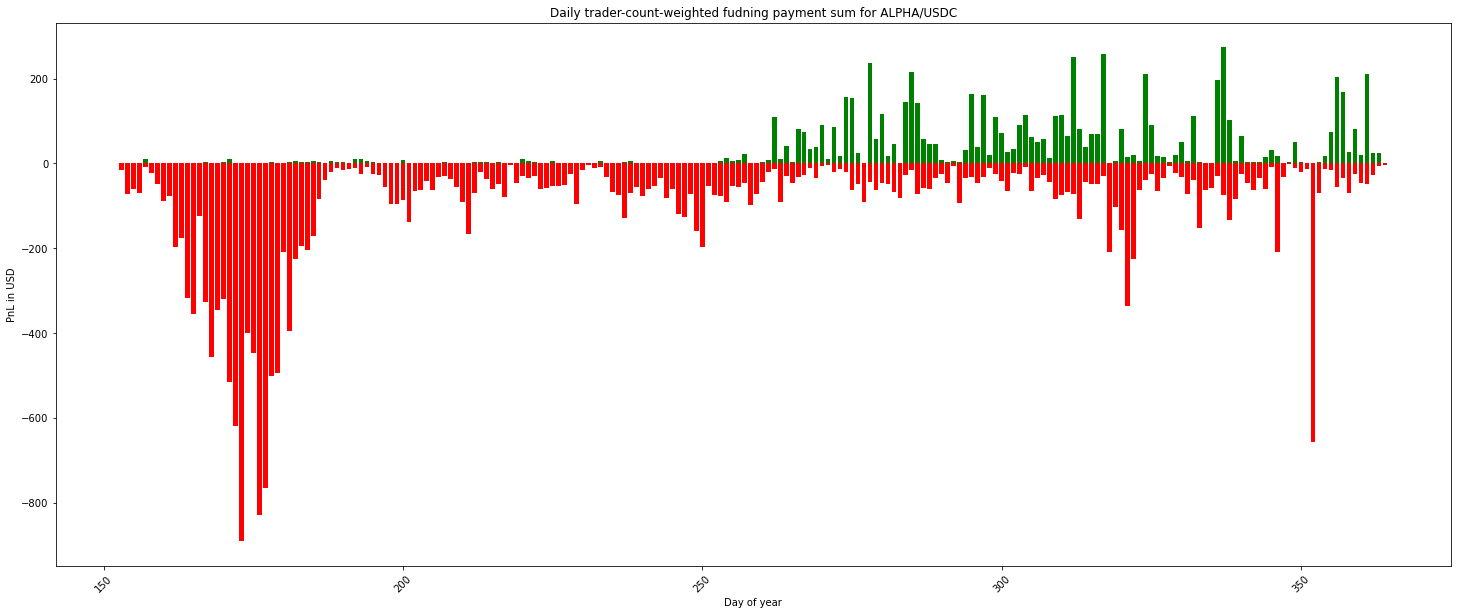

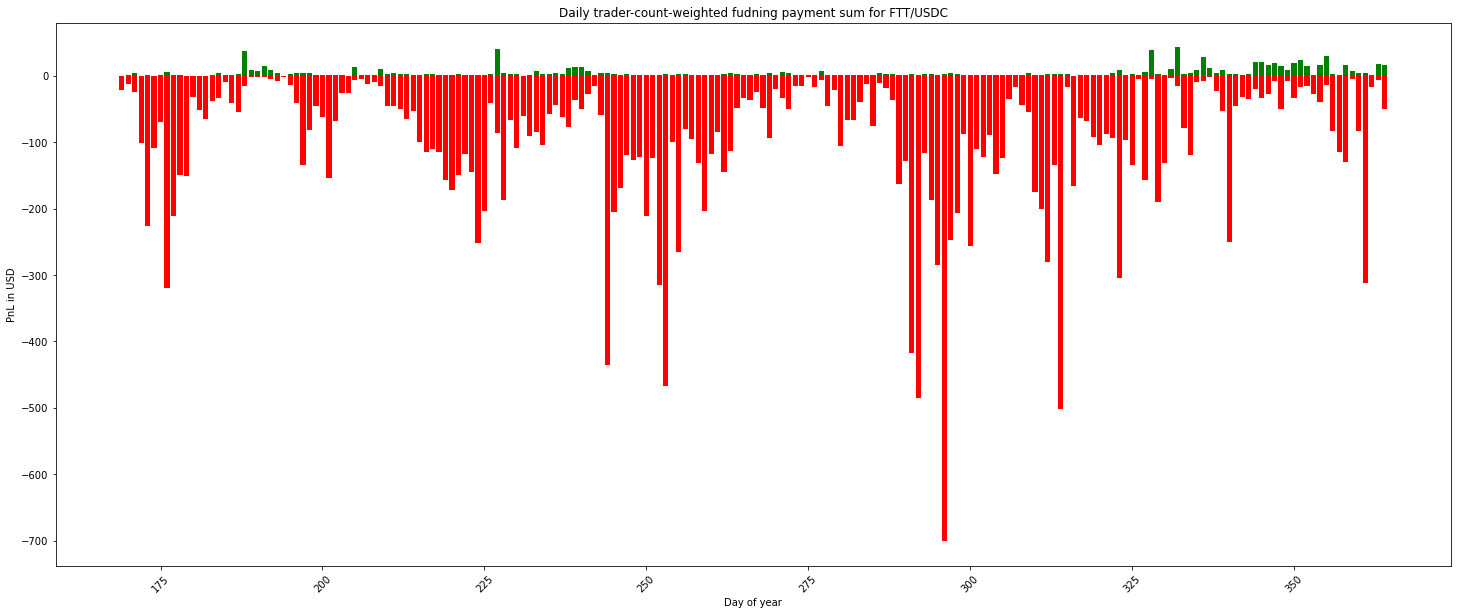

In [9]:
for amm in time_position_changes_2021_df["amm_name"].unique():
    changes_2021_for_amm_df = time_position_changes_2021_df[time_position_changes_2021_df["amm_name"] == amm]
    changes_per_day_and_trader_df = changes_2021_for_amm_df.groupby(["day_of_year", "trader"]).sum()
    
    positive_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["funding_payment"] >= 0]
    negative_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["funding_payment"] < 0]
    
    positive_changes_daily_count = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_count = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_sum = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_sum = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_count.set_index("day_of_year", inplace=True)
    negative_changes_daily_count.set_index("day_of_year", inplace=True)
    
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['funding_payment'] / positive_changes_daily_count["counts"], color='g')
    ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['funding_payment'] / negative_changes_daily_count["counts"], color='r')
    
    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily trader-count-weighted fudning payment sum for " + amm)
    ax2.legend()
    plt.xticks(rotation=45)
    plt.show()

positive trader flow for BTC/USDC is equal to 11853396.031803772
negative trader flow for BTC/USDC is equal to -5686375.7326201
balance for pool is equal to 17539771.76442387
mean amount of daily profiters for pool is 30.10164835164835
mean amount of daily lossers for pool is 18.214285714285715


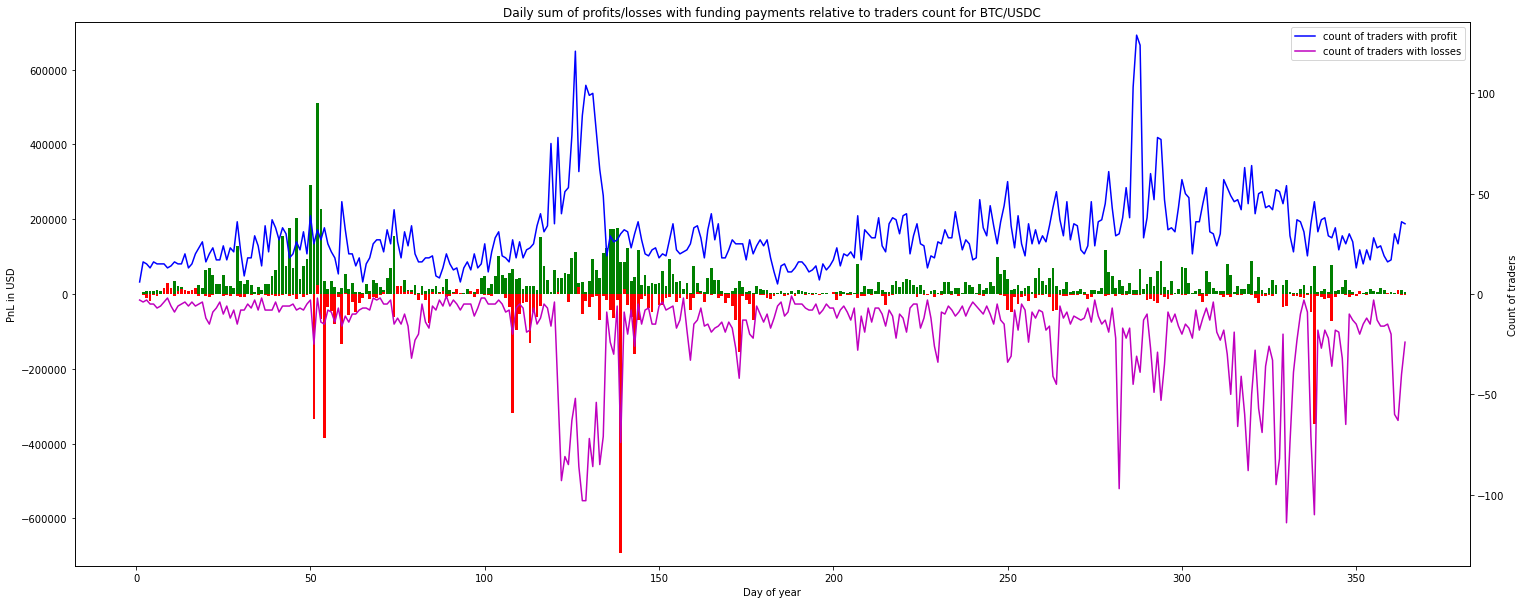

positive trader flow for ETH/USDC is equal to 42985979.84840022
negative trader flow for ETH/USDC is equal to -11093404.038352627
balance for pool is equal to 54079383.886752844
mean amount of daily profiters for pool is 42.206043956043956
mean amount of daily lossers for pool is 16.153846153846153


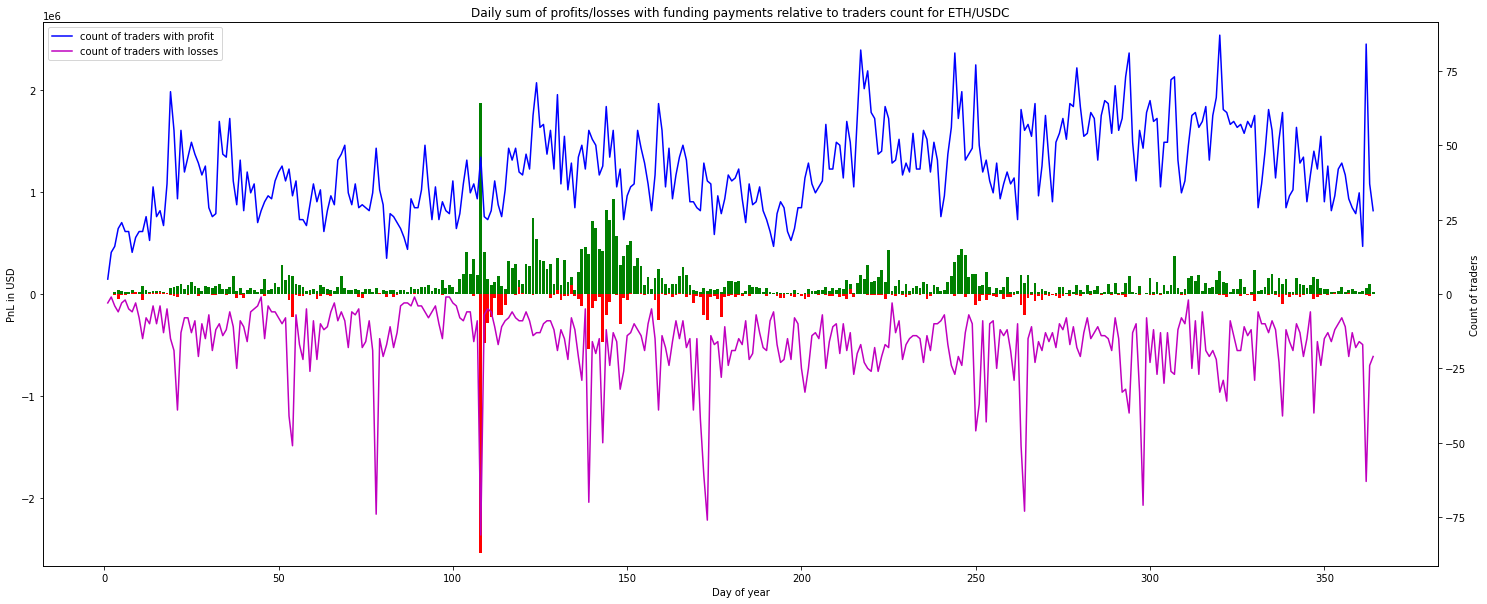

positive trader flow for YFI/USDC is equal to 5887380.478687036
negative trader flow for YFI/USDC is equal to -5003249.173293934
balance for pool is equal to 10890629.65198097
mean amount of daily profiters for pool is 15.285714285714286
mean amount of daily lossers for pool is 7.011049723756906


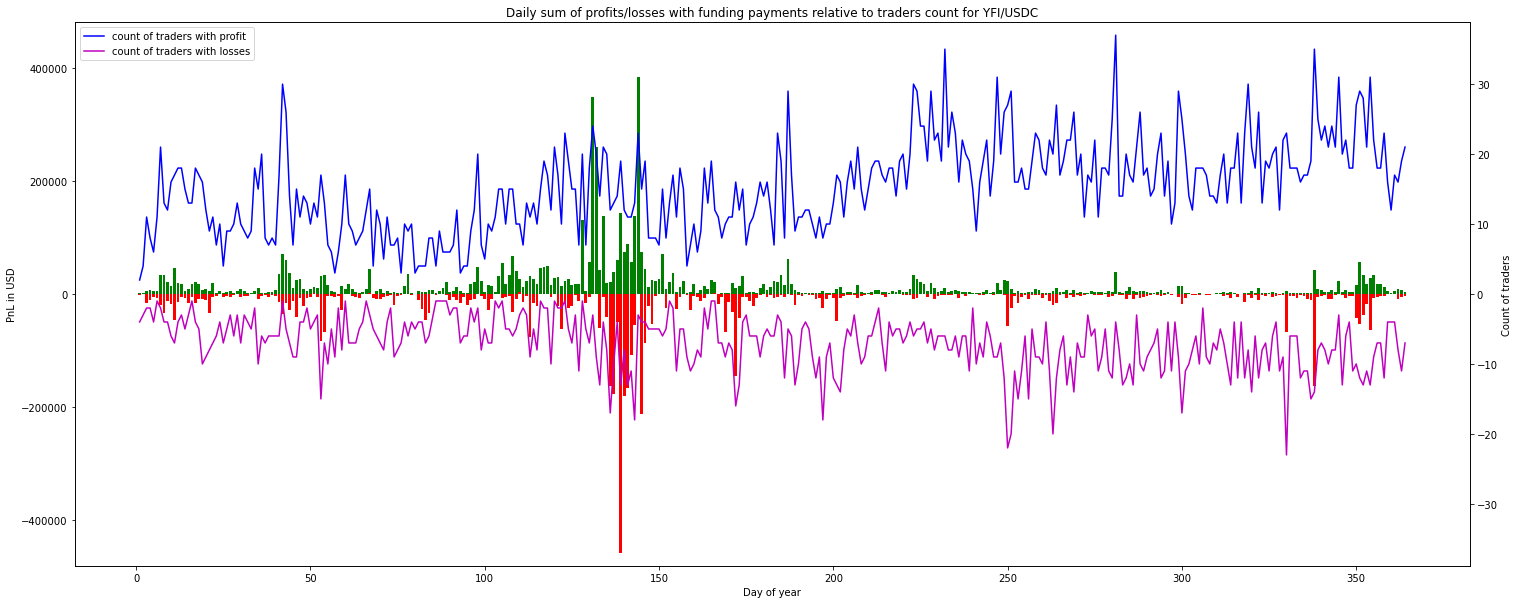

positive trader flow for DOT/USDC is equal to 6519984.168572281
negative trader flow for DOT/USDC is equal to -4927208.526329841
balance for pool is equal to 11447192.694902122
mean amount of daily profiters for pool is 21.29394812680115
mean amount of daily lossers for pool is 8.747826086956522


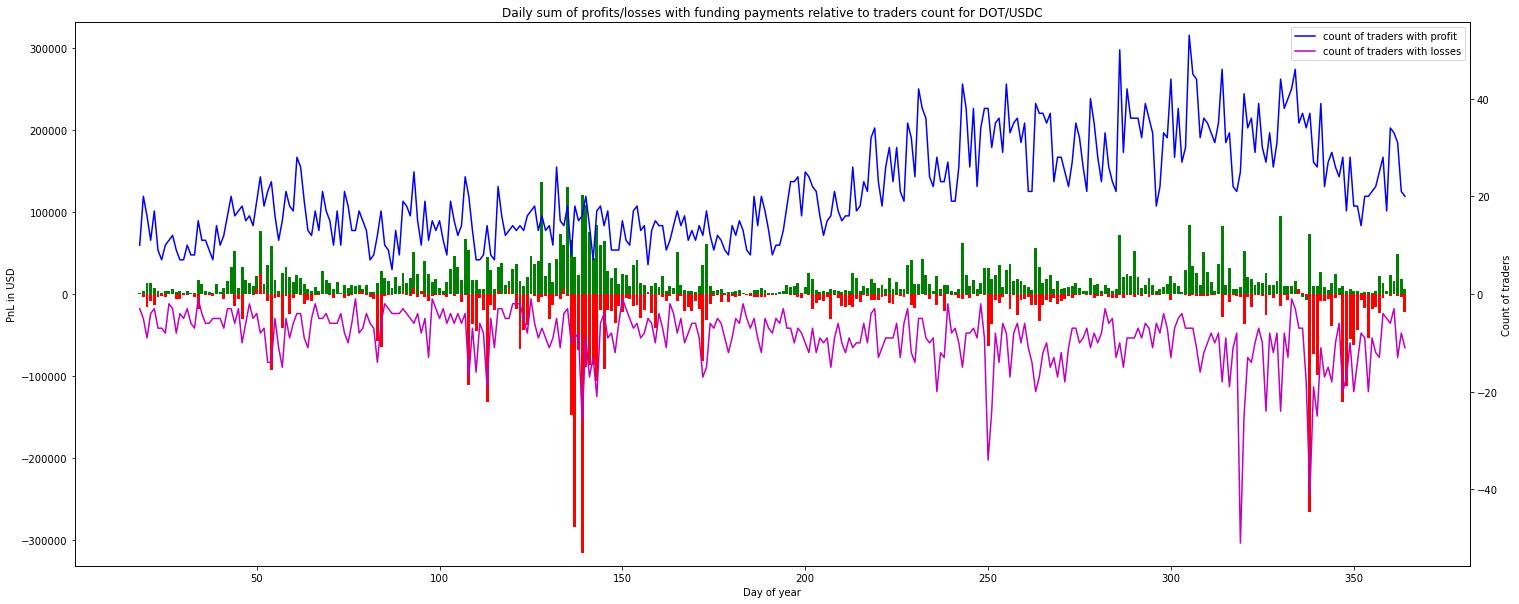

positive trader flow for SNX/USDC is equal to 3563755.45018308
negative trader flow for SNX/USDC is equal to -2743207.20587877
balance for pool is equal to 6306962.6560618505
mean amount of daily profiters for pool is 18.59467455621302
mean amount of daily lossers for pool is 8.606508875739644


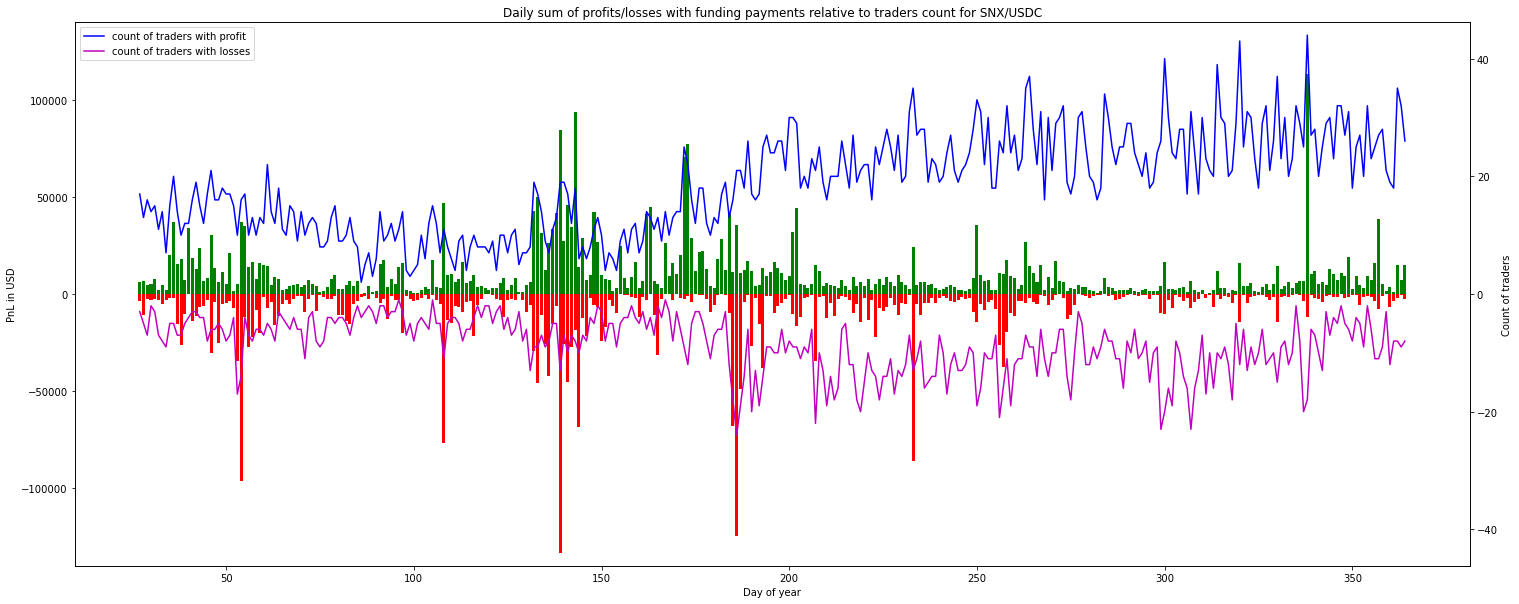

positive trader flow for LINK/USDC is equal to 4825154.629701896
negative trader flow for LINK/USDC is equal to -4338499.130314612
balance for pool is equal to 9163653.760016508
mean amount of daily profiters for pool is 18.255384615384614
mean amount of daily lossers for pool is 9.819875776397515


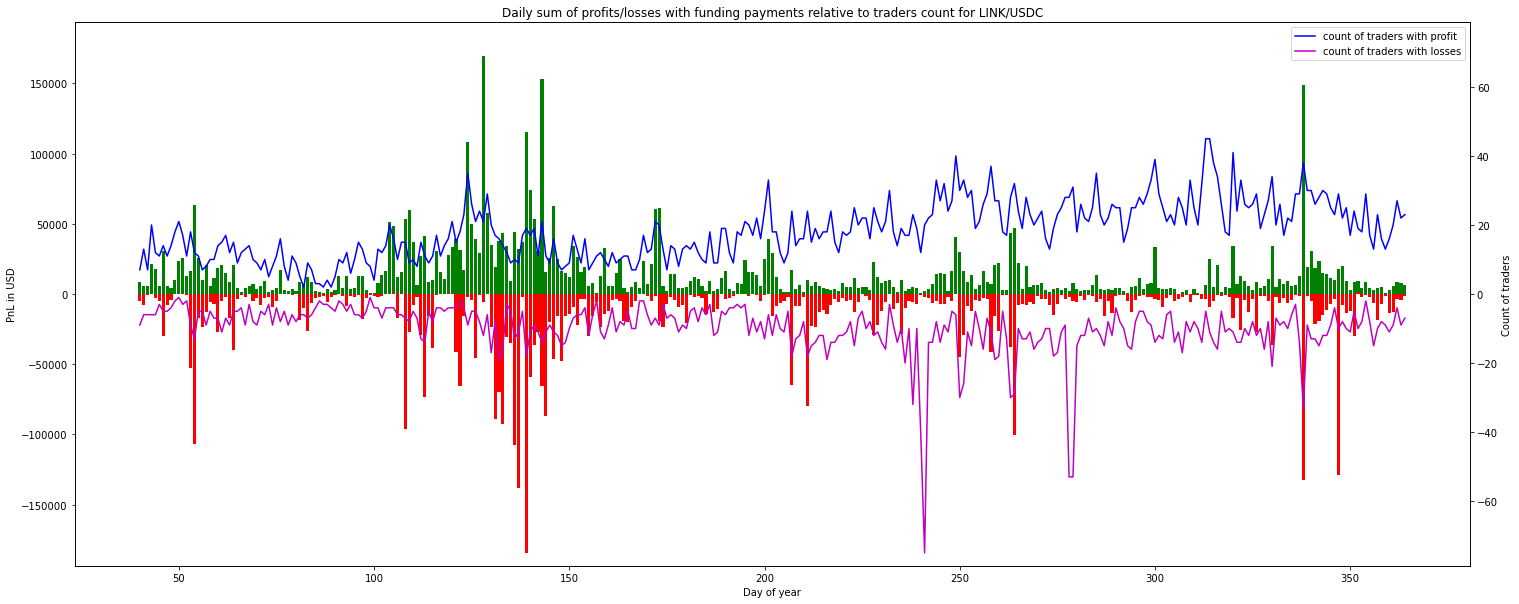

positive trader flow for AAVE/USDC is equal to 4963226.817828232
negative trader flow for AAVE/USDC is equal to -4730458.250011767
balance for pool is equal to 9693685.067839999
mean amount of daily profiters for pool is 19.063492063492063
mean amount of daily lossers for pool is 9.30891719745223


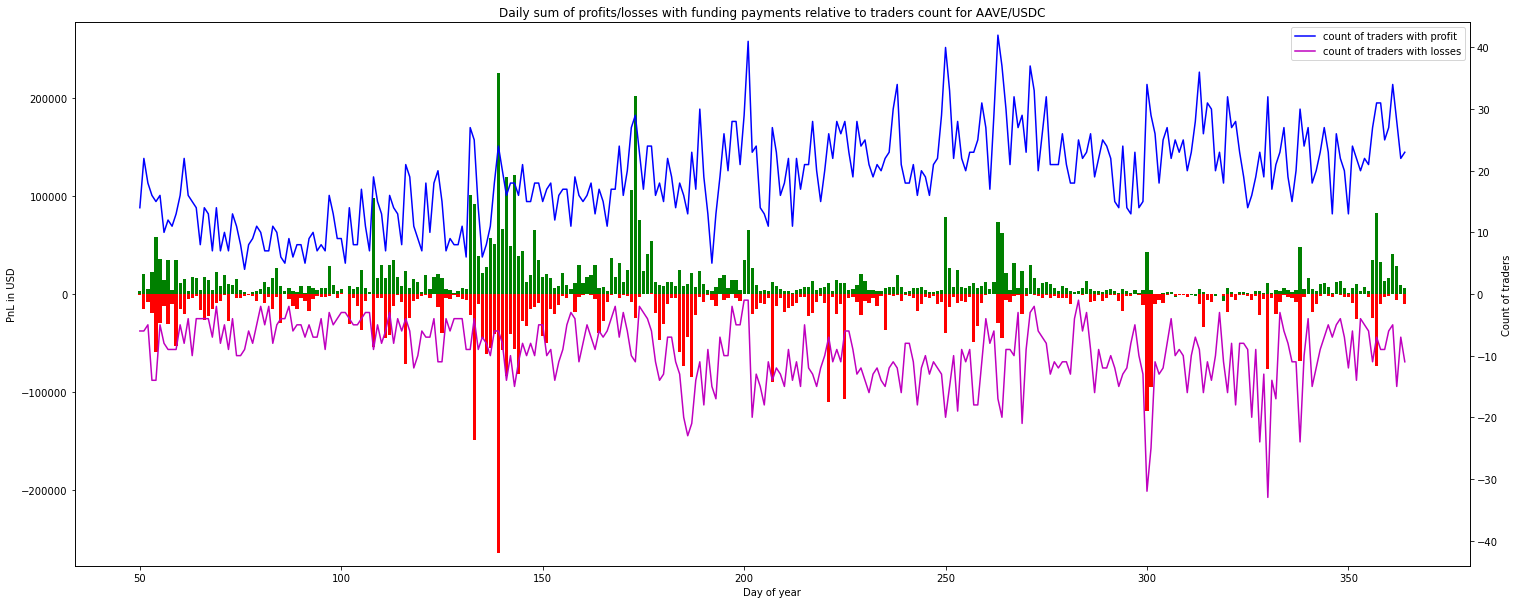

positive trader flow for SUSHI/USDC is equal to 5632486.020722777
negative trader flow for SUSHI/USDC is equal to -4501074.004953291
balance for pool is equal to 10133560.025676068
mean amount of daily profiters for pool is 22.60927152317881
mean amount of daily lossers for pool is 10.751655629139073


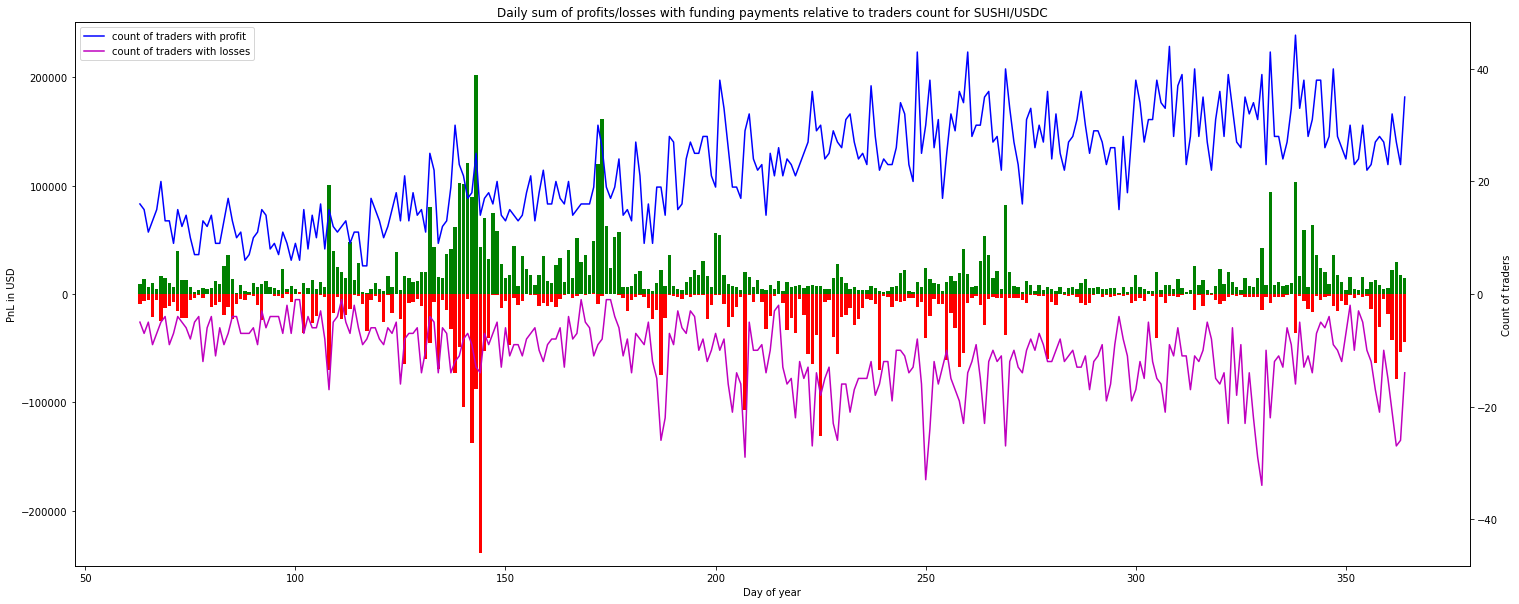

positive trader flow for COMP/USDC is equal to 4274330.437274593
negative trader flow for COMP/USDC is equal to -3459137.418718409
balance for pool is equal to 7733467.855993002
mean amount of daily profiters for pool is 18.00677966101695
mean amount of daily lossers for pool is 8.617747440273037


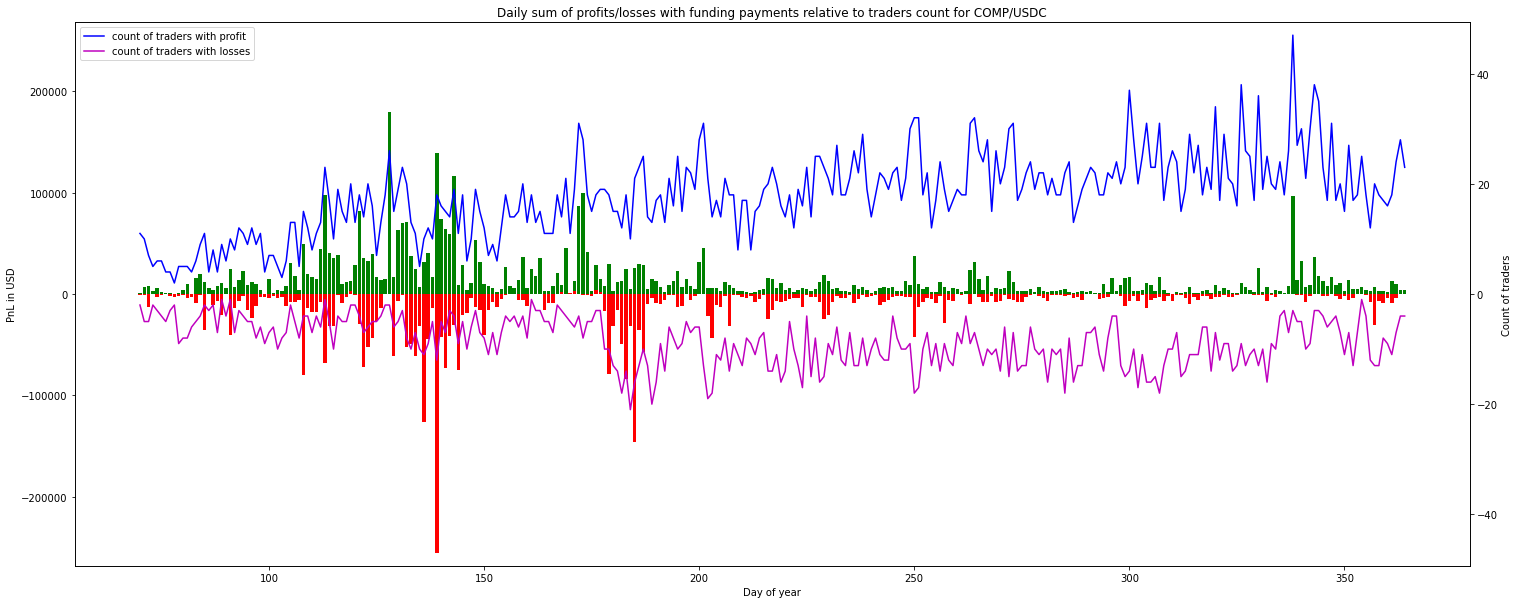

positive trader flow for REN/USDC is equal to 4876015.983695855
negative trader flow for REN/USDC is equal to -4189855.2343342276
balance for pool is equal to 9065871.218030084
mean amount of daily profiters for pool is 19.422145328719722
mean amount of daily lossers for pool is 9.590909090909092


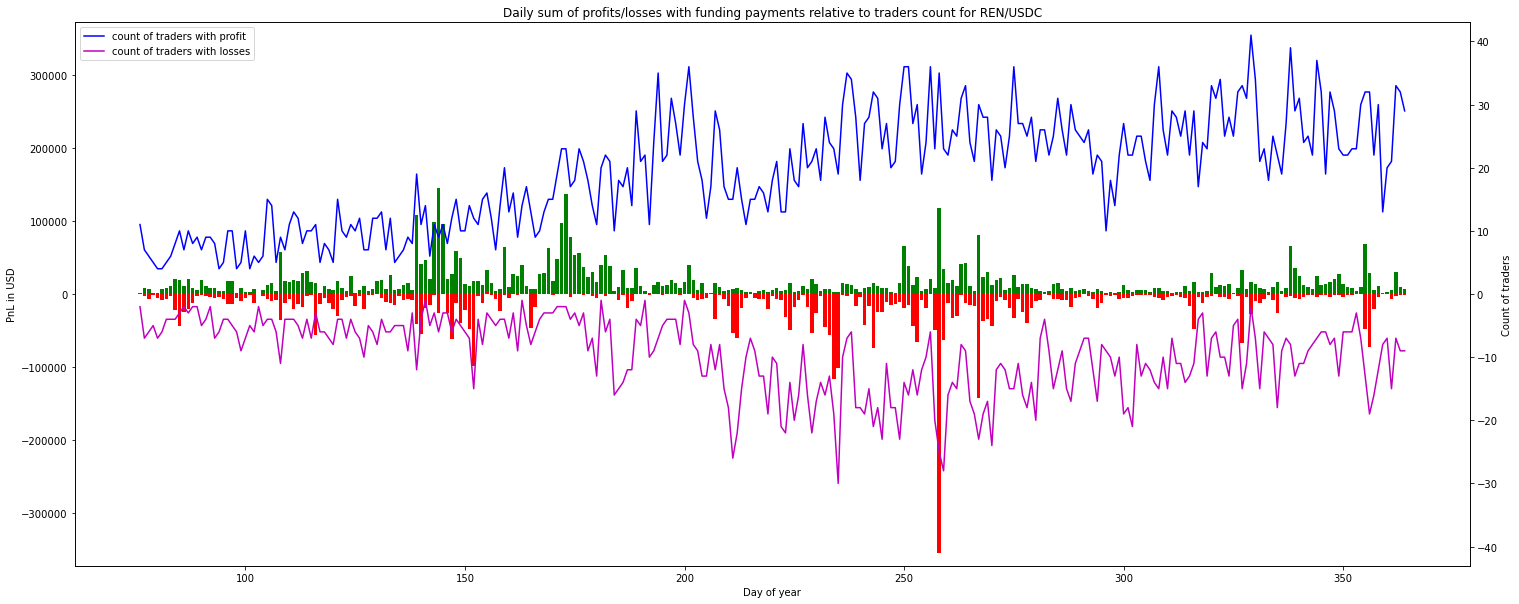

positive trader flow for PERP/USDC is equal to 8290272.966844428
negative trader flow for PERP/USDC is equal to -6687365.575682005
balance for pool is equal to 14977638.542526433
mean amount of daily profiters for pool is 31.186131386861312
mean amount of daily lossers for pool is 15.098540145985401


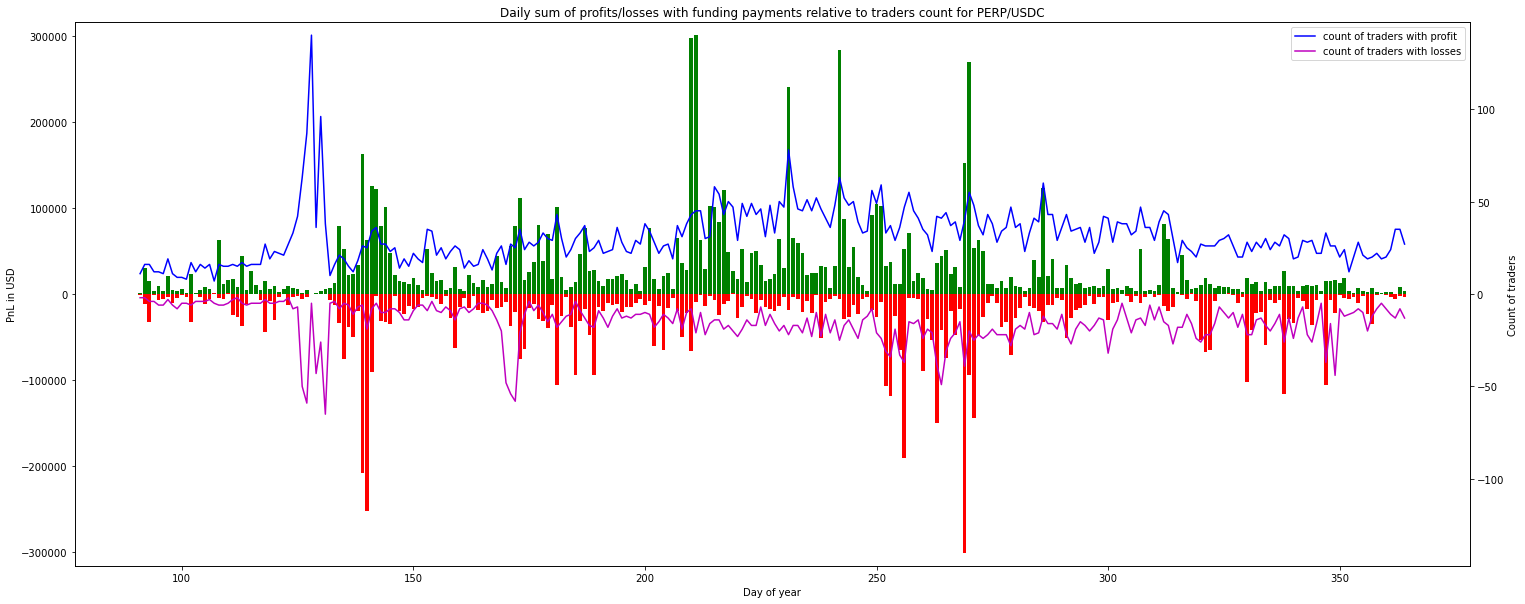

positive trader flow for UNI/USDC is equal to 3556251.593789803
negative trader flow for UNI/USDC is equal to -2913226.247717858
balance for pool is equal to 6469477.84150766
mean amount of daily profiters for pool is 18.262172284644194
mean amount of daily lossers for pool is 8.850187265917603


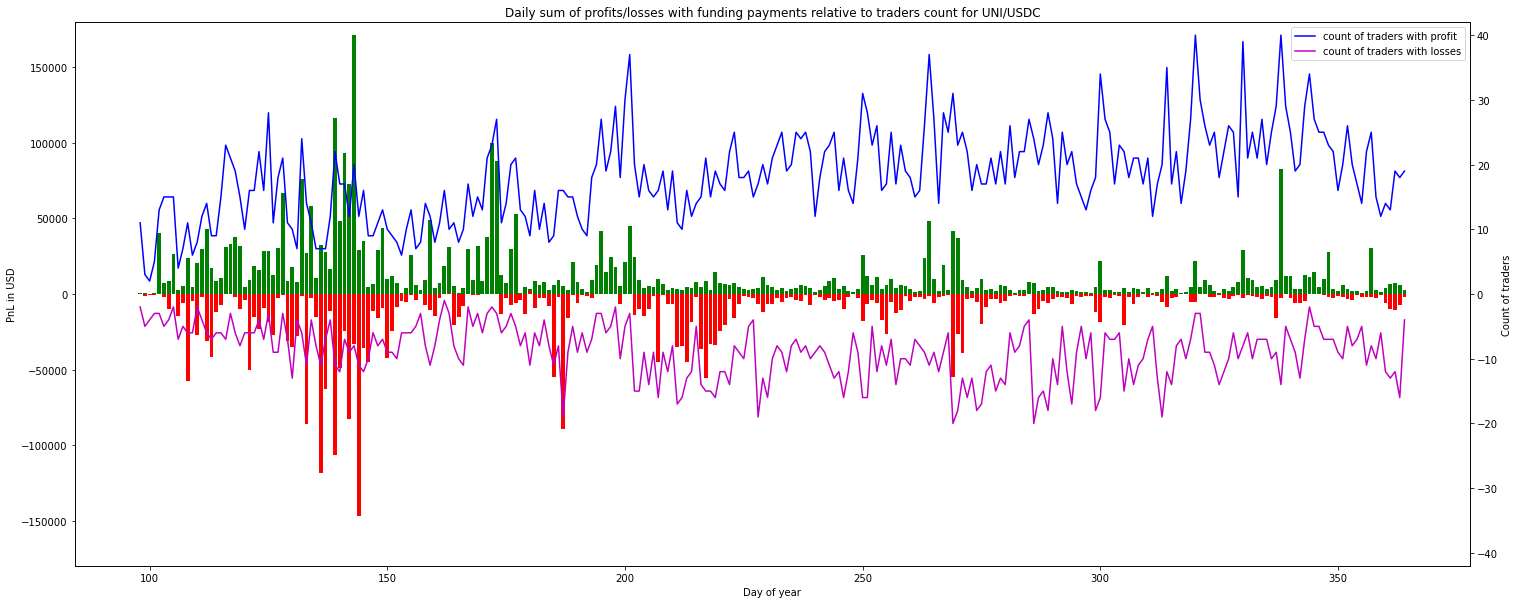

positive trader flow for CRV/USDC is equal to 6836825.182893433
negative trader flow for CRV/USDC is equal to -6125116.122051372
balance for pool is equal to 12961941.304944806
mean amount of daily profiters for pool is 22.927756653992397
mean amount of daily lossers for pool is 11.12167300380228


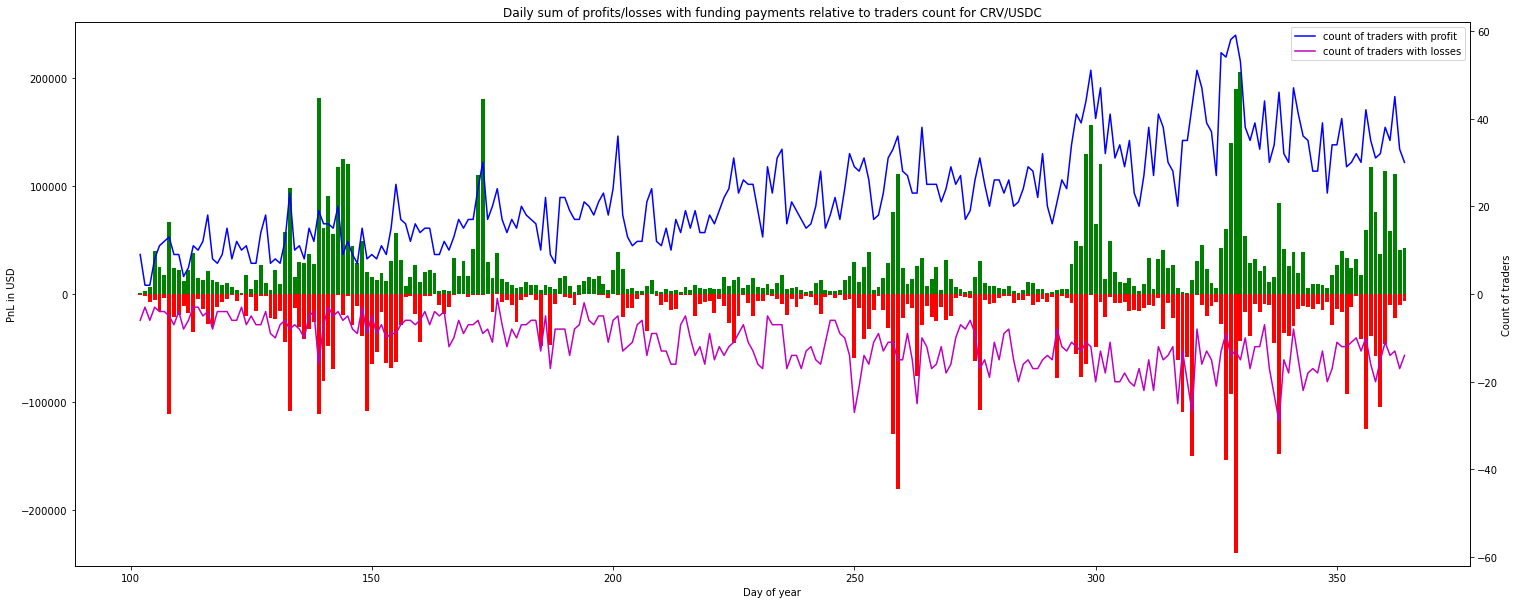

positive trader flow for MKR/USDC is equal to 2824580.918771282
negative trader flow for MKR/USDC is equal to -2046942.8763624488
balance for pool is equal to 4871523.79513373
mean amount of daily profiters for pool is 19.744588744588743
mean amount of daily lossers for pool is 8.311688311688311


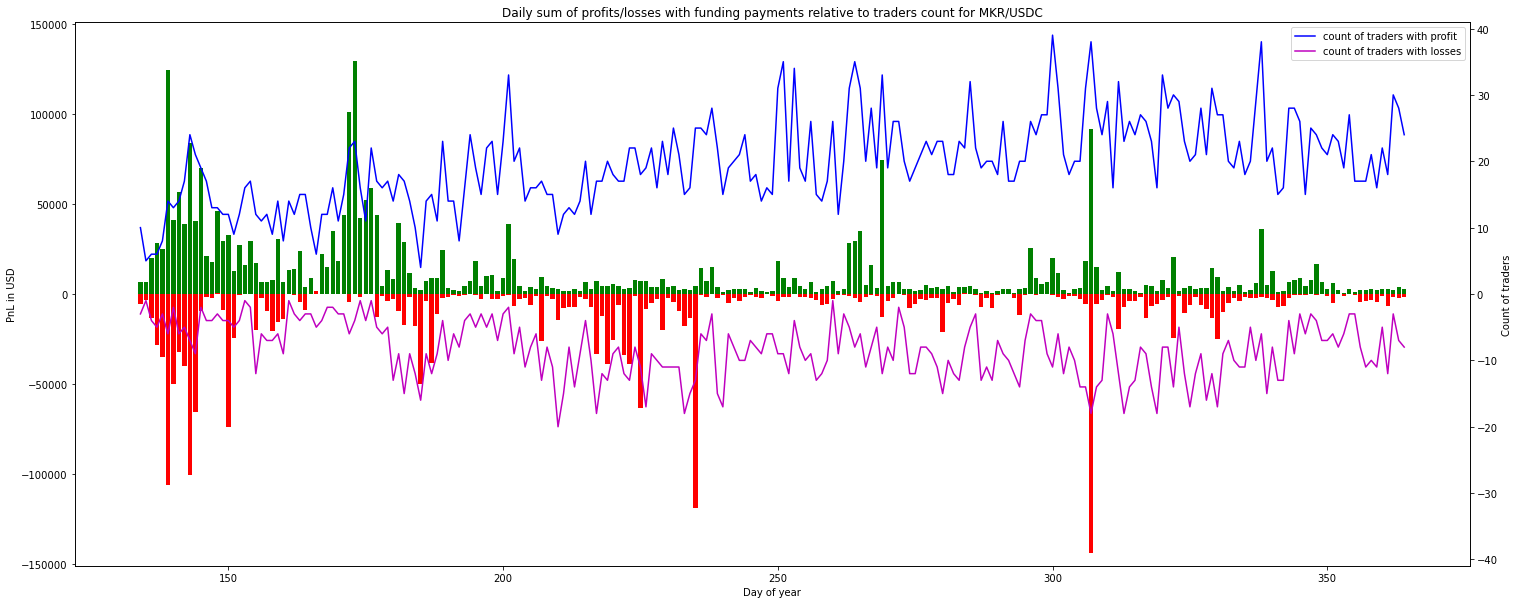

positive trader flow for CREAM/USDC is equal to 4062275.4076991463
negative trader flow for CREAM/USDC is equal to -2271424.897737205
balance for pool is equal to 6333700.305436351
mean amount of daily profiters for pool is 20.74561403508772
mean amount of daily lossers for pool is 9.302631578947368


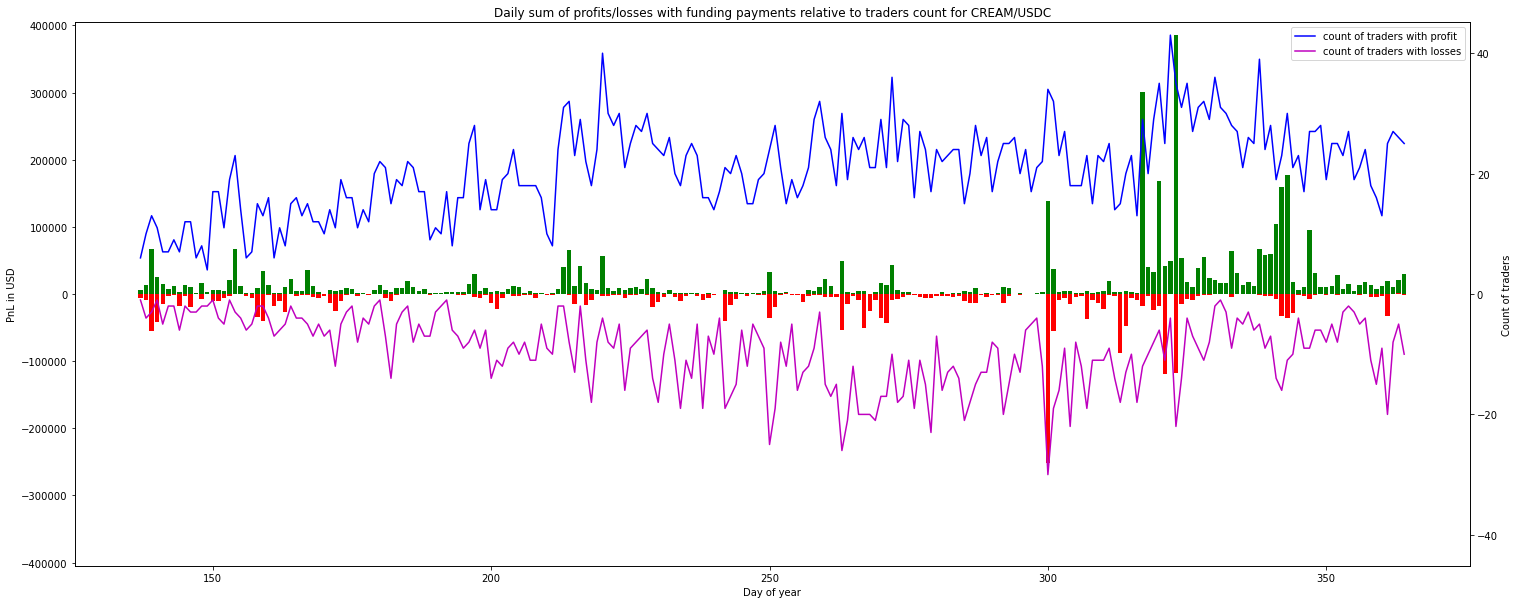

positive trader flow for GRT/USDC is equal to 2923228.671633236
negative trader flow for GRT/USDC is equal to -2887635.759449428
balance for pool is equal to 5810864.431082664
mean amount of daily profiters for pool is 22.29864253393665
mean amount of daily lossers for pool is 11.195454545454545


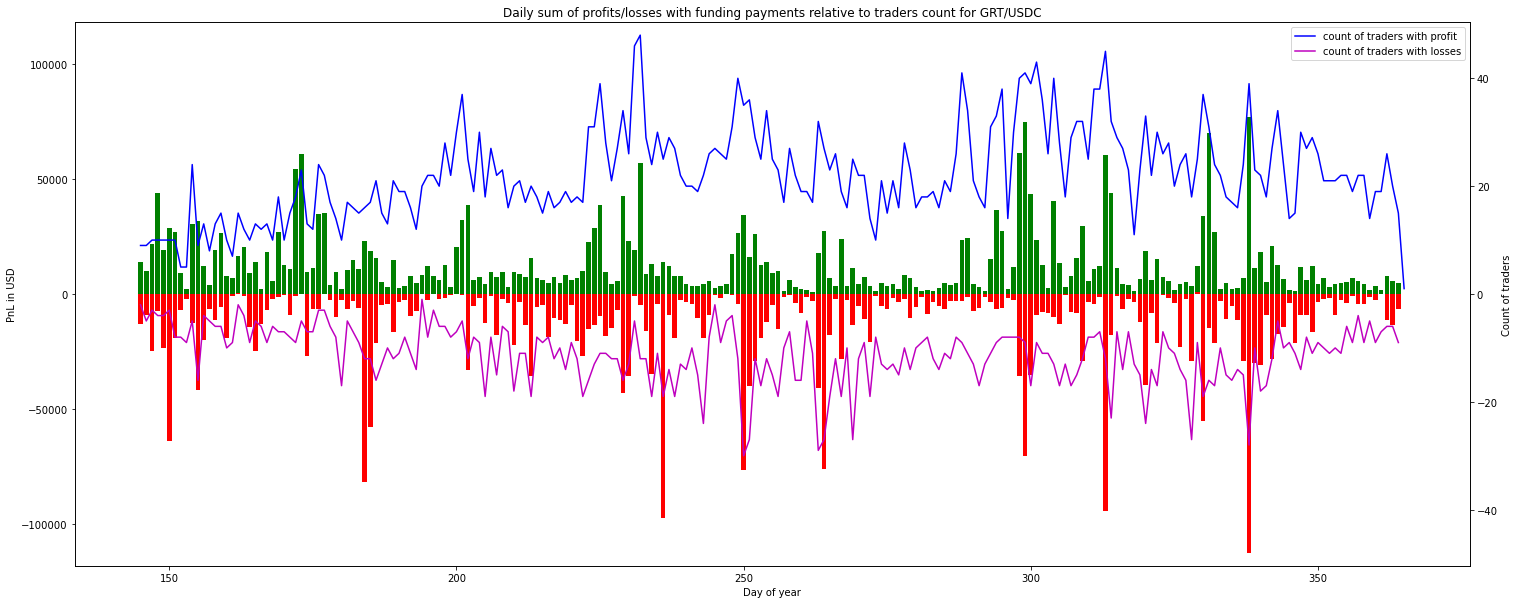

positive trader flow for ALPHA/USDC is equal to 3290773.8004341405
negative trader flow for ALPHA/USDC is equal to -3207856.2957931478
balance for pool is equal to 6498630.096227288
mean amount of daily profiters for pool is 23.75943396226415
mean amount of daily lossers for pool is 11.966981132075471


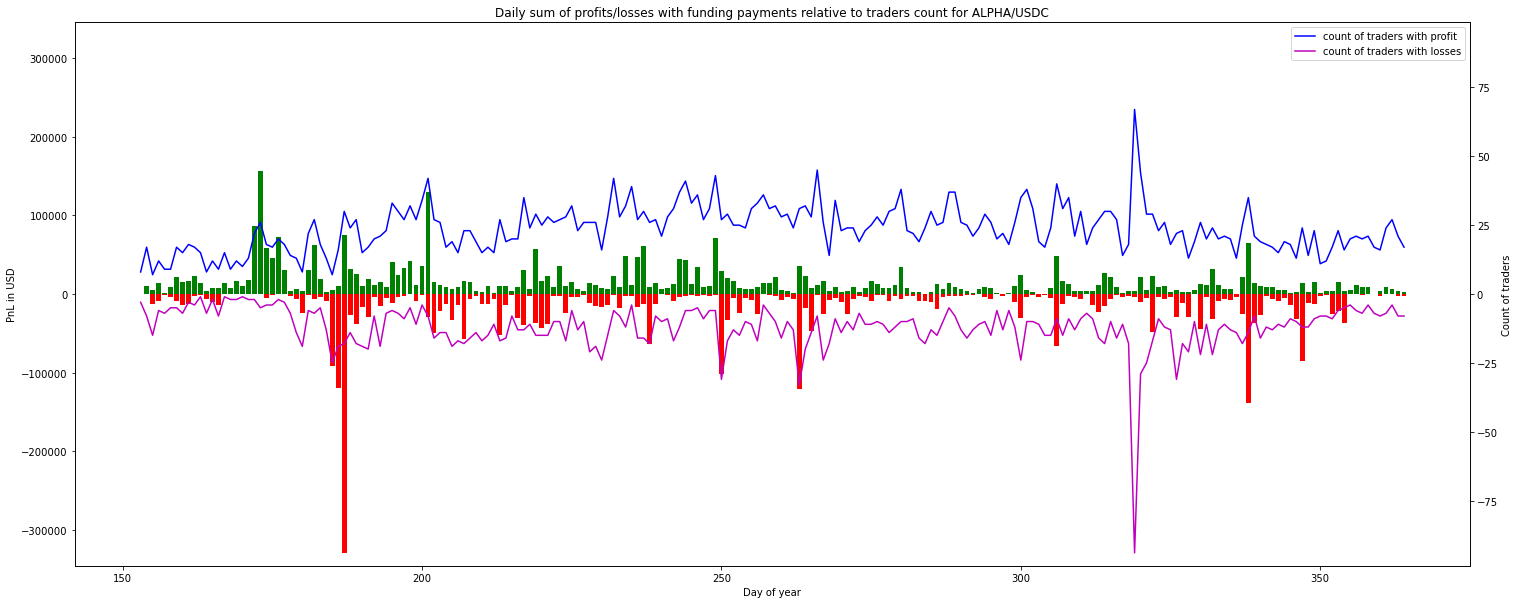

positive trader flow for FTT/USDC is equal to 3244873.099558143
negative trader flow for FTT/USDC is equal to -2380425.493359316
balance for pool is equal to 5625298.592917459
mean amount of daily profiters for pool is 23.387755102040817
mean amount of daily lossers for pool is 11.505102040816327


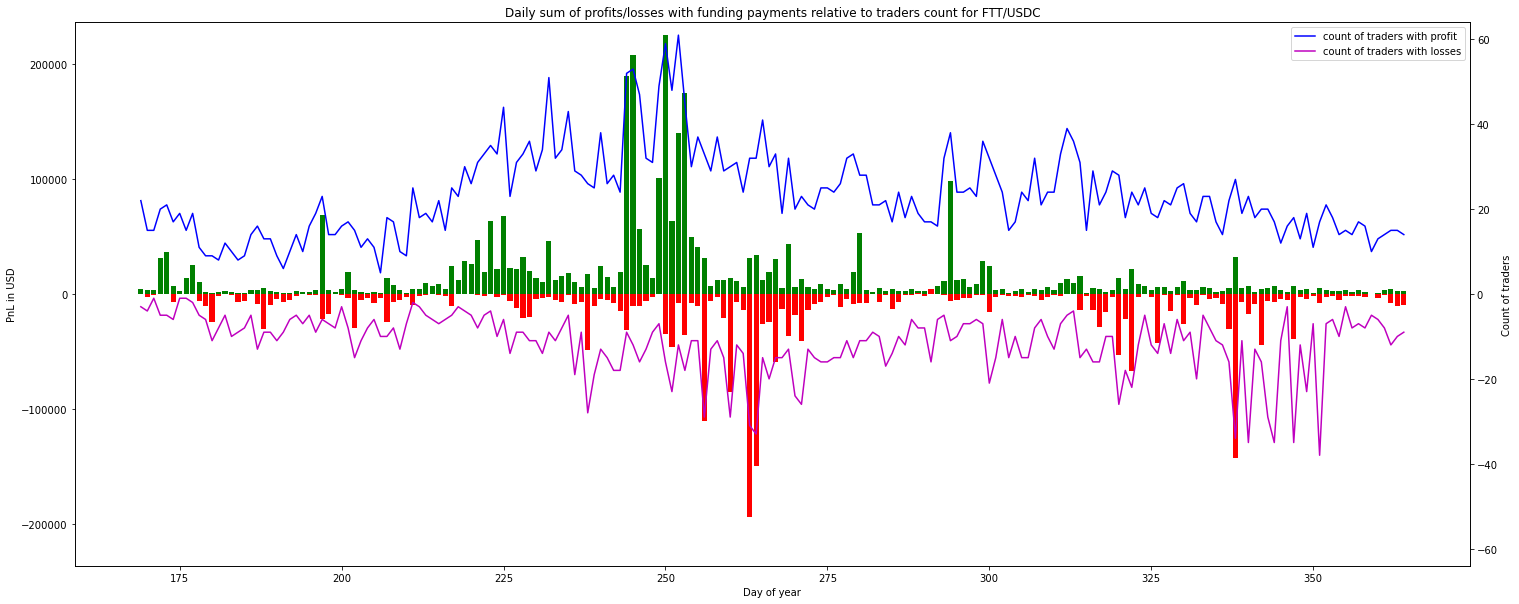

In [10]:
for amm in time_position_changes_2021_df["amm_name"].unique():
    changes_2021_for_amm_df = time_position_changes_2021_df[time_position_changes_2021_df["amm_name"] == amm]
    changes_per_day_and_trader_df = changes_2021_for_amm_df.groupby(["day_of_year", "trader"]).sum()
    
    positive_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["realized_pnl"] >= 0]
    negative_changes_per_day_and_trader_df = changes_per_day_and_trader_df[
        changes_per_day_and_trader_df["realized_pnl"] < 0]
    
    positive_changes_daily_count = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_count = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]
                                                                                  ).size().reset_index(name="counts"
                                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_sum = positive_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    negative_changes_daily_sum = negative_changes_per_day_and_trader_df.groupby(["day_of_year"]).sum(
                                                                    ).sort_values(by=["day_of_year"])
    
    positive_changes_daily_sum["pnl_with_funding_payments"] = (positive_changes_daily_sum["realized_pnl"] -
                                                               positive_changes_daily_sum["funding_payment"]) 
    negative_changes_daily_sum["pnl_with_funding_payments"] = (negative_changes_daily_sum["realized_pnl"] -
                                                               negative_changes_daily_sum["funding_payment"]) 
    
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.bar(positive_changes_daily_sum.index, positive_changes_daily_sum['pnl_with_funding_payments'], color='g')
    ax.bar(negative_changes_daily_sum.index, negative_changes_daily_sum['pnl_with_funding_payments'], color='r')
    
    ax2 = ax.twinx()
    ax2.plot(positive_changes_daily_count.day_of_year, positive_changes_daily_count["counts"], color='b', 
             label='count of traders with profit')
    ax2.plot(negative_changes_daily_count.day_of_year, -negative_changes_daily_count["counts"], color='m', 
             label='count of traders with losses')
    
    max_pnl = abs(positive_changes_daily_sum["pnl_with_funding_payments"].max())
    min_pnl = abs(negative_changes_daily_sum["pnl_with_funding_payments"].min())
    max_profiters = positive_changes_daily_count["counts"].max()
    max_lossers = negative_changes_daily_count["counts"].max()
    
    pnl_limit = max_pnl if max_pnl > min_pnl else min_pnl
    count_limit = max_profiters if max_profiters > max_lossers else max_lossers
    
    ax.set_xlabel("Day of year")
    ax.set_ylabel("PnL in USD")
    ax.set_ylim(-pnl_limit * 1.05, pnl_limit * 1.05)
    ax2.set_ylabel("Count of traders")
    ax2.set_ylim(-count_limit * 1.05, count_limit * 1.05)
    ax.set_title("Daily sum of profits/losses with funding payments relative to traders count for " + amm)
    ax2.legend()
    plt.xticks(rotation=45)
    
    print("positive trader flow for " + amm + " is equal to " + str(positive_changes_daily_sum["pnl_with_funding_payments"].sum()))
    print("negative trader flow for " + amm + " is equal to " + str(negative_changes_daily_sum["pnl_with_funding_payments"].sum()))
    print("balance for pool is equal to " + str(positive_changes_daily_sum["pnl_with_funding_payments"].sum() - 
                                                negative_changes_daily_sum["pnl_with_funding_payments"].sum()))
    print("mean amount of daily profiters for pool is " + str(positive_changes_daily_count["counts"].mean()) + 
          "\nmean amount of daily lossers for pool is " + str(negative_changes_daily_count["counts"].mean()))
    
    plt.show()